# Case Study: Unterstanding Mental Health in Technology-Related Companies (Script 1)

The aim of this case study was to use the OSMI Mental Health in Tech Survey (Open Sourcing Mental Illness, 2016) to draw conclusions about how the mental health problems of employees in the technology sector could be mitigated. This was done by first reducing the high dimensionality of the dataset and then classifying individuals into different groups based on their characteristics. According to the attitudes of individuals within a group on various mental health issues in the work context, group-specific measures can then be considered to reduce mental health problems of employees in the technology sector in the long term. To do this, however, it was first necessary to clean up the dataset and expand it to include other characteristics that may be of interest. Then, dimensionality reduction techniques were implemented before a cluster analysis was applied that classifies individuals into the different groups. This script is the first of three scripts to perform the described analyses.

## Data Preprocessing and Feature Engineering

Overview
* conduct initial analyses to understand the data
* observe response distributions and perform data cleaning 
* create data dictionaries to learn more about the variables
* identify inconsistent data records and code them accordingly

## 1  Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import functions_mhd as f 
import seaborn as sns
from scipy import stats

%matplotlib inline

## 2  Python Version

In [2]:
from platform import python_version
python_version()

'3.9.13'

## 3  Initial Data Exploration and General Data Preprocessing

Overview
* rename variables
* get a first feel for the data by exploring unique values and visualizing value counts
* reduce the dataset to the target sample
* clean variables where it was possible to select multiple options or enter text
* investigate the data type of variables
* explore missing values, n/a responses and dk responses 

In [3]:
# load the data
dataset = pd.read_csv("mental-heath-in-tech-2016_20161114.csv")

In [4]:
# set the pandas options to show all columns and all rows of data frames
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

In [5]:
# take a first look at the data
display(dataset.head(10)) 

Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   
5                       0   
6                       0   
7                       0   
8                       0   
9                       1   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           
5                                     More than 1000           
6                                             26-100           
7                                     More than 1000           
8                                             26-100           
9                                                NaN           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         
5                                                1.0         
6                                                1.0         
7                                                1.0         
8                                                0.0         
9                                                NaN         

   Is your primary role within your company related to tech/IT?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                1.0              
5                                                NaN              
6                                                NaN              
7                                                NaN              
8                                                1.0              
9                                                NaN              

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  
3                                                NaN                                  
4                                                Yes                                  
5                                                Yes                                  
6                                       I don't know                                  
7                                                Yes                                  
8                                       I don't know                                  
9                                                NaN                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                NaN                                                
1                                                Yes                                                
2                                                NaN                                                
3                                                NaN                                                
4                                                Yes                                          

In [6]:
# get information for the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

Observations
* many columns have have the same number of non-null values (e.g., there are 13 columns with 1146 non-null values)
* most columns have an object-dtype

In [7]:
# provide the columns with shorter and more descriptive names
questions = dataset.columns.tolist()

# exchange un-breaking spaces (\xa0) by normal spaces
questions = [col.replace(u'\xa0', u' ') for col in questions]
dataset.columns = questions

dict_questions = {'Are you self-employed?':'self_employed', 
                  'How many employees does your company or organization have?':'N_employees',
                  'Is your employer primarily a tech company/organization?':'tech_employer',
                  'Is your primary role within your company related to tech/IT?':'tech_role',
                  'Does your employer provide mental health benefits as part of healthcare coverage?':'employer_mh_benefits',
                  'Do you know the options for mental health care available under your employer-provided coverage?':'employer_mh_options_known',
                  'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':'employer_mh_formally_discussed',
                  'Does your employer offer resources to learn more about mental health concerns and options for seeking help?':'employer_mh_ressources_offered',
                  'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?':'employer_anonymity_mh_benefits',
                  'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:':'difficulty_asking_for_leave',
                  'Do you think that discussing a mental health disorder with your employer would have negative consequences?':'employer_neg_conseq_mh_disclosure_expected',
                  'Do you think that discussing a physical health issue with your employer would have negative consequences?':'employer_neg_conseq_physical_disclosure_expected',
                  'Would you feel comfortable discussing a mental health disorder with your coworkers?':'mh_disclosure_coworker_comfortable',
                  'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?':'mh_disclosure_supervisor_comfortable',
                  'Do you feel that your employer takes mental health as seriously as physical health?':'seriousness_mh_physical_employer',
                  'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?':'neg_conseq_coworker_mh_disclosure_employer',
                  'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?':'mh_treatment_coverage',
                  'Do you know local or online resources to seek help for a mental health disorder?':'local_resources_mh_known',
                  'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?':'mh_disclosure_clients',
                  'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?':'mh_disclosure_clients_neg_impact',
                  'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?':'mh_disclosure_coworker',
                  'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?':'mh_disclosure_coworker_neg_impact',
                  'Do you believe your productivity is ever affected by a mental health issue?':'mh_effect_on_productivity',
                  'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?':'mh_effect_on_productivity_percent',
                  'Do you have previous employers?':'prev_employers',
                  'Have your previous employers provided mental health benefits?':'prev_employers_mh_benefits',
                  'Were you aware of the options for mental health care provided by your previous employers?':'prev_employers_mh_options_known',
                  'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?':'prev_employers_mh_formally_discussed',
                  'Did your previous employers provide resources to learn more about mental health issues and how to seek help?':'prev_employers_mh_ressources_offered',
                  'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?':'prev_employer_anonymity_mh_benefits',
                  'Do you think that discussing a mental health disorder with previous employers would have negative consequences?':'prev_employers_neg_conseq_mh_disclosure_expected',
                  'Do you think that discussing a physical health issue with previous employers would have negative consequences?':'prev_employers_neg_conseq_physical_disclosure_expected',
                  'Would you have been willing to discuss a mental health issue with your previous co-workers?':'mh_disclosure_prev_coworkers_comfortable',
                  'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?':'mh_disclosure_prev_supervisor_comfortable',
                  'Did you feel that your previous employers took mental health as seriously as physical health?':'seriousness_mh_physical_prev_employers',
                  'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?':'neg_conseq_coworker_mh_disclosure_prev_employers',
                  'Would you be willing to bring up a physical health issue with a potential employer in an interview?':'willingness_physical_disclosure_interview',
                  'Why or why not?':'reason_willingness_physical_disclosure_interview',
                  'Would you bring up a mental health issue with a potential employer in an interview?':'willingness_mh_disclosure_interview',
                  'Why or why not?.1':'reason_willingness_mh_disclosure_interview',
                  'Do you feel that being identified as a person with a mental health issue would hurt your career?':'mh_disclosure_expected_neg_effect_career',
                  'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?':'mh_disclosure_expected_neg_view_coworkers',
                  'How willing would you be to share with friends and family that you have a mental illness?':'willingness_mh_disclosure_family',
                  'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?':'mh_neg_effect_workplace_observed',
                  'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?':'effect_neg_conseq_mh_disclosure',
                  'Do you have a family history of mental illness?':'family_history_mental_illness',
                  'Have you had a mental health disorder in the past?':'self_mental_illness_past',
                  'Do you currently have a mental health disorder?':'self_mental_illness_present',
                  'If yes, what condition(s) have you been diagnosed with?':'diagnosed_mental_illnesses',
                  'If maybe, what condition(s) do you believe you have?':'possible_mental_illness',
                  'Have you been diagnosed with a mental health condition by a medical professional?':'diagnosed_by_professional',
                  'If so, what condition(s) were you diagnosed with?':'diagnoses_by_professional',
                  'Have you ever sought treatment for a mental health issue from a mental health professional?':'mental_illness_treated',
                  'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?':'neg_effect_work_treated',
                  'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?':'neg_effect_work_not_treated',
                  'What is your age?':'age',
                  'What is your gender?':'gender',
                  'What country do you live in?':'country_live',
                  'What US state or territory do you live in?':'US_state_live',
                  'What country do you work in?':'country_work',
                  'What US state or territory do you work in?':'US_state_work',
                  'Which of the following best describes your work position?':'current_work_position',
                  'Do you work remotely?':'work_remotely'}

df_names = dataset.rename(columns=dict_questions).copy()

In [8]:
# provide a dictionary for questions and their new variable names
new_names = df_names.columns.tolist()
dict_questions_labels = dict(zip(new_names, questions))

# save the dictionary in csv format to be able to share it between scripts
pd.DataFrame(list(zip(new_names, questions)), columns=['var_name', 'question']).to_csv('dict_question_labels.csv', encoding='utf-8', index=False)

In [9]:
# remove duplicate rows
print('N before removing duplicates:', len(dataset))
dataset.drop_duplicates(inplace=True)
print('N after removing duplicates:', len(dataset))

N before removing duplicates: 1433
N after removing duplicates: 1433


### 3.1  Explore the Distribution of Answers

In [10]:
# show how many unique values variables have

# create a data frame containing the variables, their unique values and their unique value counts
df_uniques = f.create_uniques_df(df_names)

# discretize unique value counts 
bins = [0, 5, 10, 50, 100, 1000, 1500]
binned_counts = pd.cut(sorted(df_uniques['uniques_count']), bins)
display(pd.value_counts(binned_counts))

(0, 5]          46
(5, 10]          5
(50, 100]        5
(100, 1000]      3
(10, 50]         2
(1000, 1500]     2
dtype: int64

Observations
* most variables (46) have less than 6 unique values
* however, there are 12 variables with more than 10 unique values and 5 variables with more than 100 unique values

#### 3.1.1 Variables With Few Unique Values

value counts of self_employed :


count   percent
0   1146  0.799721
1    287  0.200279

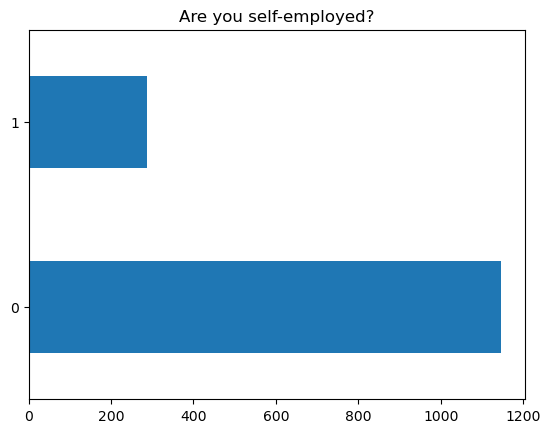

value counts of N_employees :


count   percent
26-100            292  0.203768
NaN               287  0.200279
More than 1000    256  0.178646
100-500           248  0.173064
6-25              210  0.146546
500-1000           80  0.055827
1-5                60  0.041870

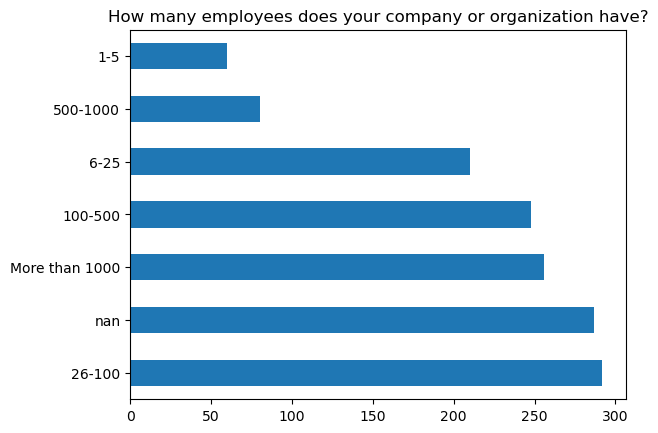

value counts of tech_employer :


count   percent
1.0    883  0.616190
NaN    287  0.200279
0.0    263  0.183531

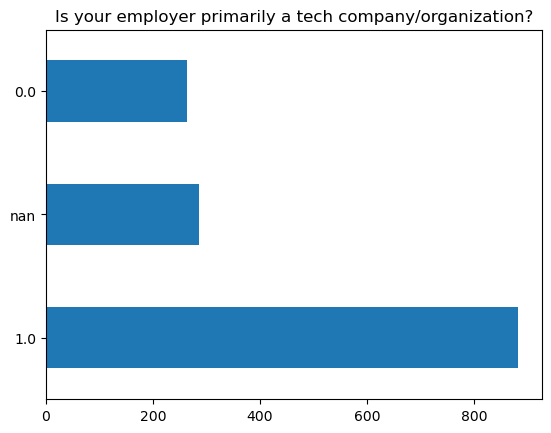

value counts of tech_role :


count   percent
NaN   1170  0.816469
1.0    248  0.173064
0.0     15  0.010468

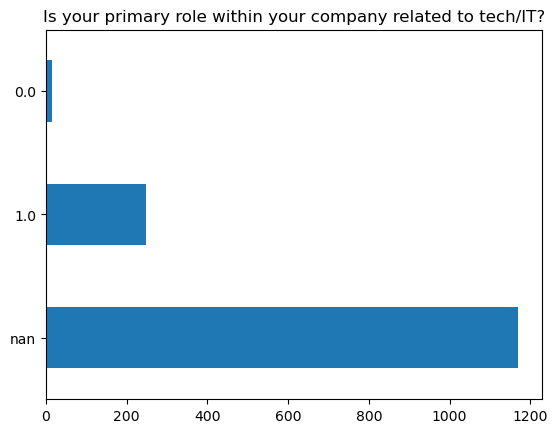

value counts of employer_mh_benefits :


count   percent
Yes                                531  0.370551
I don't know                       319  0.222610
NaN                                287  0.200279
No                                 213  0.148639
Not eligible for coverage / N/A     83  0.057920

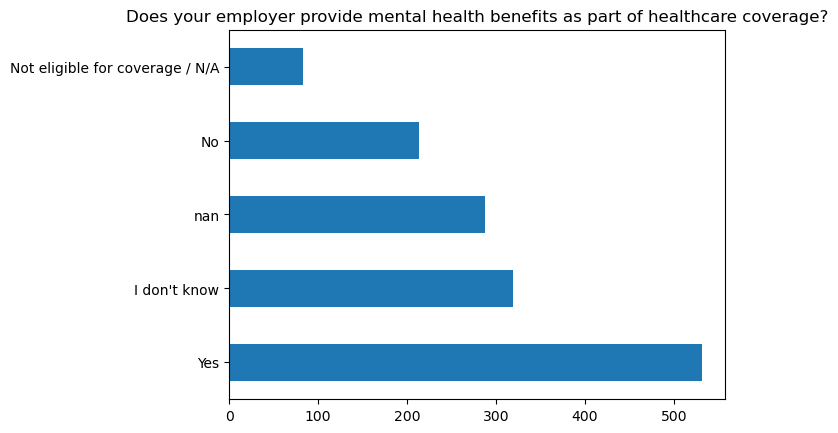

value counts of employer_mh_options_known :


count   percent
NaN              420  0.293091
No               354  0.247034
I am not sure    352  0.245639
Yes              307  0.214236

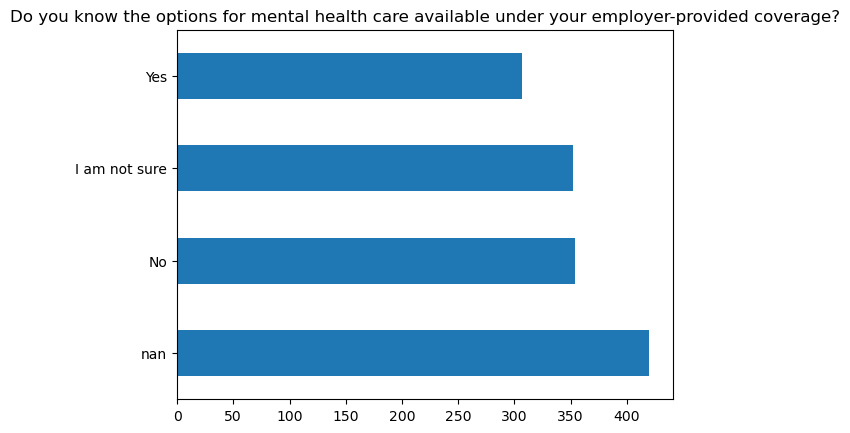

value counts of employer_mh_formally_discussed :


count   percent
No              813  0.567341
NaN             287  0.200279
Yes             230  0.160502
I don't know    103  0.071877

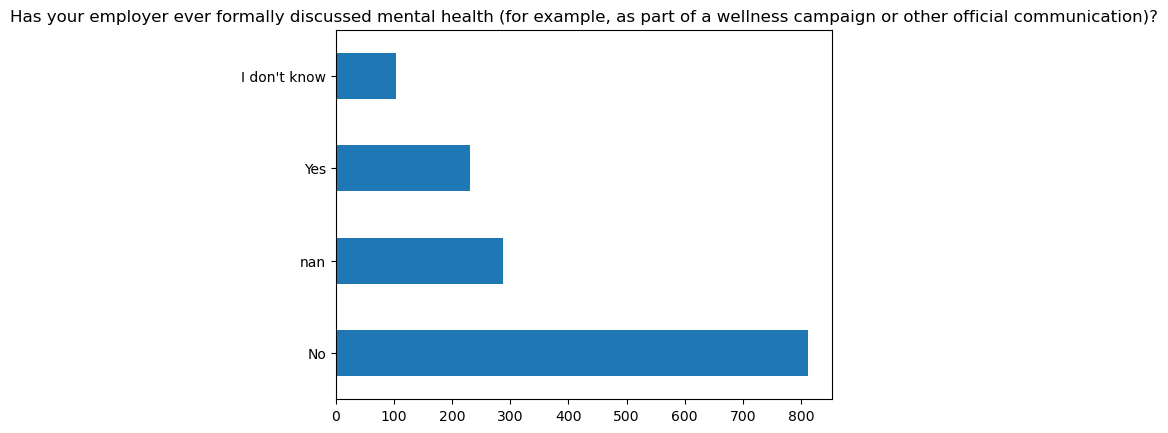

value counts of employer_mh_ressources_offered :


count   percent
No              531  0.370551
I don't know    320  0.223308
Yes             295  0.205862
NaN             287  0.200279

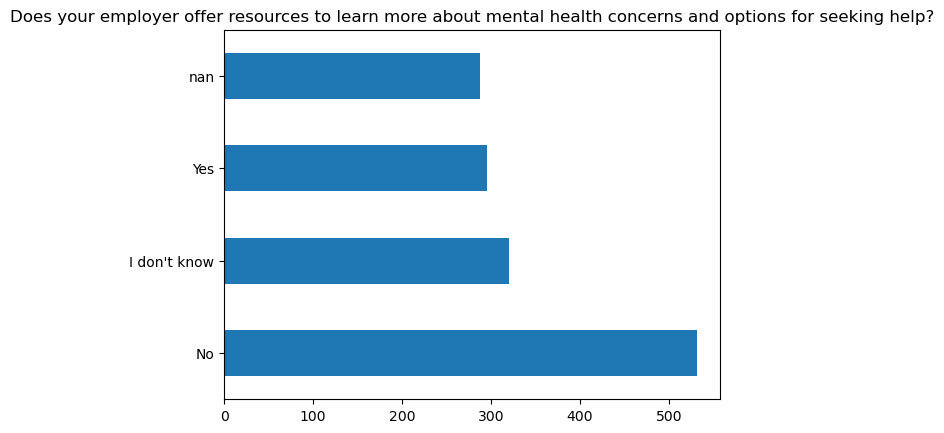

value counts of employer_anonymity_mh_benefits :


count   percent
I don't know    742  0.517795
Yes             320  0.223308
NaN             287  0.200279
No               84  0.058618

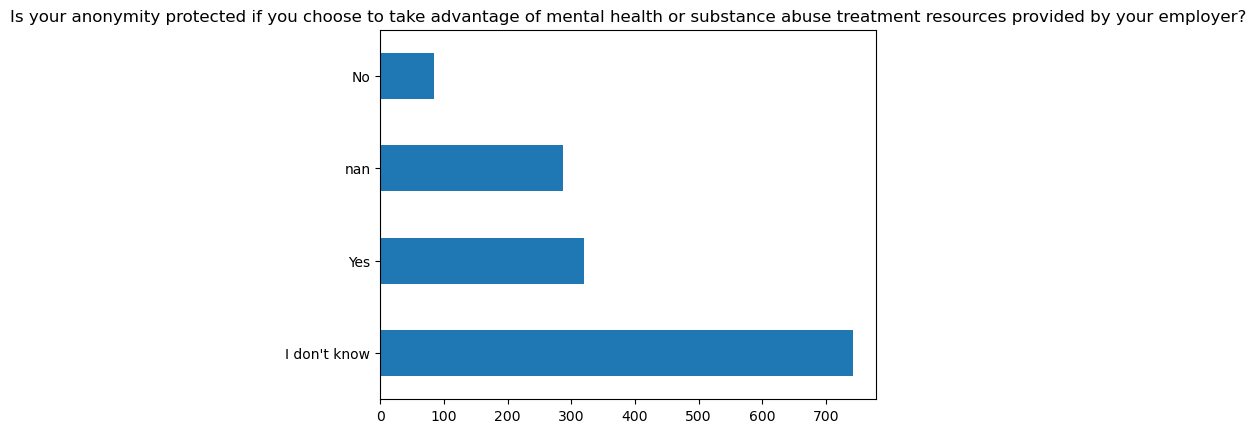

value counts of difficulty_asking_for_leave :


count   percent
NaN                           287  0.200279
Somewhat easy                 281  0.196092
Very easy                     220  0.153524
Somewhat difficult            199  0.138870
Neither easy nor difficult    178  0.124215
I don't know                  150  0.104676
Very difficult                118  0.082345

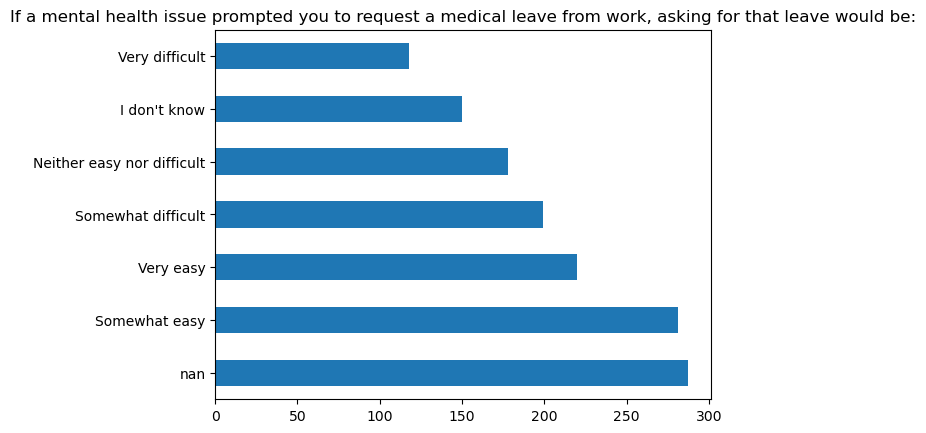

value counts of employer_neg_conseq_mh_disclosure_expected :


count   percent
Maybe    487  0.339846
No       438  0.305652
NaN      287  0.200279
Yes      221  0.154222

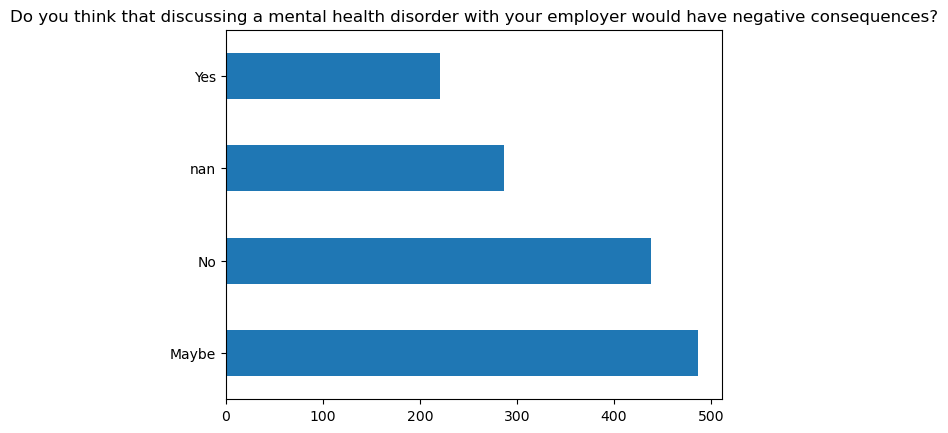

value counts of employer_neg_conseq_physical_disclosure_expected :


count   percent
No       837  0.584089
NaN      287  0.200279
Maybe    268  0.187020
Yes       41  0.028611

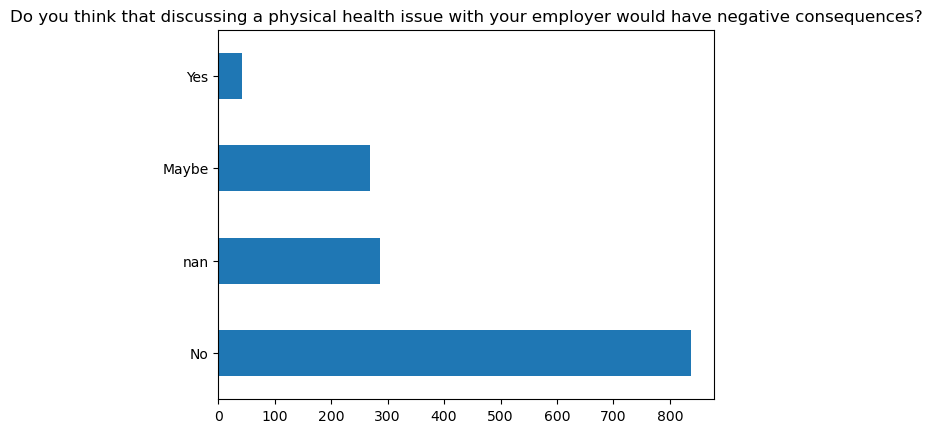

value counts of mh_disclosure_coworker_comfortable :


count   percent
Maybe    479  0.334264
No       392  0.273552
NaN      287  0.200279
Yes      275  0.191905

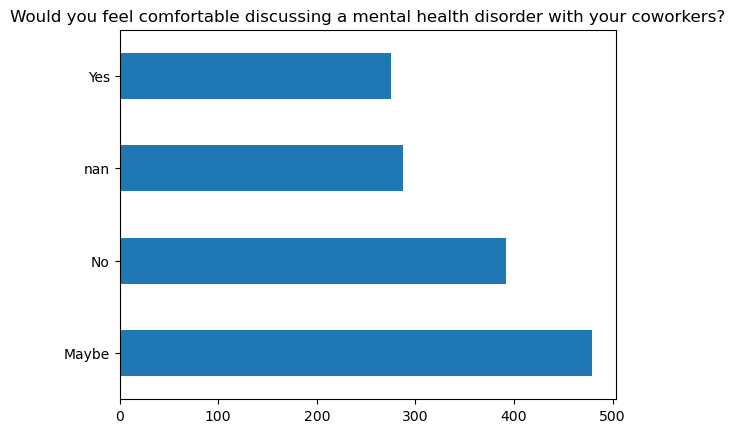

value counts of mh_disclosure_supervisor_comfortable :


count   percent
Yes      428  0.298674
Maybe    382  0.266574
No       336  0.234473
NaN      287  0.200279

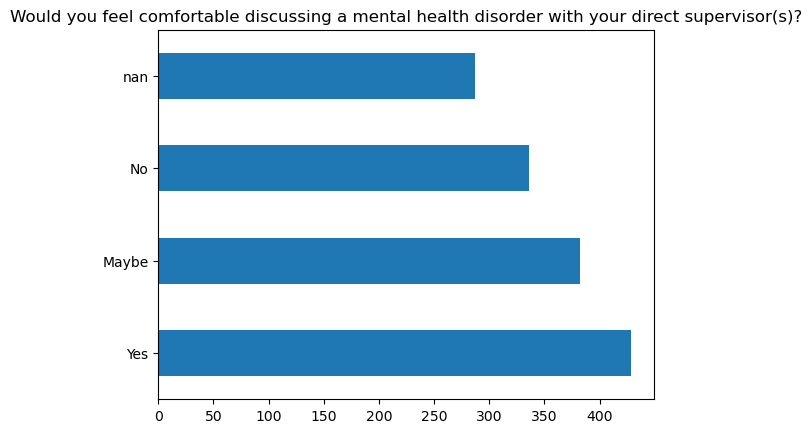

value counts of seriousness_mh_physical_employer :


count   percent
I don't know    493  0.344033
Yes             350  0.244243
No              303  0.211445
NaN             287  0.200279

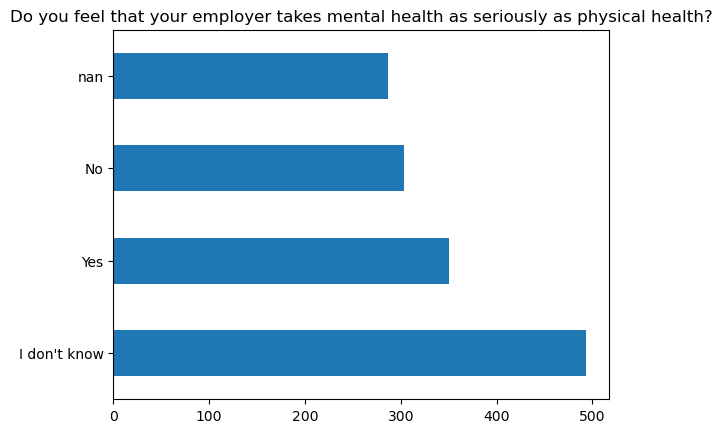

value counts of neg_conseq_coworker_mh_disclosure_employer :


count   percent
No    1048  0.731333
NaN    287  0.200279
Yes     98  0.068388

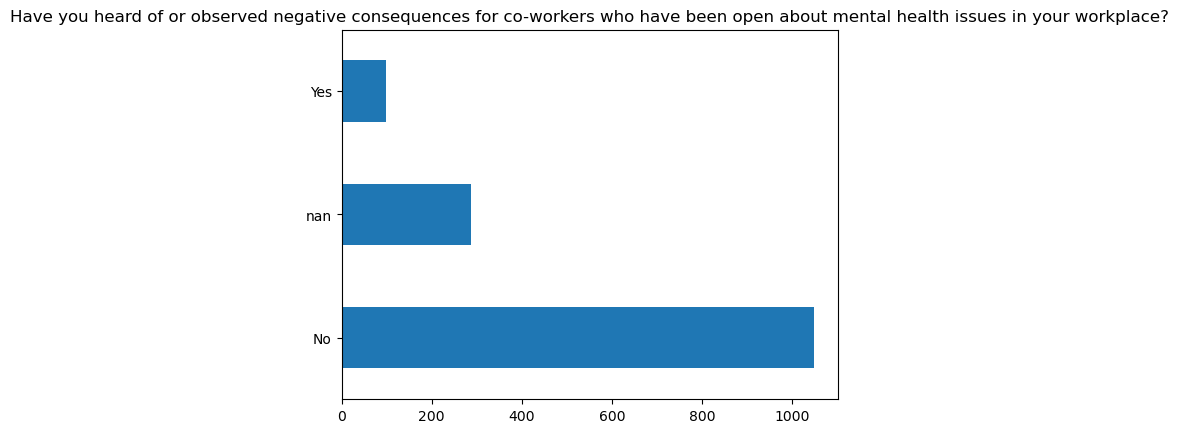

value counts of mh_treatment_coverage :


count   percent
NaN   1146  0.799721
1.0    185  0.129100
0.0    102  0.071179

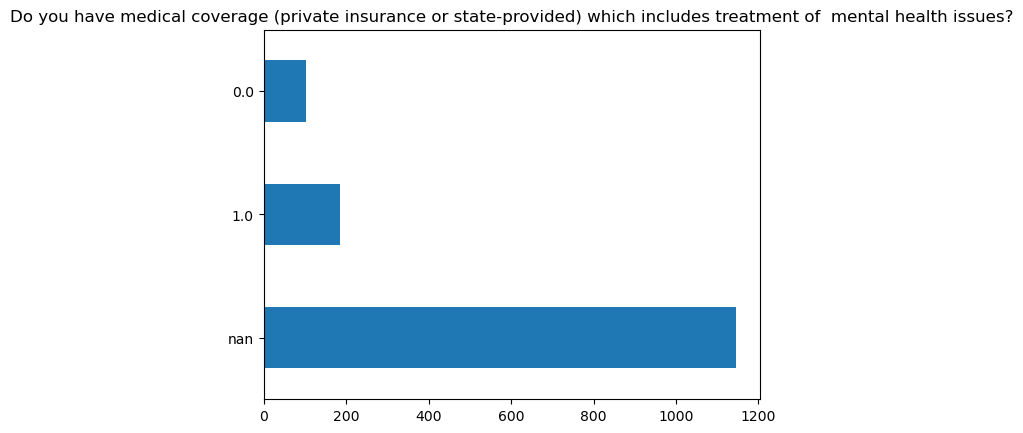

value counts of local_resources_mh_known :


count   percent
NaN                    1146  0.799721
I know some             141  0.098395
Yes, I know several      83  0.057920
No, I don't know any     63  0.043964

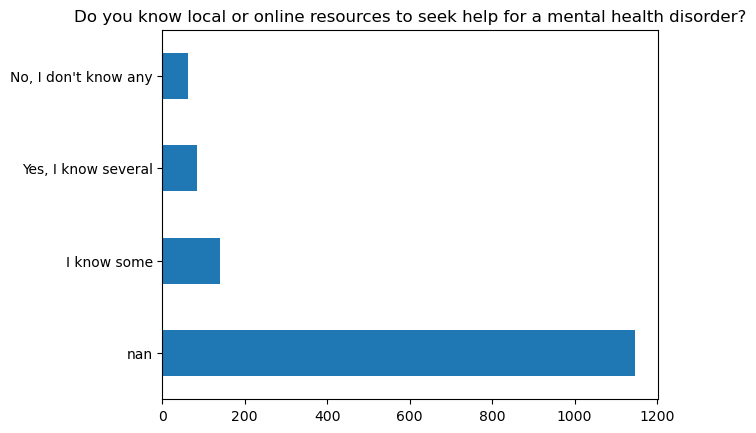

value counts of mh_disclosure_clients :


count   percent
NaN                                         1146  0.799721
Not applicable to me                         101  0.070482
No, because it would impact me negatively     83  0.057920
Sometimes, if it comes up                     57  0.039777
No, because it doesn't matter                 44  0.030705
Yes, always                                    2  0.001396

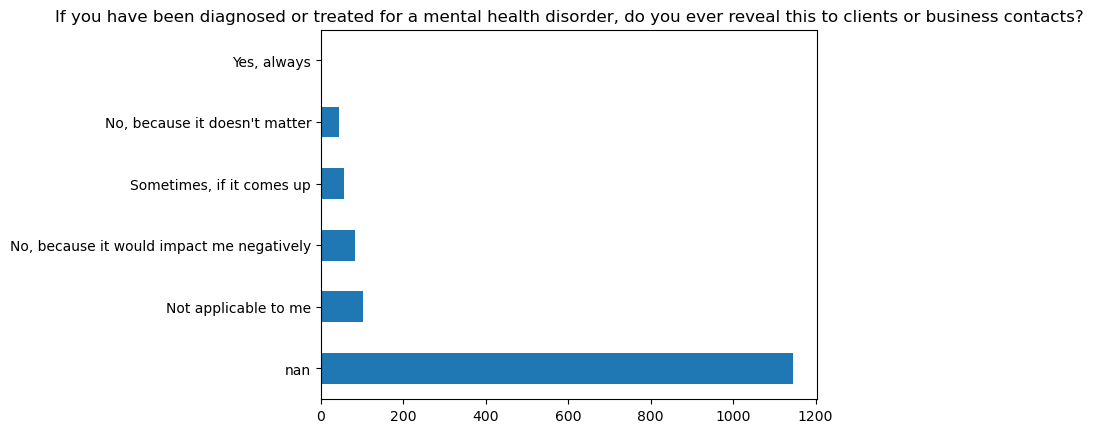

value counts of mh_disclosure_clients_neg_impact :


count   percent
NaN            1289  0.899512
I'm not sure     66  0.046057
No               42  0.029309
Yes              36  0.025122

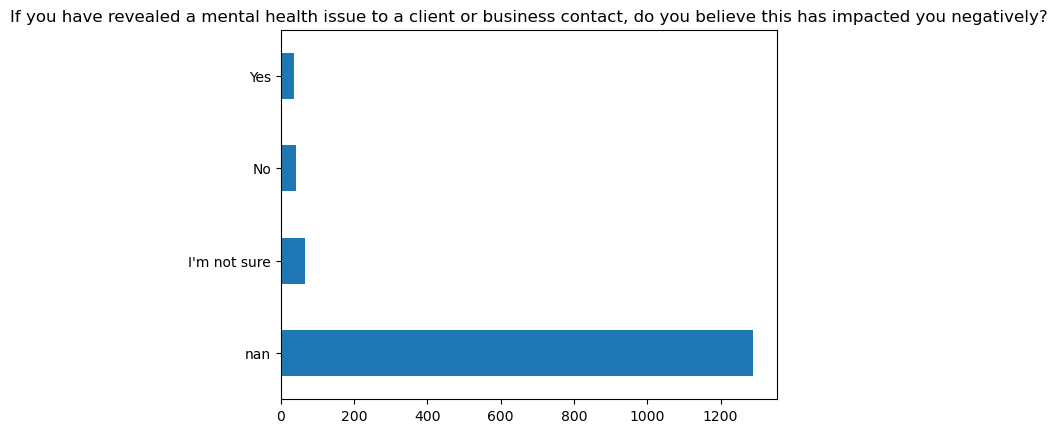

value counts of mh_disclosure_coworker :


count   percent
NaN                                         1146  0.799721
Not applicable to me                         111  0.077460
Sometimes, if it comes up                     99  0.069086
No, because it would impact me negatively     51  0.035590
No, because it doesn't matter                 15  0.010468
Yes, always                                   11  0.007676

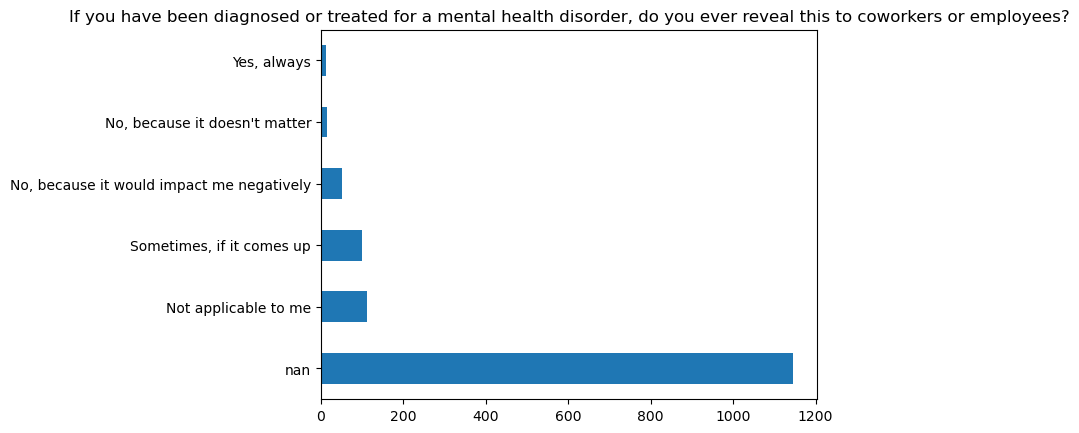

value counts of mh_disclosure_coworker_neg_impact :


count   percent
NaN                    1146  0.799721
Not applicable to me    133  0.092812
I'm not sure             62  0.043266
No                       57  0.039777
Yes                      35  0.024424

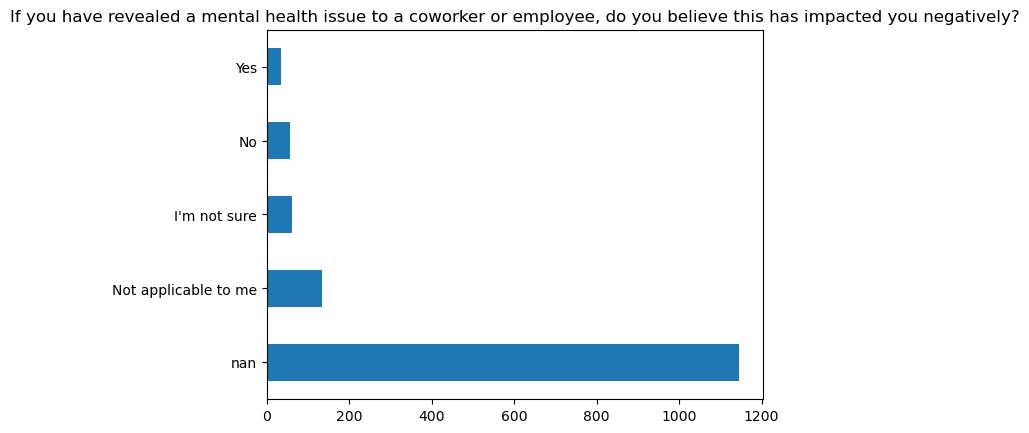

value counts of mh_effect_on_productivity :


count   percent
NaN                    1146  0.799721
Yes                     204  0.142359
Unsure                   38  0.026518
Not applicable to me     31  0.021633
No                       14  0.009770

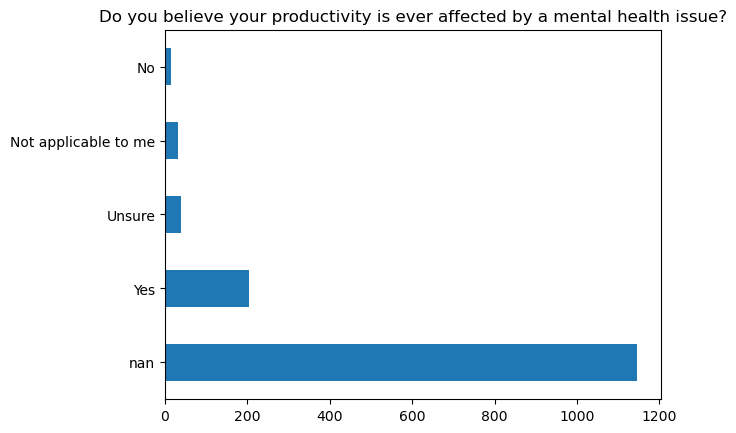

value counts of mh_effect_on_productivity_percent :


count   percent
NaN       1229  0.857641
1-25%       92  0.064201
26-50%      72  0.050244
51-75%      26  0.018144
76-100%     14  0.009770

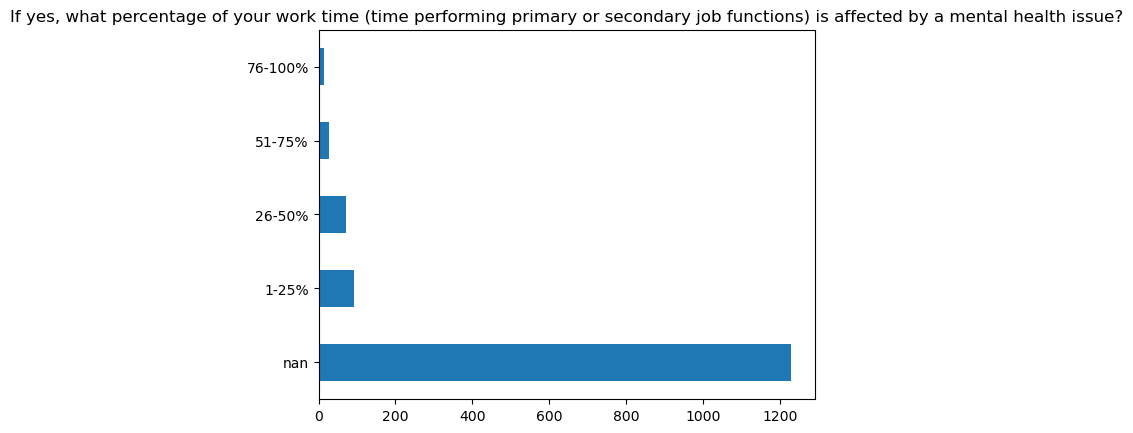

value counts of prev_employers :


count   percent
1   1264  0.882066
0    169  0.117934

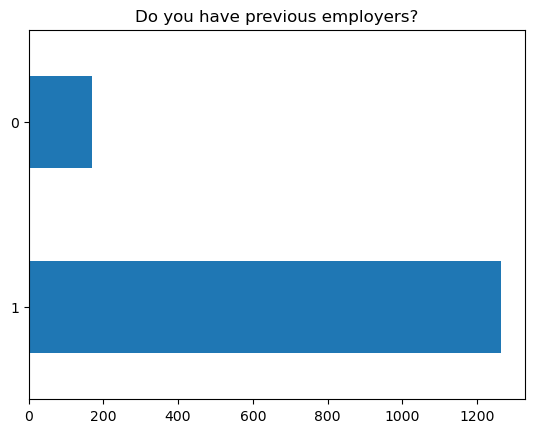

value counts of prev_employers_mh_benefits :


count   percent
Some did             391  0.272854
No, none did         372  0.259595
I don't know         313  0.218423
Yes, they all did    188  0.131193
NaN                  169  0.117934

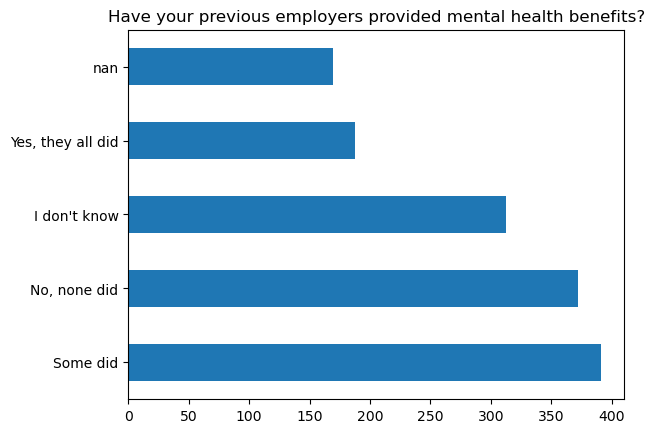

value counts of prev_employers_mh_options_known :


count   percent
N/A (not currently aware)          582  0.406141
I was aware of some                384  0.267969
Yes, I was aware of all of them    181  0.126308
NaN                                169  0.117934
No, I only became aware later      117  0.081647

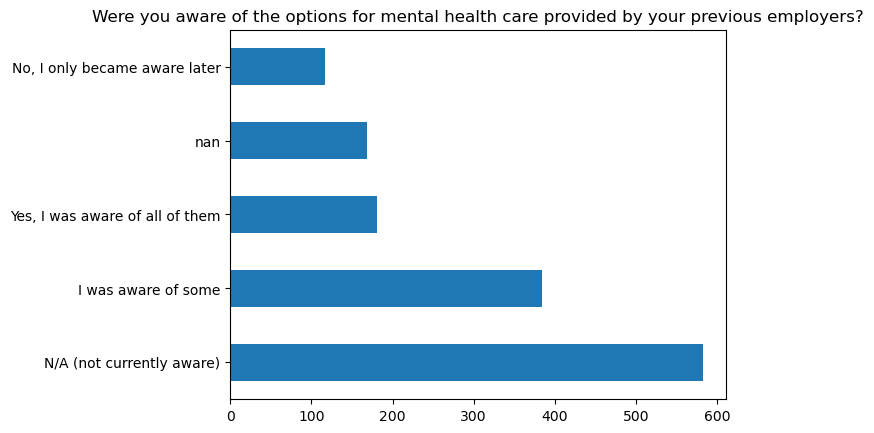

value counts of prev_employers_mh_formally_discussed :


count   percent
None did             890  0.621075
Some did             255  0.177948
NaN                  169  0.117934
I don't know          86  0.060014
Yes, they all did     33  0.023029

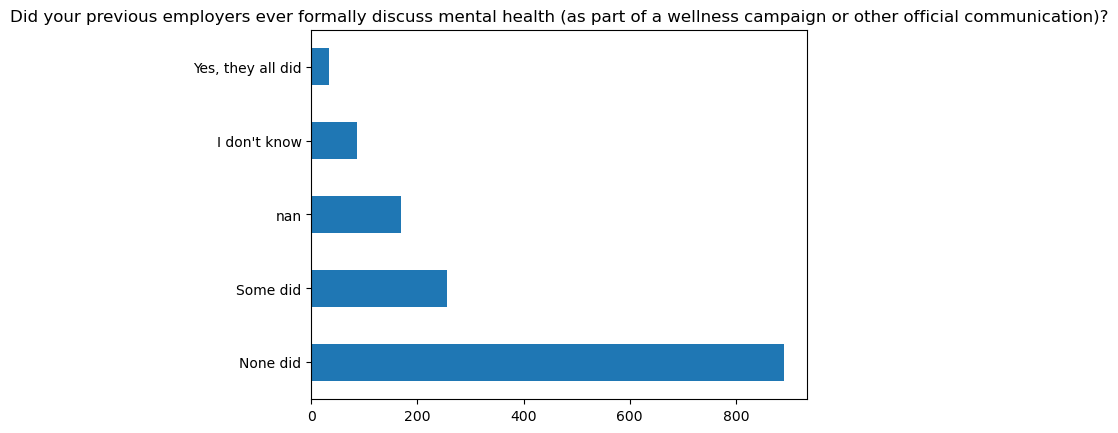

value counts of prev_employers_mh_ressources_offered :


count   percent
None did             842  0.587579
Some did             371  0.258897
NaN                  169  0.117934
Yes, they all did     51  0.035590

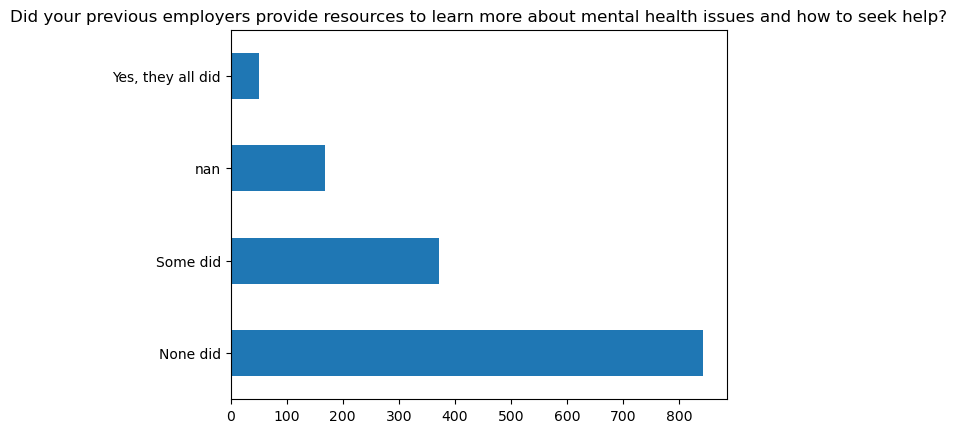

value counts of prev_employer_anonymity_mh_benefits :


count   percent
I don't know    860  0.600140
NaN             169  0.117934
Yes, always     164  0.114445
No              121  0.084438
Sometimes       119  0.083043

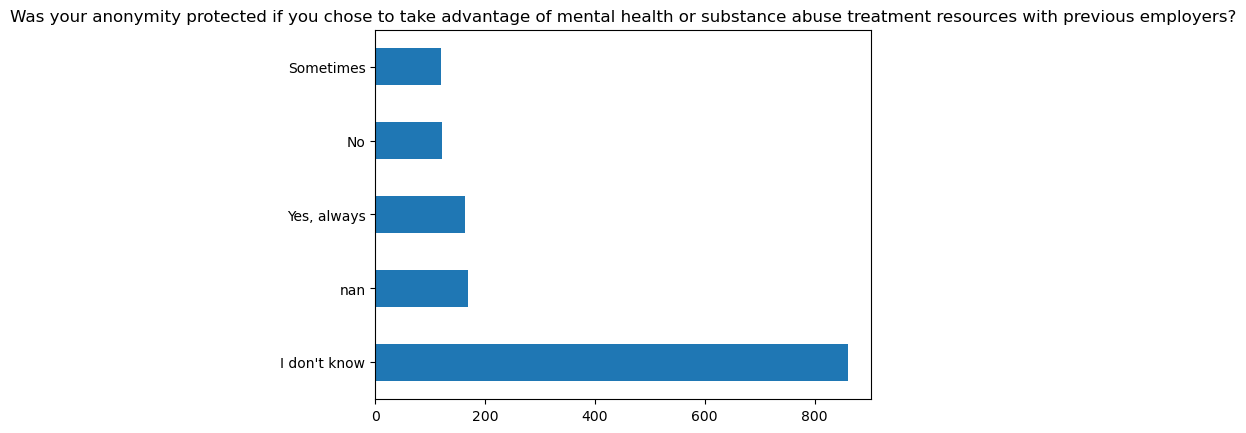

value counts of prev_employers_neg_conseq_mh_disclosure_expected :


count   percent
Some of them        615  0.429170
I don't know        310  0.216329
Yes, all of them    226  0.157711
NaN                 169  0.117934
None of them        113  0.078856

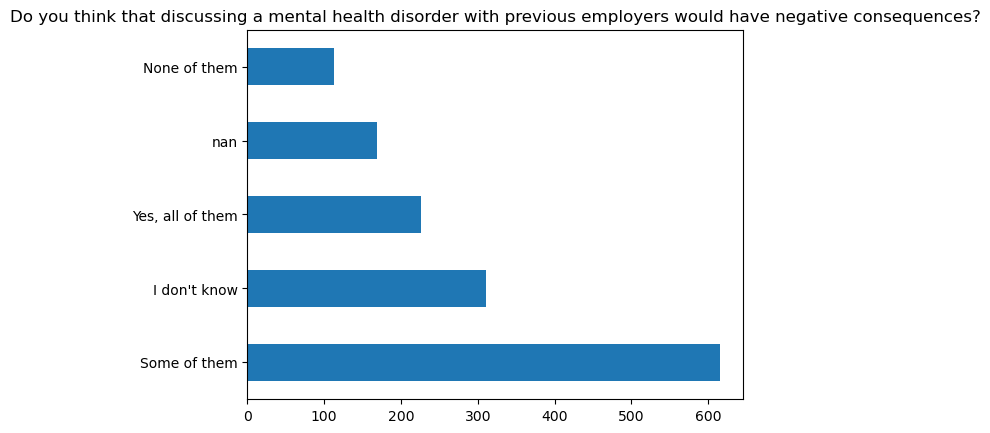

value counts of prev_employers_neg_conseq_physical_disclosure_expected :


count   percent
Some of them        631  0.440335
None of them        559  0.390091
NaN                 169  0.117934
Yes, all of them     74  0.051640

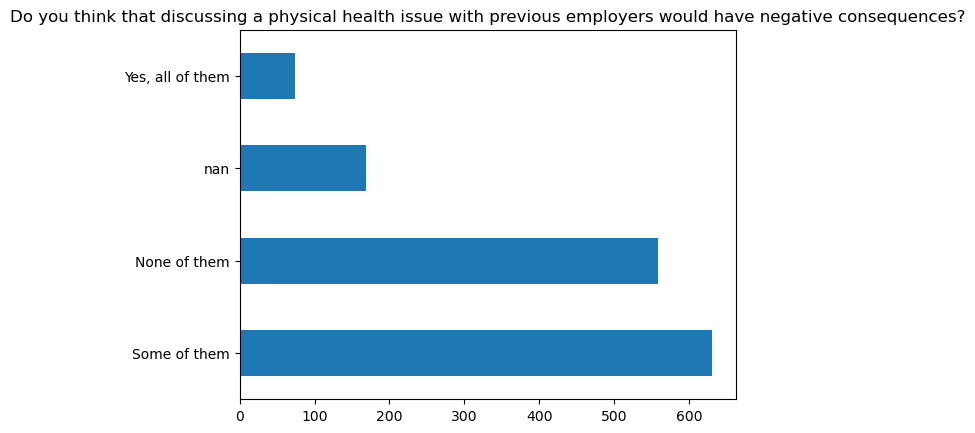

value counts of mh_disclosure_prev_coworkers_comfortable :


count   percent
Some of my previous employers           740  0.516399
No, at none of my previous employers    430  0.300070
NaN                                     169  0.117934
Yes, at all of my previous employers     94  0.065597

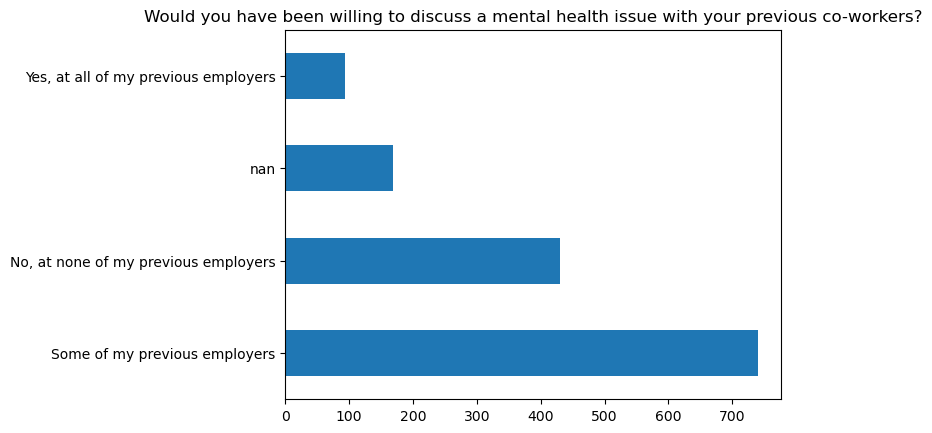

value counts of mh_disclosure_prev_supervisor_comfortable :


count   percent
Some of my previous employers           654  0.456385
No, at none of my previous employers    416  0.290300
NaN                                     169  0.117934
I don't know                            101  0.070482
Yes, at all of my previous employers     93  0.064899

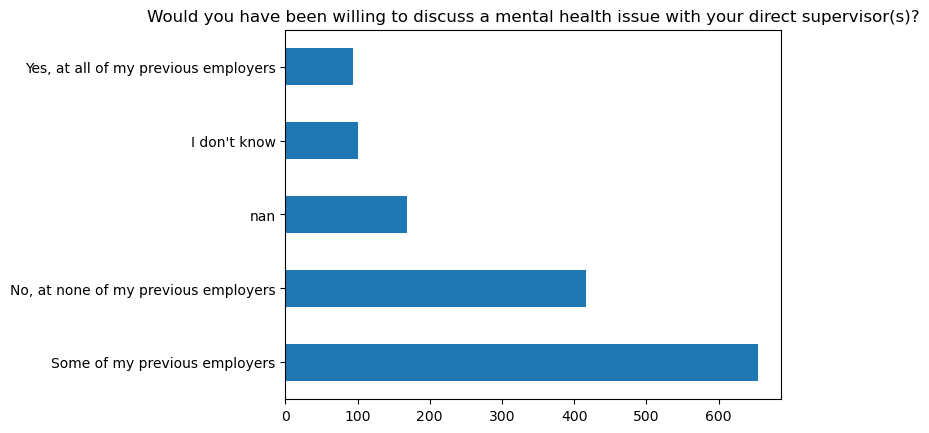

value counts of seriousness_mh_physical_prev_employers :


count   percent
None did             463  0.323098
Some did             427  0.297976
I don't know         331  0.230984
NaN                  169  0.117934
Yes, they all did     43  0.030007

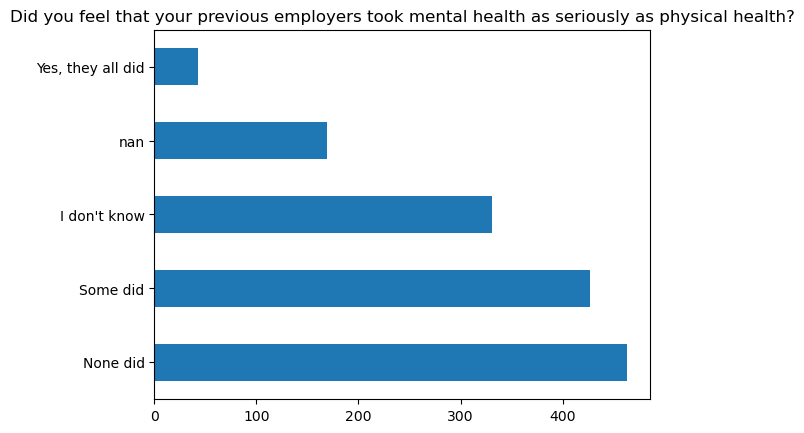

value counts of neg_conseq_coworker_mh_disclosure_prev_employers :


count   percent
None of them        758  0.528960
Some of them        444  0.309839
NaN                 169  0.117934
Yes, all of them     62  0.043266

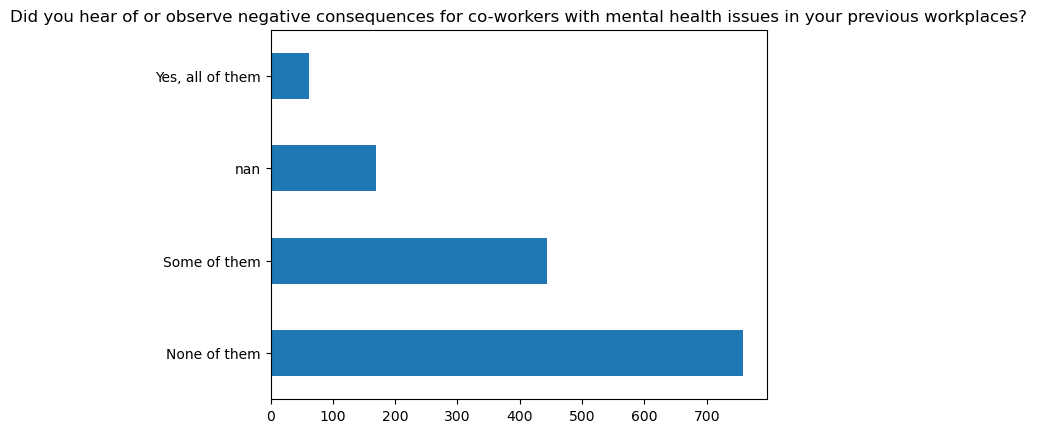

value counts of willingness_physical_disclosure_interview :


count   percent
Maybe    633  0.441731
No       441  0.307746
Yes      359  0.250523

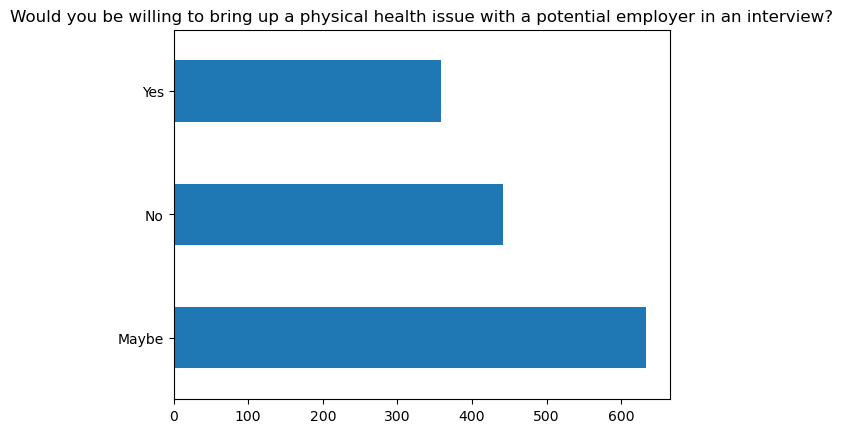

value counts of willingness_mh_disclosure_interview :


count   percent
No       883  0.616190
Maybe    438  0.305652
Yes      112  0.078158

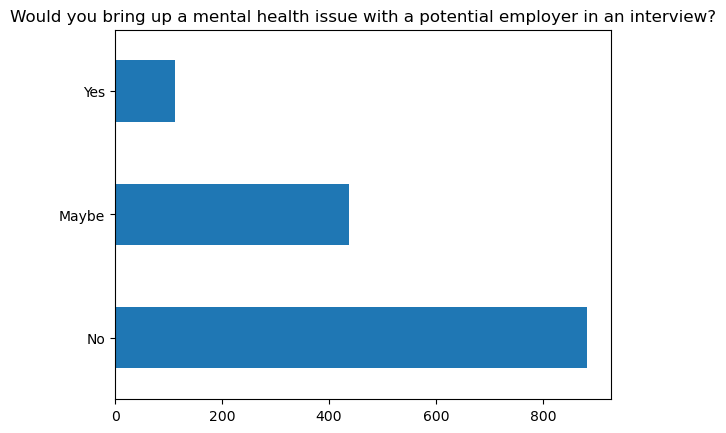

value counts of mh_disclosure_expected_neg_effect_career :


count   percent
Maybe                         588  0.410328
Yes, I think it would         563  0.392882
No, I don't think it would    147  0.102582
Yes, it has                   105  0.073273
No, it has not                 30  0.020935

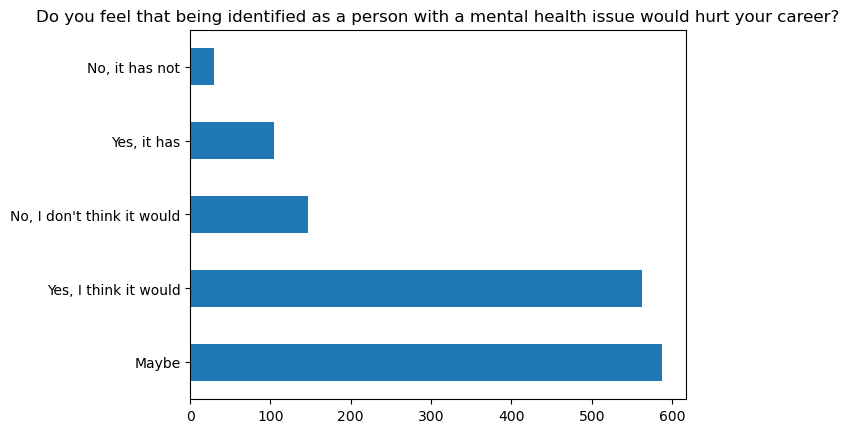

value counts of mh_disclosure_expected_neg_view_coworkers :


count   percent
Maybe                           591  0.412421
Yes, I think they would         403  0.281228
No, I don't think they would    348  0.242847
No, they do not                  49  0.034194
Yes, they do                     42  0.029309

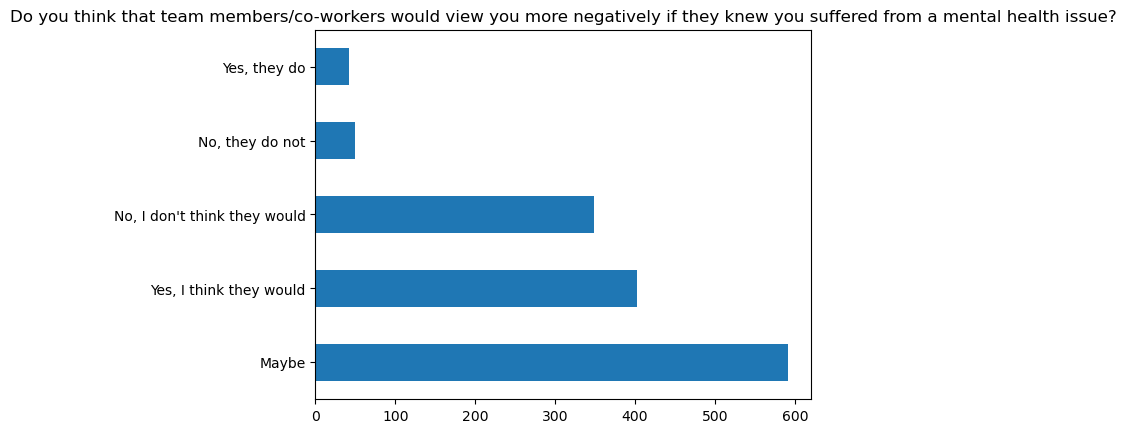

value counts of willingness_mh_disclosure_family :


count   percent
Somewhat open                                         640  0.446615
Very open                                             251  0.175157
Somewhat not open                                     214  0.149337
Neutral                                               141  0.098395
Not applicable to me (I do not have a mental il...    112  0.078158
Not open at all                                        75  0.052338

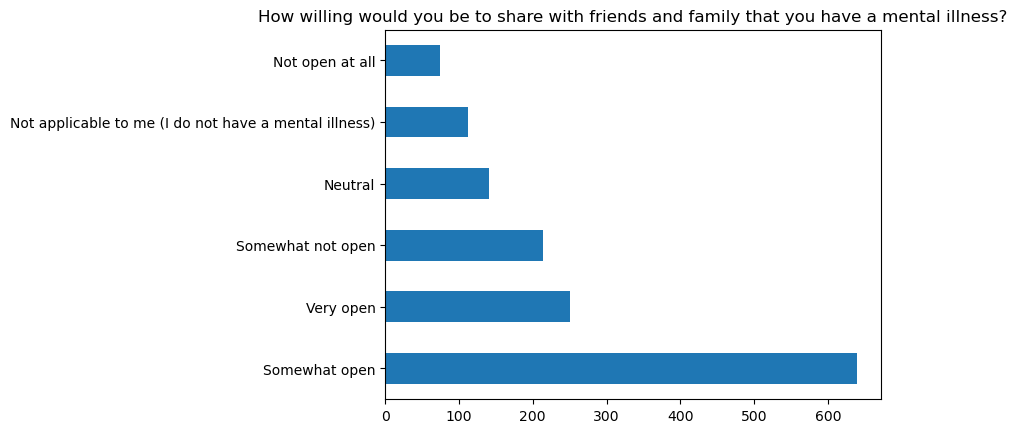

value counts of mh_neg_effect_workplace_observed :


count   percent
No                    567  0.395673
Maybe/Not sure        346  0.241452
Yes, I observed       264  0.184229
Yes, I experienced    167  0.116539
NaN                    89  0.062107

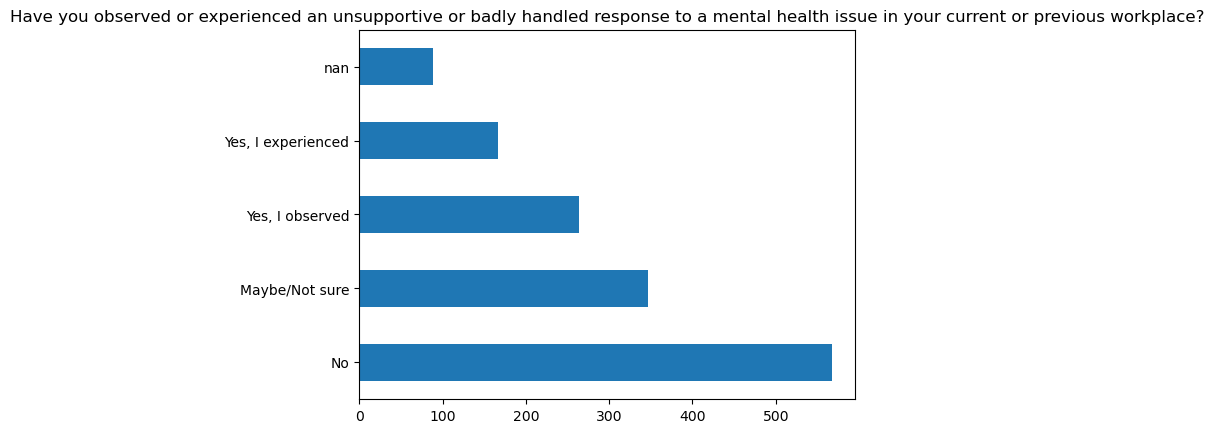

value counts of effect_neg_conseq_mh_disclosure :


count   percent
NaN      776  0.541521
Yes      246  0.171668
No       234  0.163294
Maybe    177  0.123517

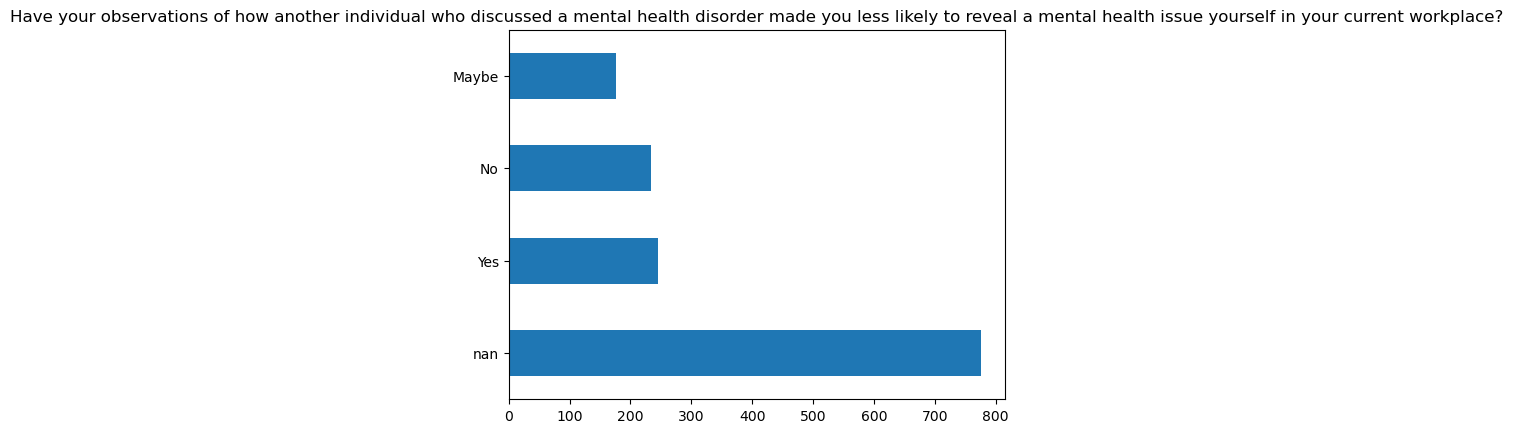

value counts of family_history_mental_illness :


count   percent
Yes             670  0.467551
No              488  0.340544
I don't know    275  0.191905

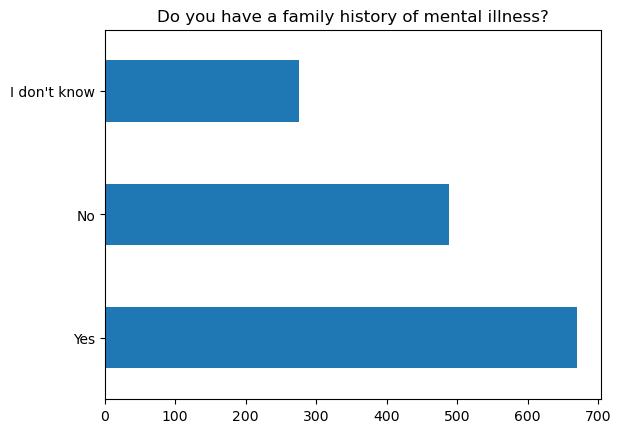

value counts of self_mental_illness_past :


count   percent
Yes      736  0.513608
No       451  0.314724
Maybe    246  0.171668

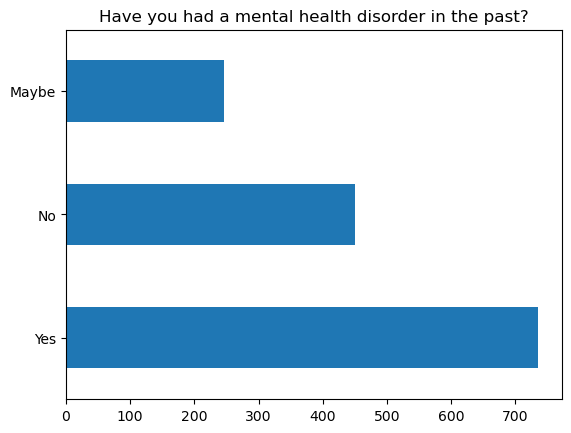

value counts of self_mental_illness_present :


count   percent
Yes      575  0.401256
No       531  0.370551
Maybe    327  0.228193

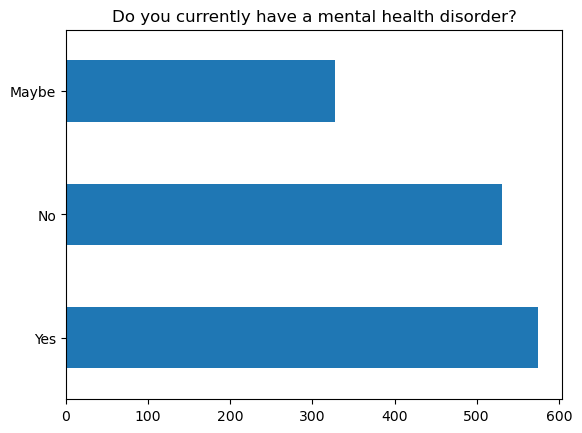

value counts of diagnosed_by_professional :


count   percent
No     717  0.500349
Yes    716  0.499651

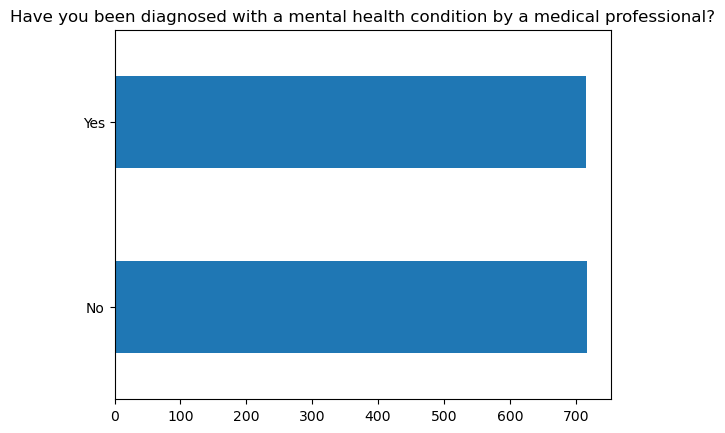

value counts of mental_illness_treated :


count   percent
1    839  0.585485
0    594  0.414515

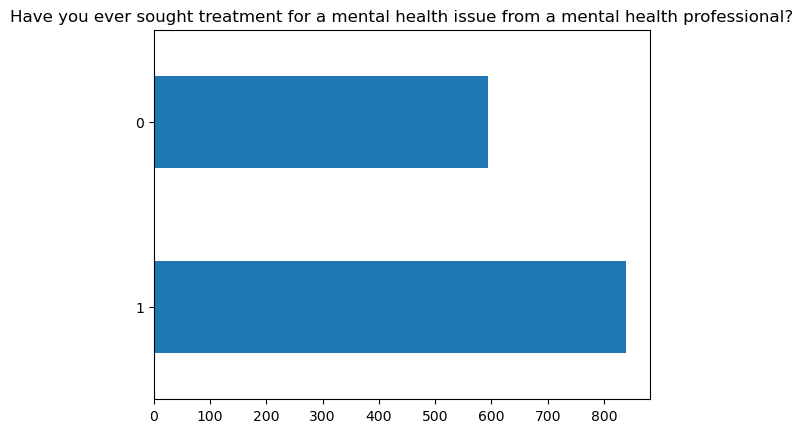

value counts of neg_effect_work_treated :


count   percent
Not applicable to me    557  0.388695
Sometimes               369  0.257502
Rarely                  322  0.224703
Never                   120  0.083740
Often                    65  0.045359

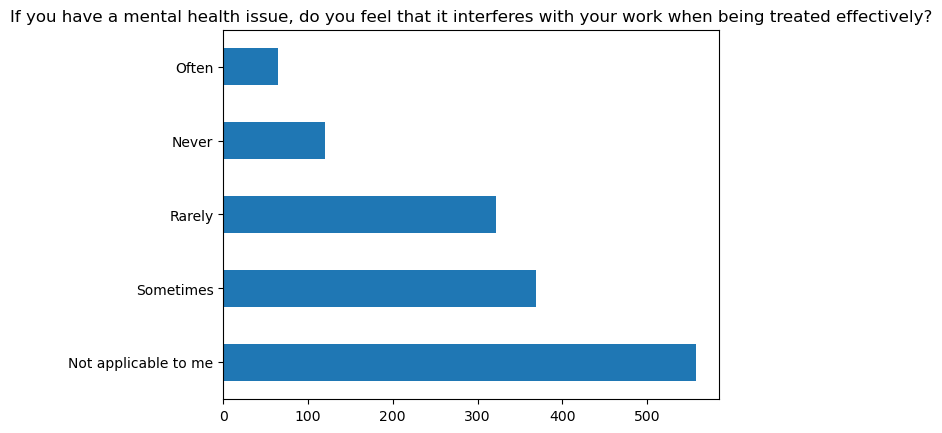

value counts of neg_effect_work_not_treated :


count   percent
Often                   538  0.375436
Not applicable to me    468  0.326588
Sometimes               363  0.253315
Rarely                   52  0.036288
Never                    12  0.008374

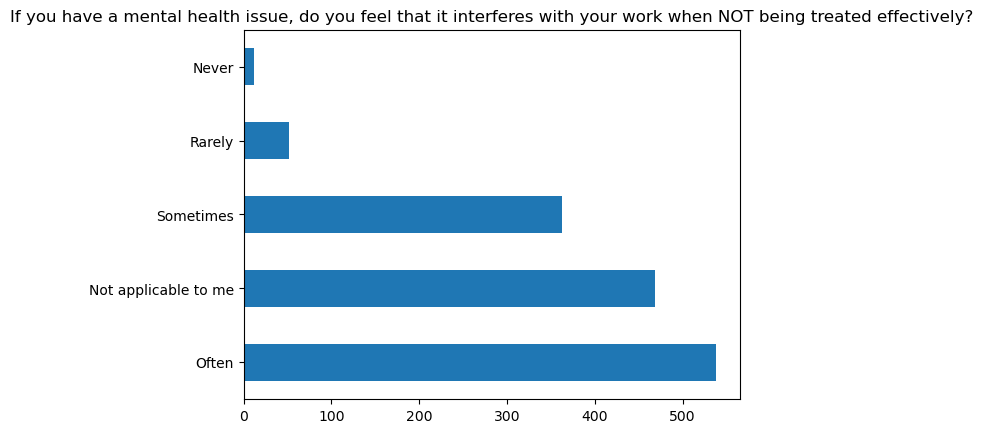

value counts of work_remotely :


count   percent
Sometimes    757  0.528262
Always       343  0.239358
Never        333  0.232380

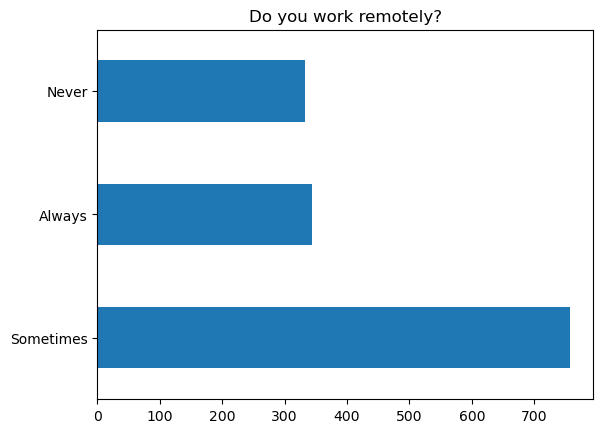

In [11]:
# visualize value counts for variables with at most 10 unique values
def explore_few_uniques_features(data): 
    """show for each feature in data, absolute and relative value counts and visualize the value counts in a bar plot
    
    :param data:  the data for which the value count is to be displayed and visualized ('pandas.core.frame.DataFrame')
    """
    
    df_uniques = f.create_uniques_df(data)
    df_few_uniques = df_uniques.loc[df_uniques['uniques_count'] < 11]
    few_uniques_features = df_few_uniques['variable'].tolist()
    for column in few_uniques_features:
        f.explore_feature(data[column])

explore_few_uniques_features(df_names)

Observations
* many variables have exactly 287 missing values
* there are also exactly 287 self-employed participants
* since the variables with exactly 287 missing values concern current employers (which the self-employed participants do not have), it seems very likely that the 287 self-employed participants are responsible for the 287 missing values in the variables 
* there are exactly 1146 missing values in other variables (on clients, business contacts, coworkers, and employees)
* there are also exactly 1146 participants who are not self-employed
* it is likely that only self-employed participants have seen the variables, which explains the high number of missing values

In [12]:
# exclude self-employed participants since they do not belong to the target group 
df_emp = df_names.loc[df_names['self_employed'] == 0].copy()
print('shape before exclusion:', df_names.shape)
print('shape after exclusion:', df_emp.shape)

shape before exclusion: (1433, 63)
shape after exclusion: (1146, 63)


value counts of self_employed :


count  percent
0   1146      1.0

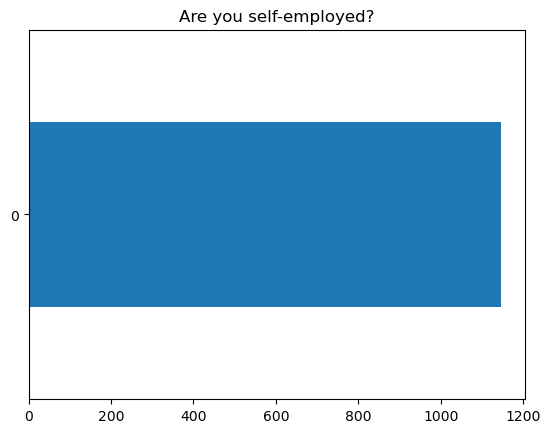

value counts of N_employees :


count   percent
26-100            292  0.254799
More than 1000    256  0.223386
100-500           248  0.216405
6-25              210  0.183246
500-1000           80  0.069808
1-5                60  0.052356

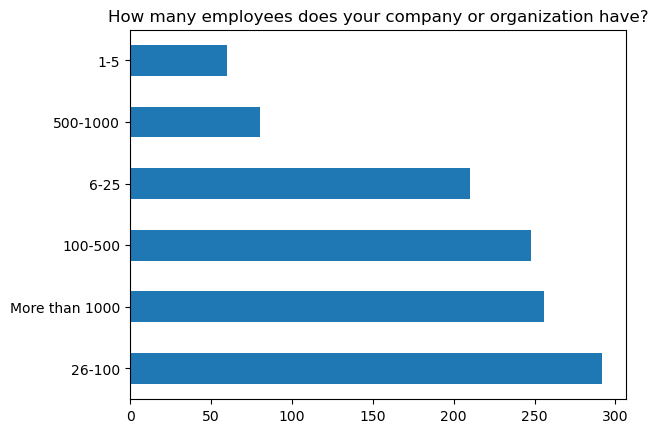

value counts of tech_employer :


count   percent
1.0    883  0.770506
0.0    263  0.229494

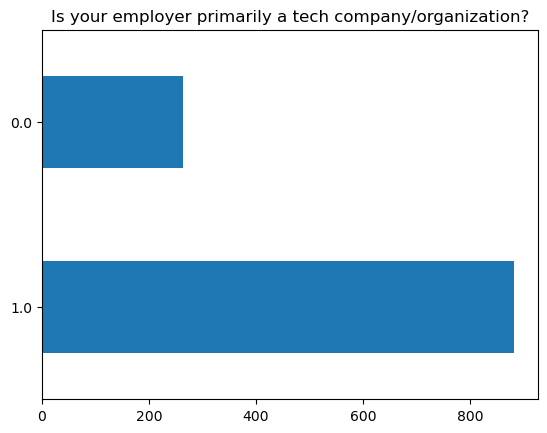

value counts of tech_role :


count   percent
NaN    883  0.770506
1.0    248  0.216405
0.0     15  0.013089

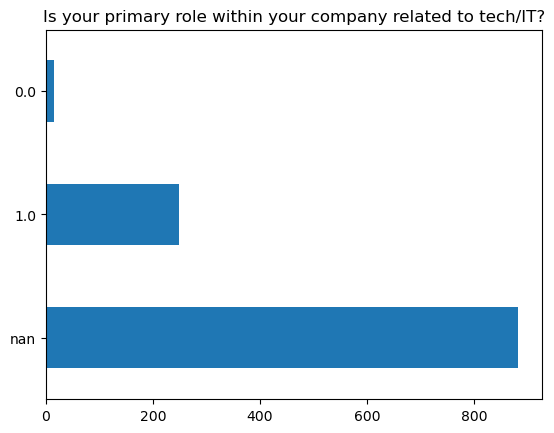

value counts of employer_mh_benefits :


count   percent
Yes                                531  0.463351
I don't know                       319  0.278360
No                                 213  0.185864
Not eligible for coverage / N/A     83  0.072426

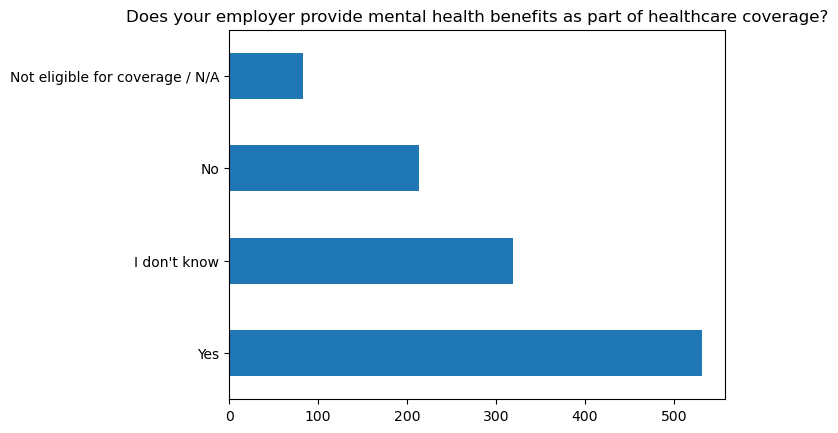

value counts of employer_mh_options_known :


count   percent
No               354  0.308901
I am not sure    352  0.307155
Yes              307  0.267888
NaN              133  0.116056

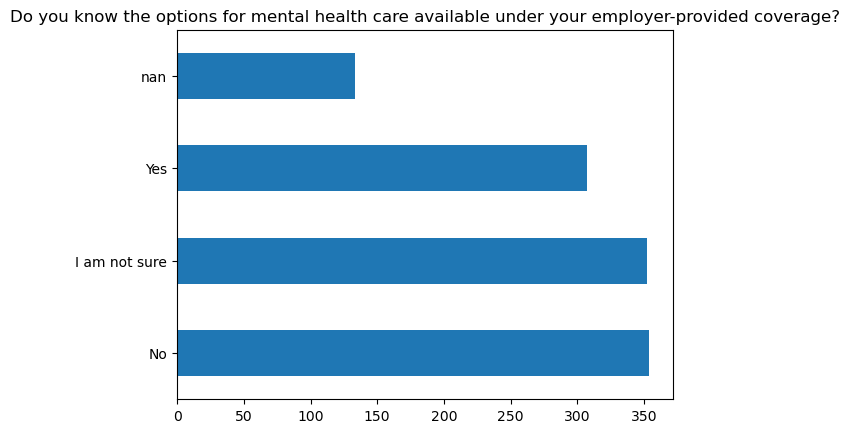

value counts of employer_mh_formally_discussed :


count   percent
No              813  0.709424
Yes             230  0.200698
I don't know    103  0.089878

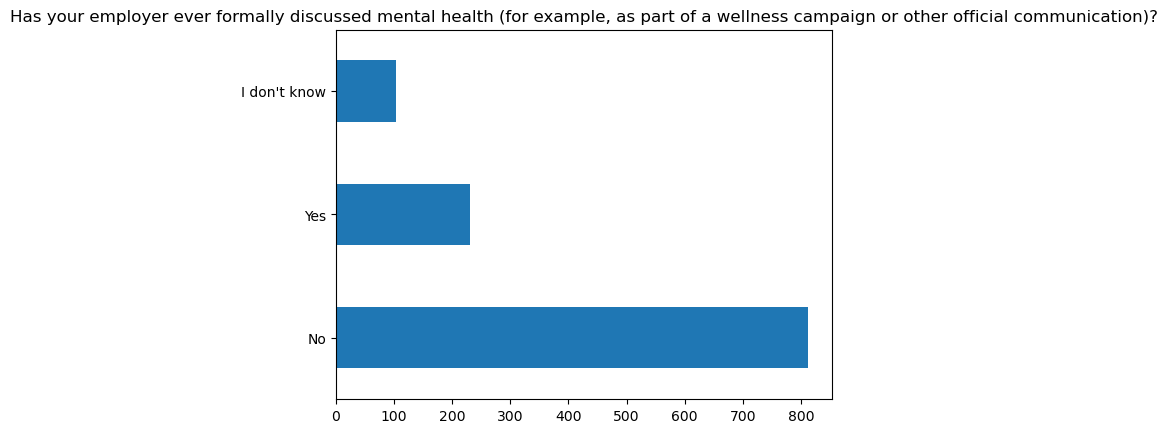

value counts of employer_mh_ressources_offered :


count   percent
No              531  0.463351
I don't know    320  0.279232
Yes             295  0.257417

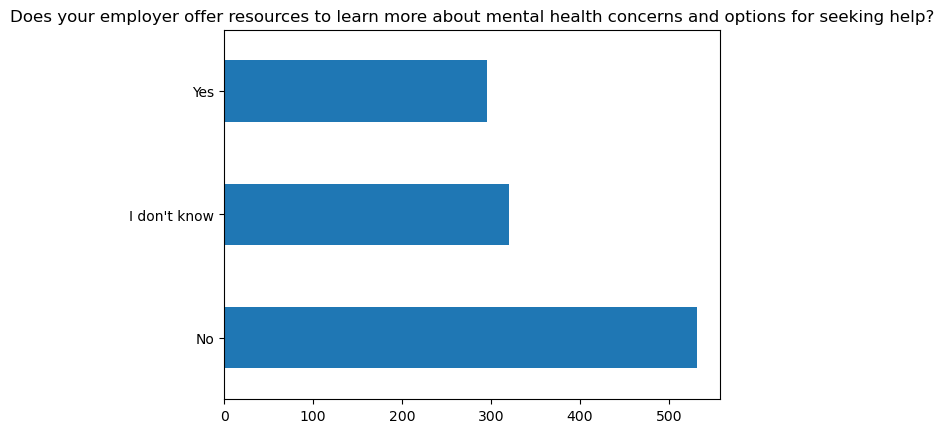

value counts of employer_anonymity_mh_benefits :


count   percent
I don't know    742  0.647469
Yes             320  0.279232
No               84  0.073298

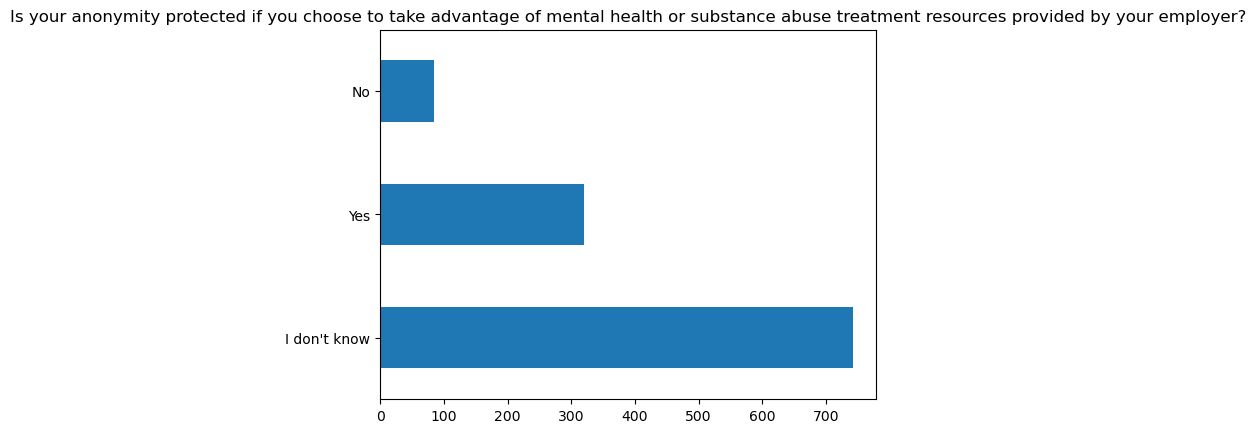

value counts of difficulty_asking_for_leave :


count   percent
Somewhat easy                 281  0.245201
Very easy                     220  0.191972
Somewhat difficult            199  0.173647
Neither easy nor difficult    178  0.155323
I don't know                  150  0.130890
Very difficult                118  0.102967

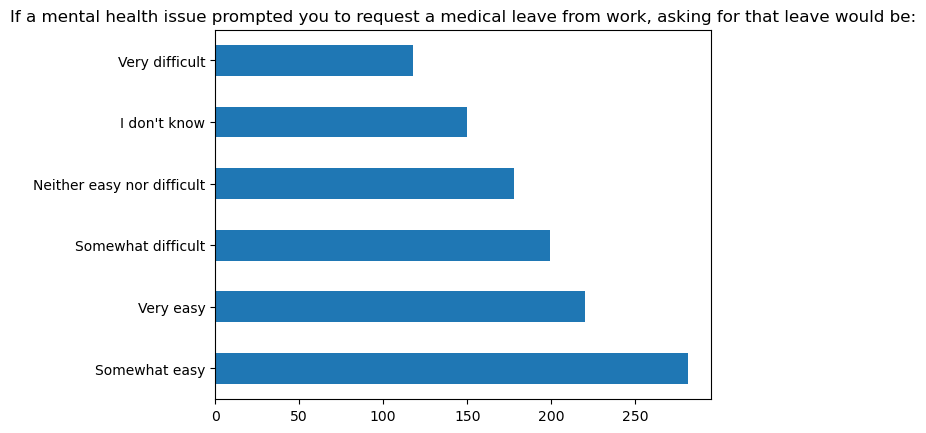

value counts of employer_neg_conseq_mh_disclosure_expected :


count   percent
Maybe    487  0.424956
No       438  0.382199
Yes      221  0.192845

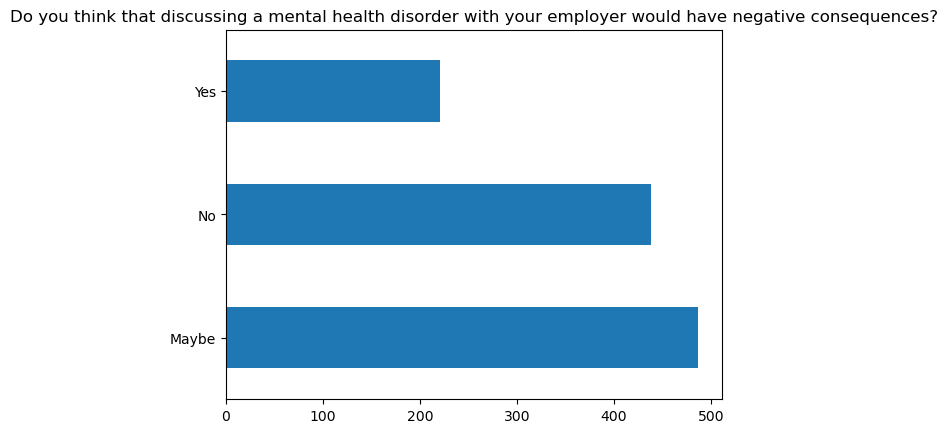

value counts of employer_neg_conseq_physical_disclosure_expected :


count   percent
No       837  0.730366
Maybe    268  0.233857
Yes       41  0.035777

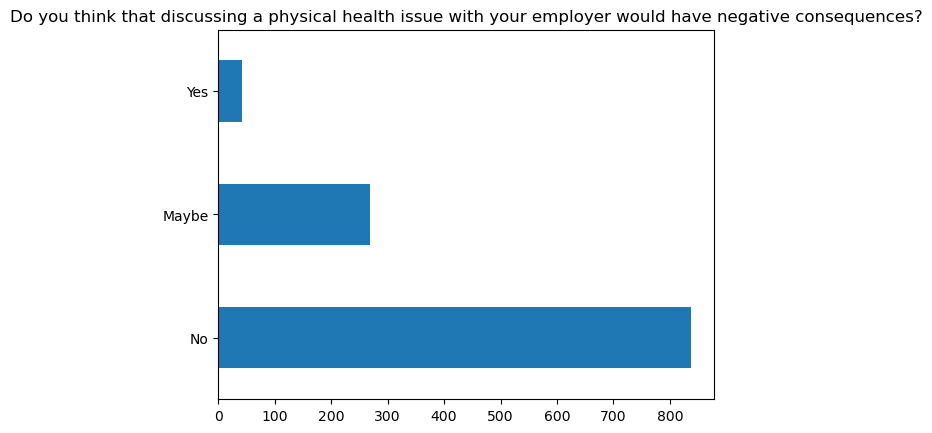

value counts of mh_disclosure_coworker_comfortable :


count   percent
Maybe    479  0.417976
No       392  0.342059
Yes      275  0.239965

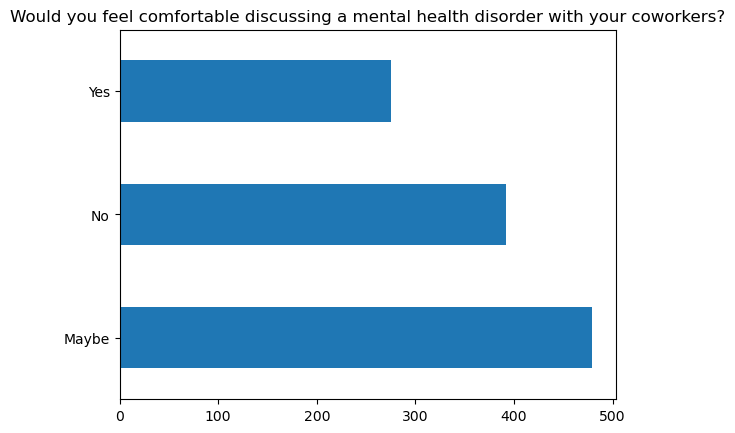

value counts of mh_disclosure_supervisor_comfortable :


count   percent
Yes      428  0.373473
Maybe    382  0.333333
No       336  0.293194

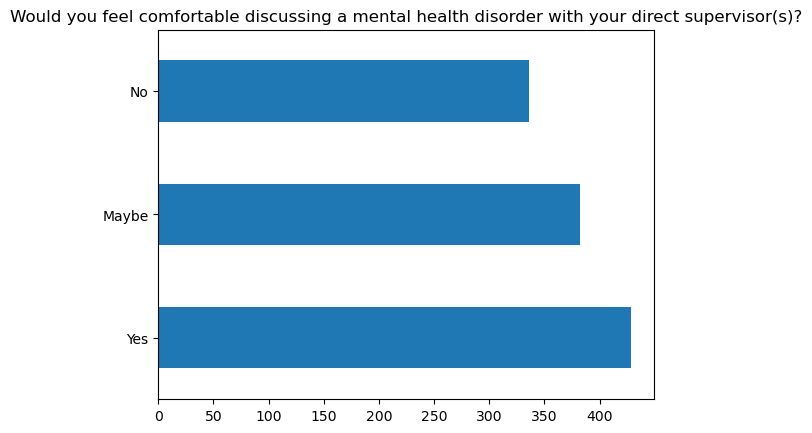

value counts of seriousness_mh_physical_employer :


count   percent
I don't know    493  0.430192
Yes             350  0.305410
No              303  0.264398

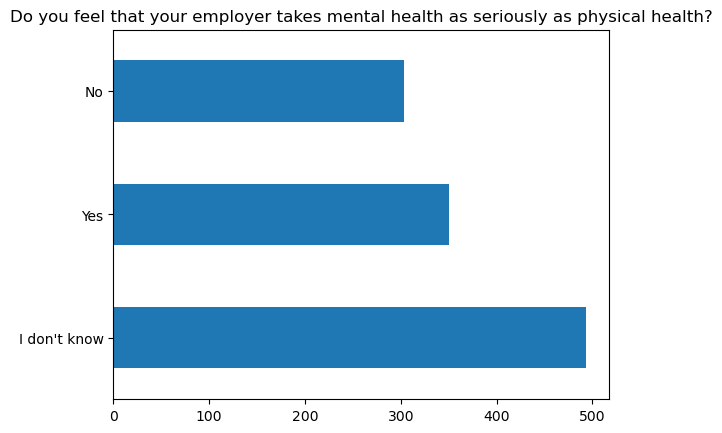

value counts of neg_conseq_coworker_mh_disclosure_employer :


count   percent
No    1048  0.914485
Yes     98  0.085515

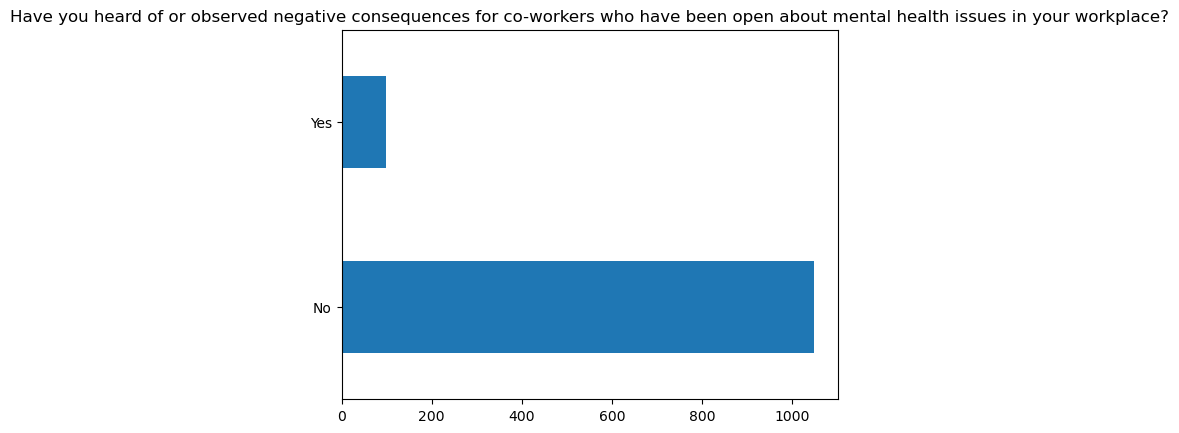

value counts of mh_treatment_coverage :


count  percent
NaN   1146      1.0

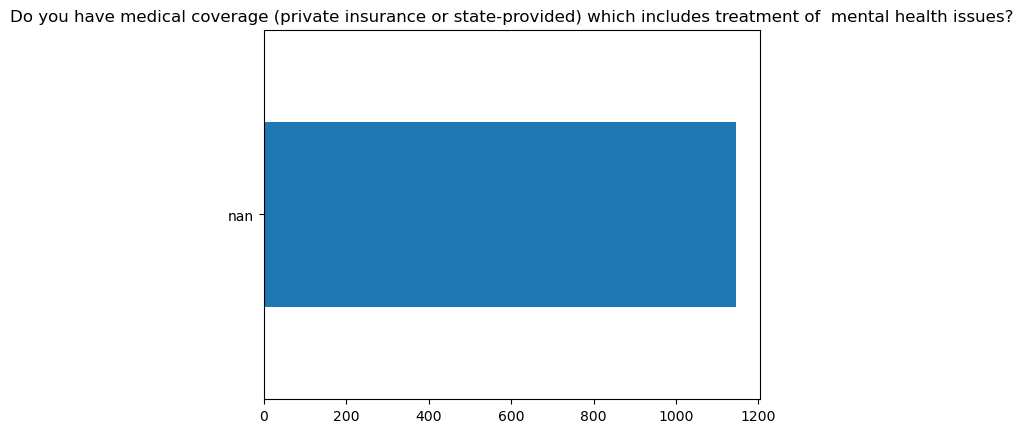

value counts of local_resources_mh_known :


count  percent
NaN   1146      1.0

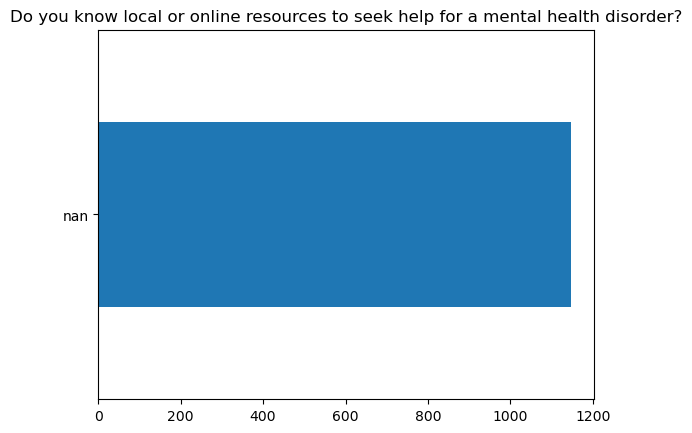

value counts of mh_disclosure_clients :


count  percent
NaN   1146      1.0

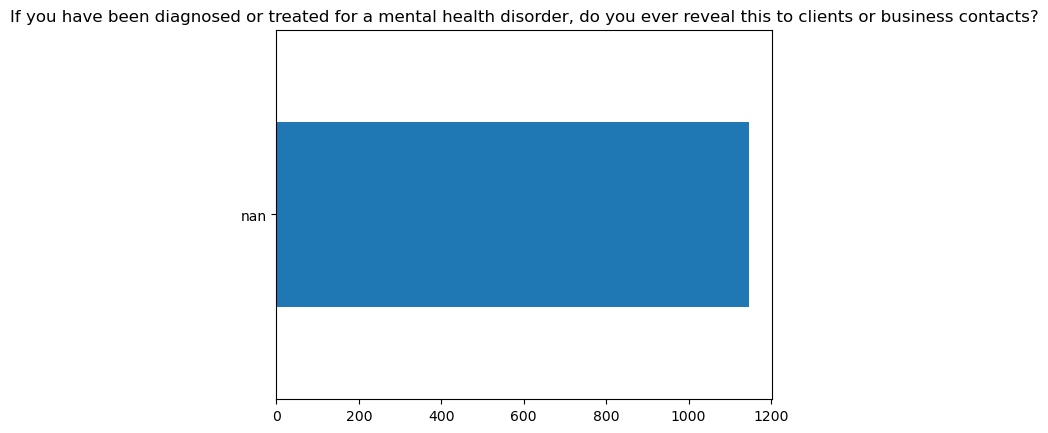

value counts of mh_disclosure_clients_neg_impact :


count  percent
NaN   1146      1.0

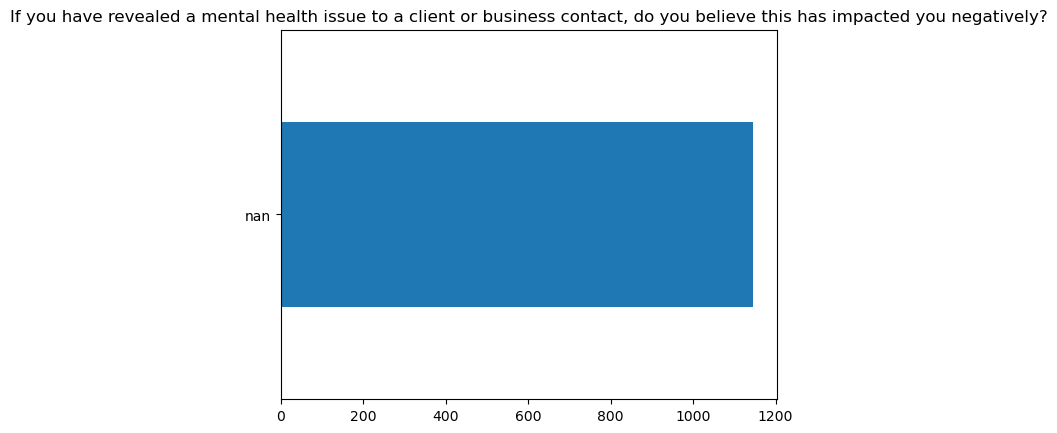

value counts of mh_disclosure_coworker :


count  percent
NaN   1146      1.0

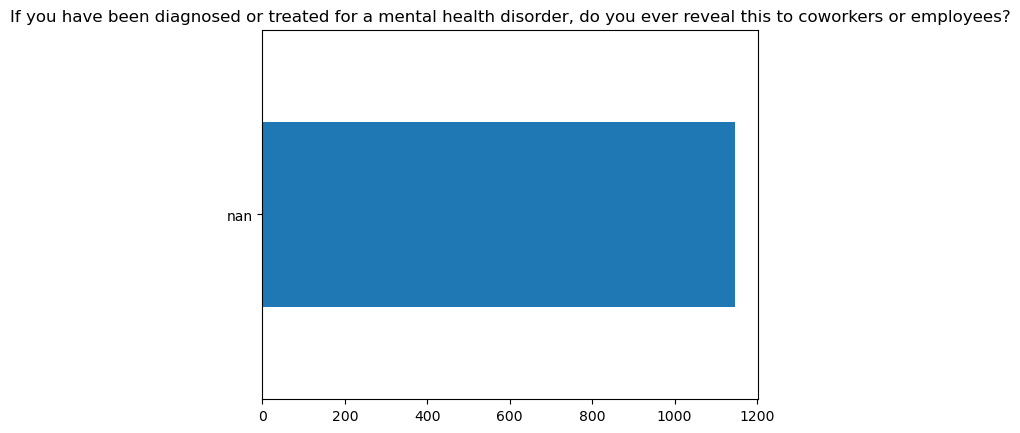

value counts of mh_disclosure_coworker_neg_impact :


count  percent
NaN   1146      1.0

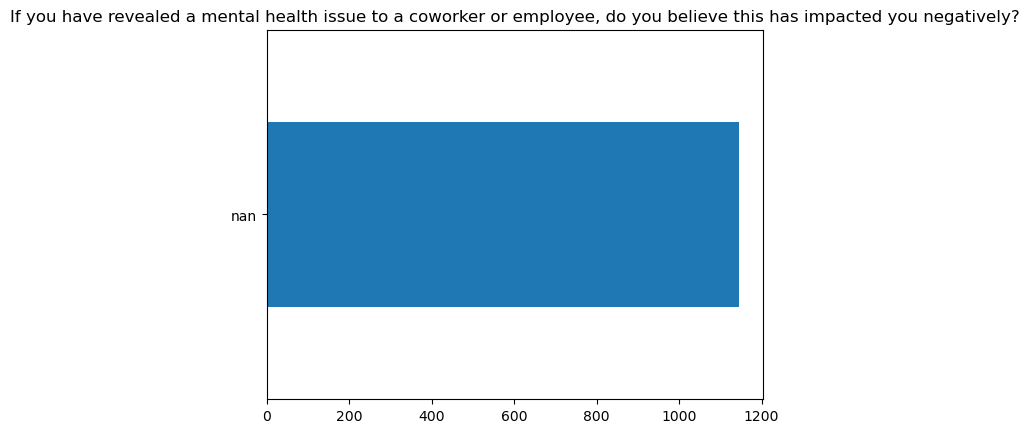

value counts of mh_effect_on_productivity :


count  percent
NaN   1146      1.0

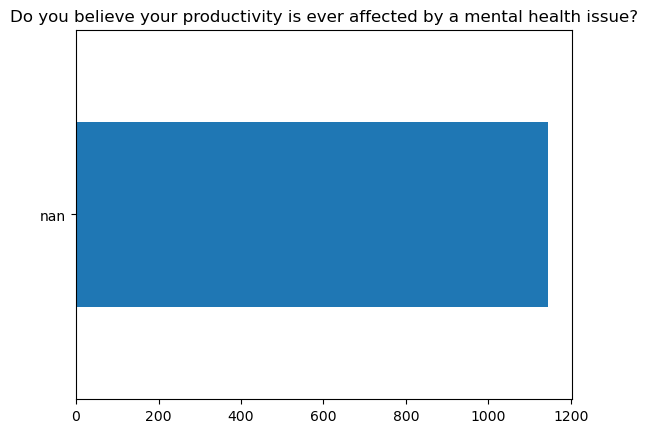

value counts of mh_effect_on_productivity_percent :


count  percent
NaN   1146      1.0

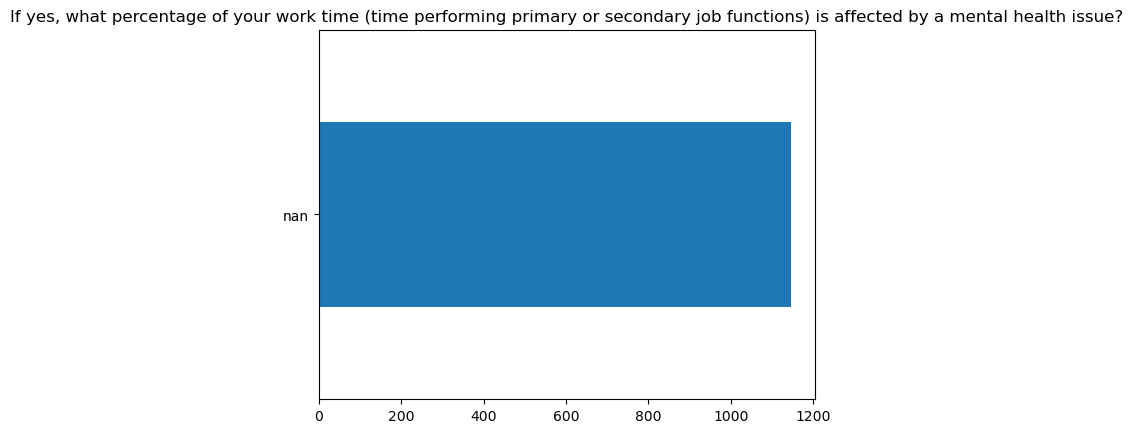

value counts of prev_employers :


count   percent
1   1015  0.885689
0    131  0.114311

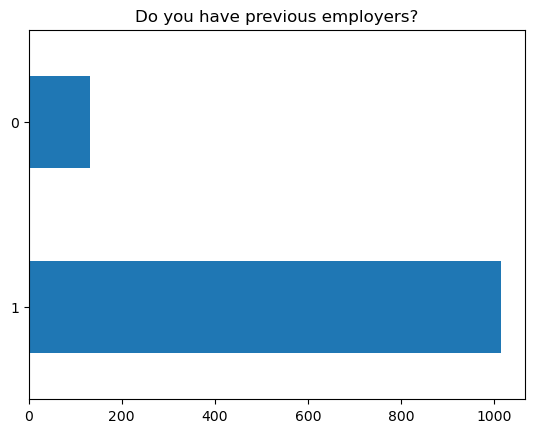

value counts of prev_employers_mh_benefits :


count   percent
Some did             326  0.284468
No, none did         280  0.244328
I don't know         258  0.225131
Yes, they all did    151  0.131763
NaN                  131  0.114311

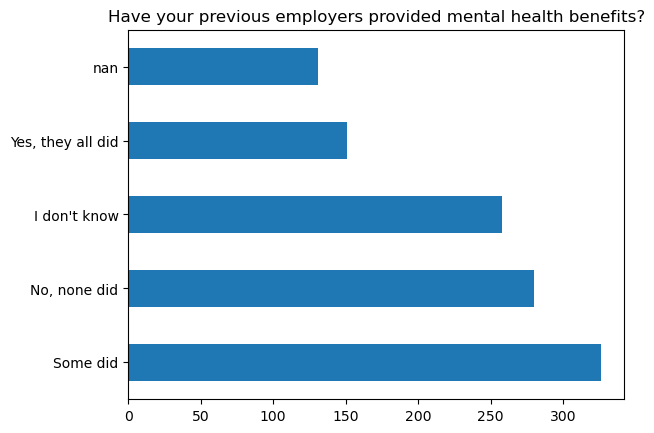

value counts of prev_employers_mh_options_known :


count   percent
N/A (not currently aware)          459  0.400524
I was aware of some                322  0.280977
Yes, I was aware of all of them    140  0.122164
NaN                                131  0.114311
No, I only became aware later       94  0.082024

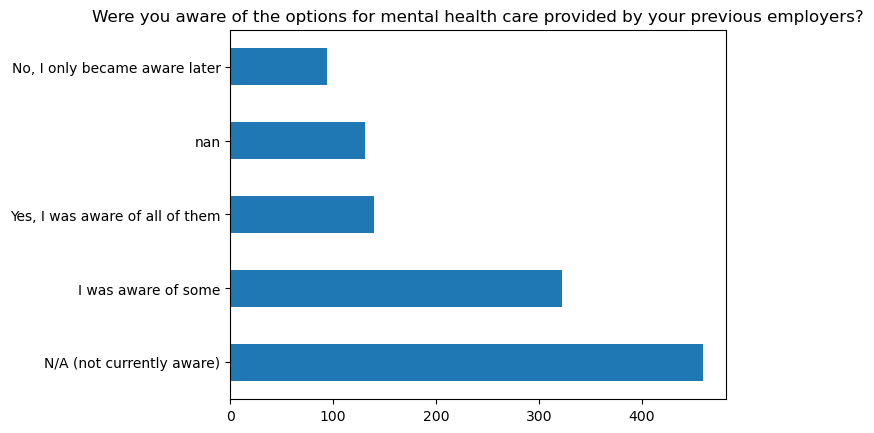

value counts of prev_employers_mh_formally_discussed :


count   percent
None did             684  0.596859
Some did             229  0.199825
NaN                  131  0.114311
I don't know          73  0.063700
Yes, they all did     29  0.025305

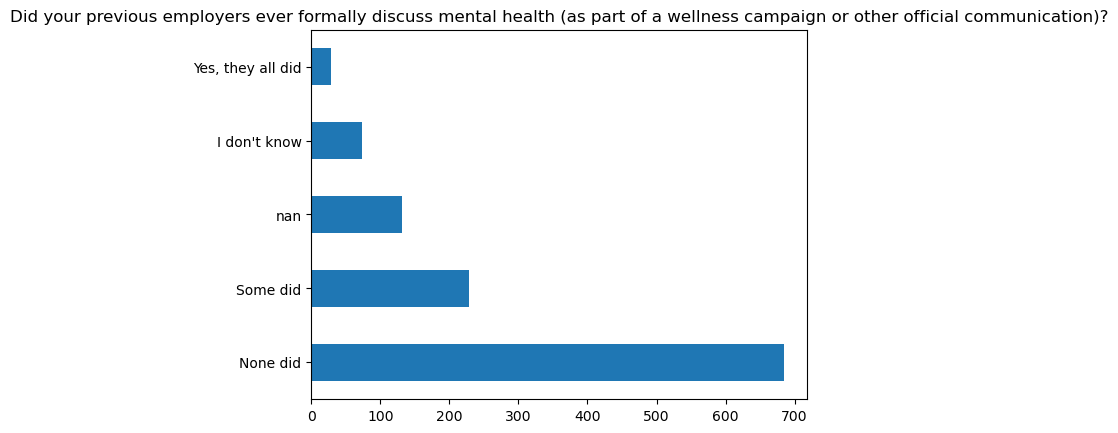

value counts of prev_employers_mh_ressources_offered :


count   percent
None did             645  0.562827
Some did             322  0.280977
NaN                  131  0.114311
Yes, they all did     48  0.041885

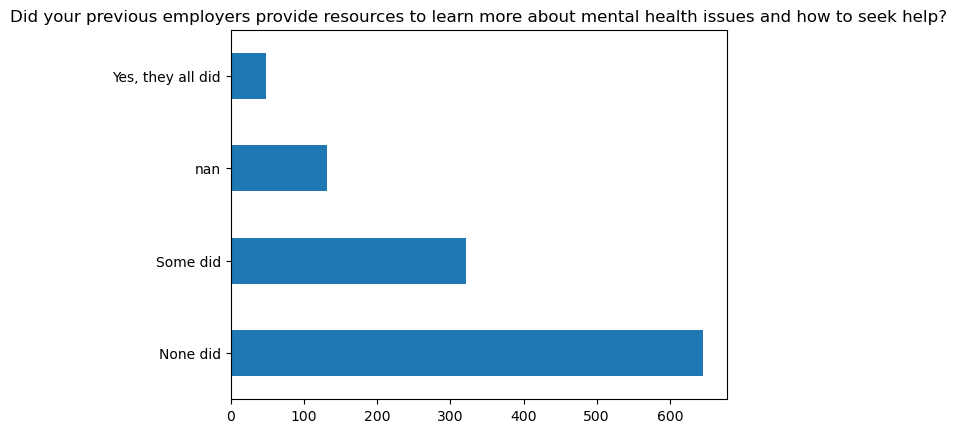

value counts of prev_employer_anonymity_mh_benefits :


count   percent
I don't know    672  0.586387
Yes, always     135  0.117801
NaN             131  0.114311
Sometimes       107  0.093368
No              101  0.088133

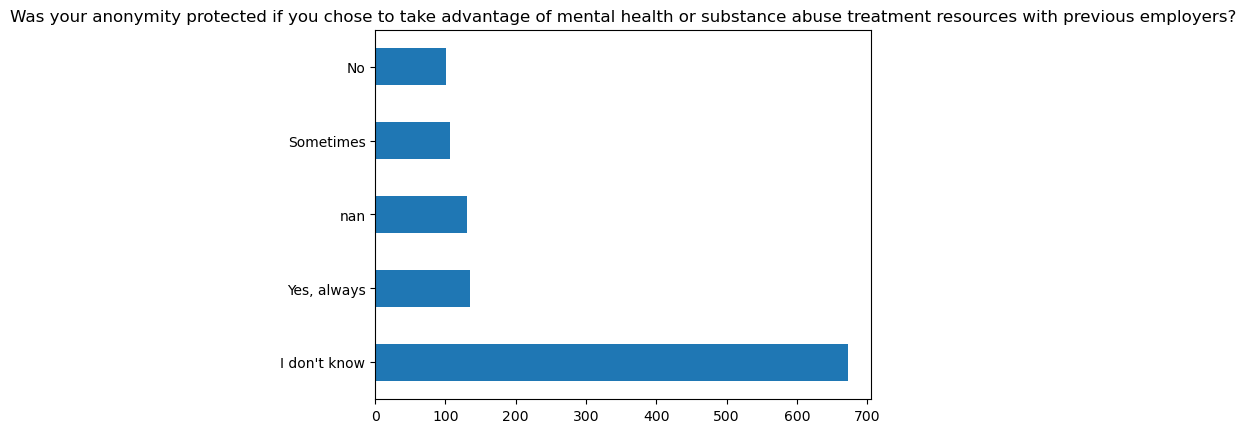

value counts of prev_employers_neg_conseq_mh_disclosure_expected :


count   percent
Some of them        501  0.437173
I don't know        245  0.213787
Yes, all of them    172  0.150087
NaN                 131  0.114311
None of them         97  0.084642

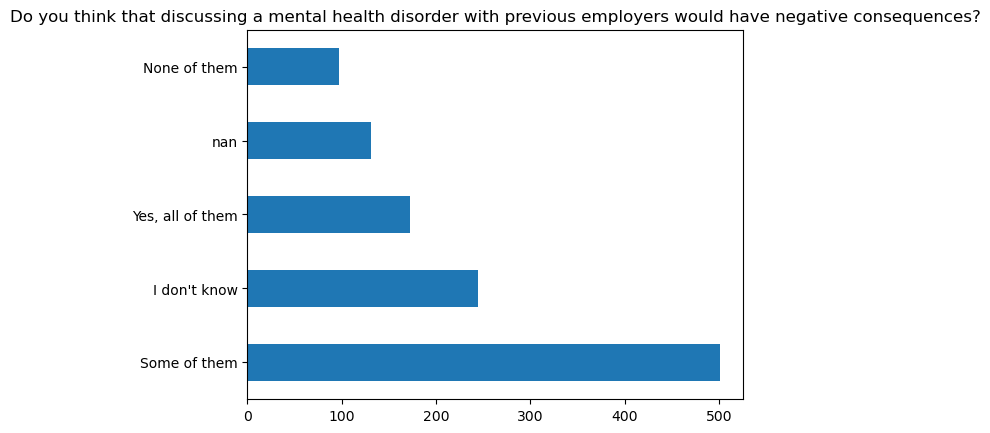

value counts of prev_employers_neg_conseq_physical_disclosure_expected :


count   percent
Some of them        499  0.435428
None of them        453  0.395288
NaN                 131  0.114311
Yes, all of them     63  0.054974

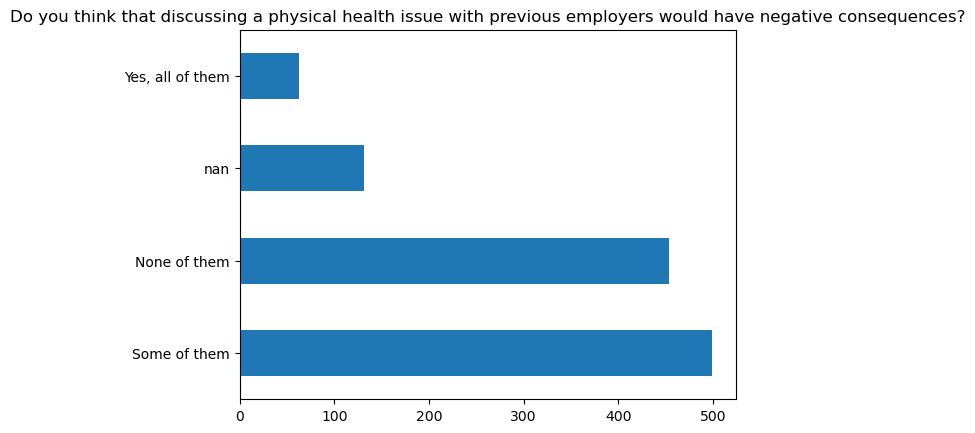

value counts of mh_disclosure_prev_coworkers_comfortable :


count   percent
Some of my previous employers           581  0.506981
No, at none of my previous employers    360  0.314136
NaN                                     131  0.114311
Yes, at all of my previous employers     74  0.064572

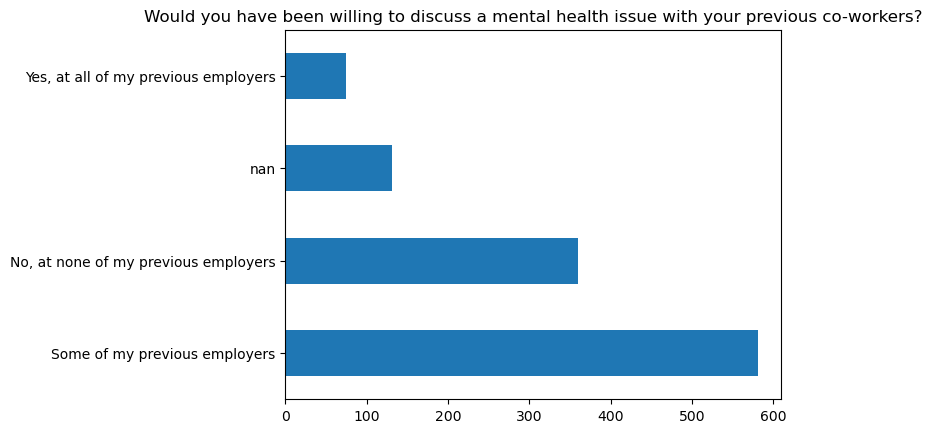

value counts of mh_disclosure_prev_supervisor_comfortable :


count   percent
Some of my previous employers           516  0.450262
No, at none of my previous employers    344  0.300175
NaN                                     131  0.114311
Yes, at all of my previous employers     78  0.068063
I don't know                             77  0.067190

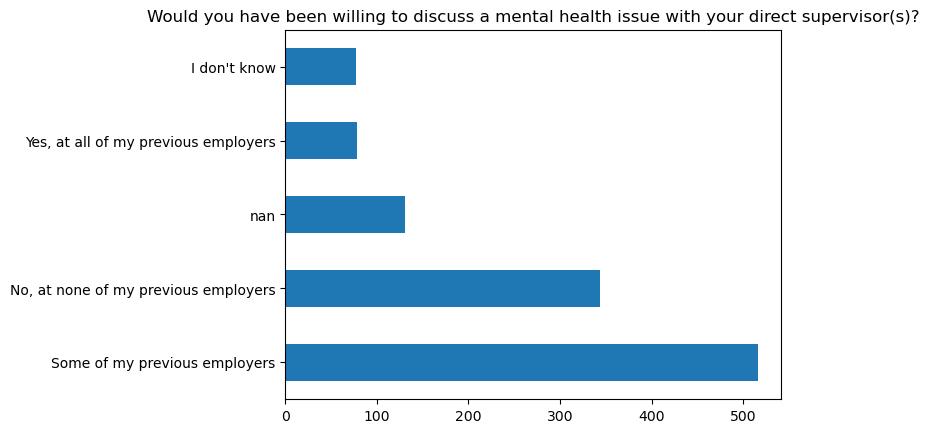

value counts of seriousness_mh_physical_prev_employers :


count   percent
None did             364  0.317627
Some did             353  0.308028
I don't know         260  0.226876
NaN                  131  0.114311
Yes, they all did     38  0.033159

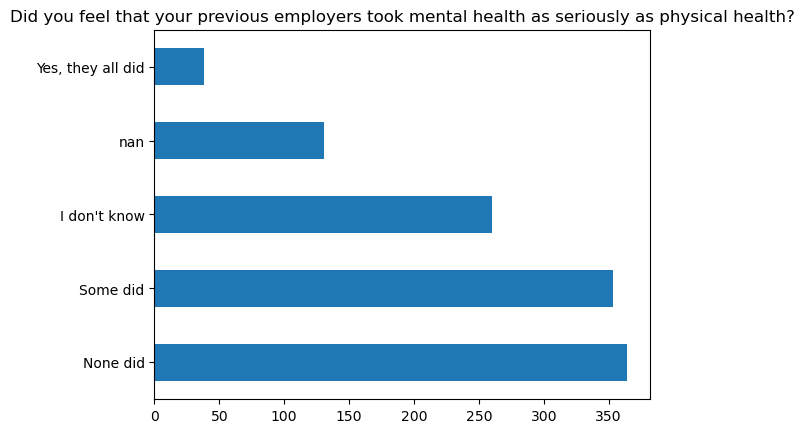

value counts of neg_conseq_coworker_mh_disclosure_prev_employers :


count   percent
None of them        632  0.551483
Some of them        337  0.294066
NaN                 131  0.114311
Yes, all of them     46  0.040140

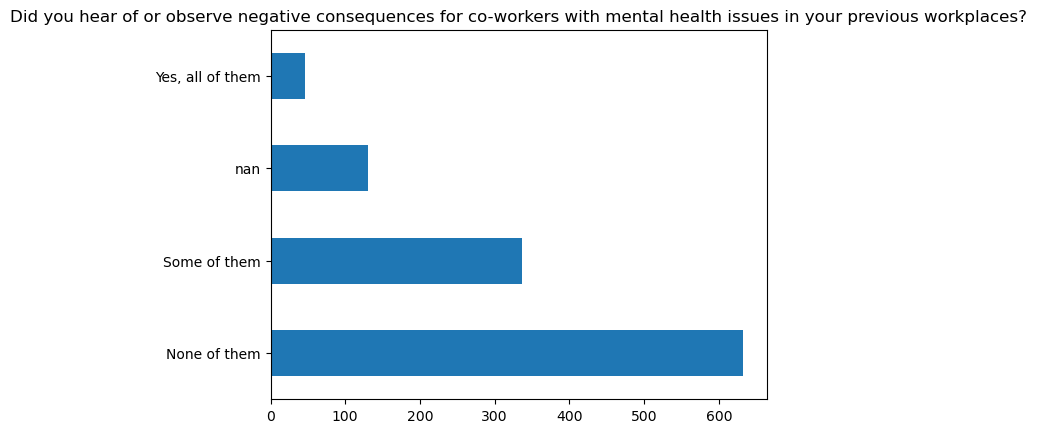

value counts of willingness_physical_disclosure_interview :


count   percent
Maybe    483  0.421466
No       371  0.323735
Yes      292  0.254799

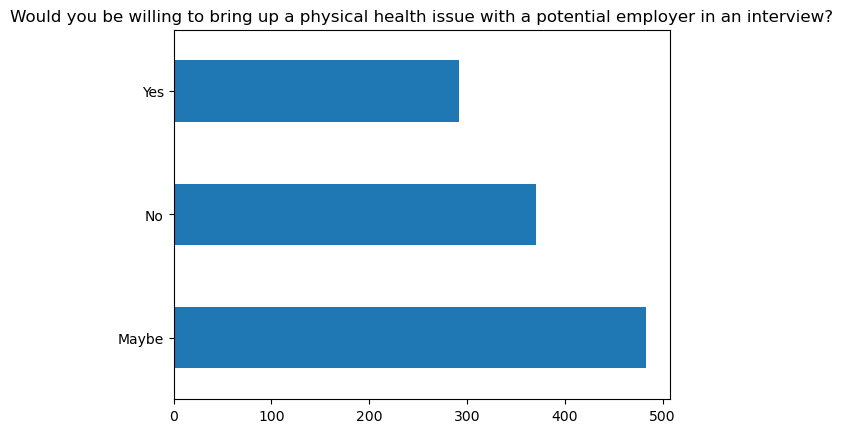

value counts of willingness_mh_disclosure_interview :


count   percent
No       721  0.629145
Maybe    333  0.290576
Yes       92  0.080279

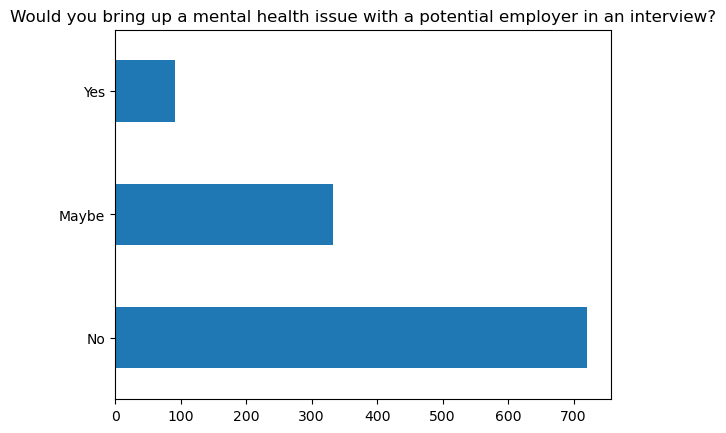

value counts of mh_disclosure_expected_neg_effect_career :


count   percent
Maybe                         472  0.411867
Yes, I think it would         447  0.390052
No, I don't think it would    121  0.105585
Yes, it has                    81  0.070681
No, it has not                 25  0.021815

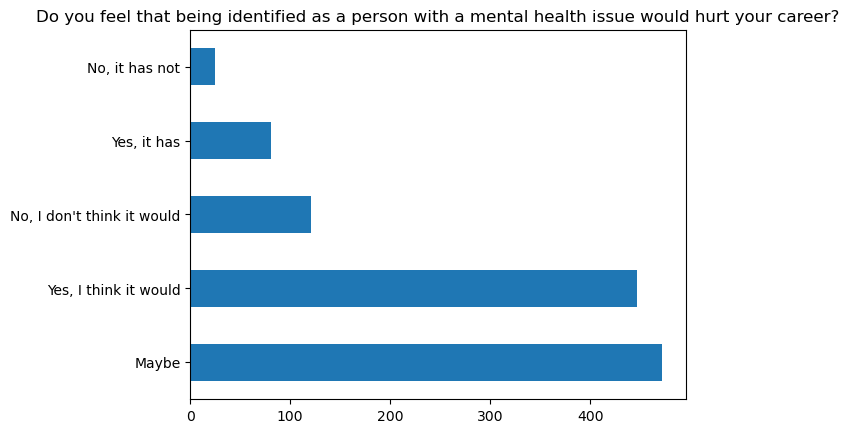

value counts of mh_disclosure_expected_neg_view_coworkers :


count   percent
Maybe                           461  0.402269
Yes, I think they would         308  0.268761
No, I don't think they would    303  0.264398
No, they do not                  44  0.038394
Yes, they do                     30  0.026178

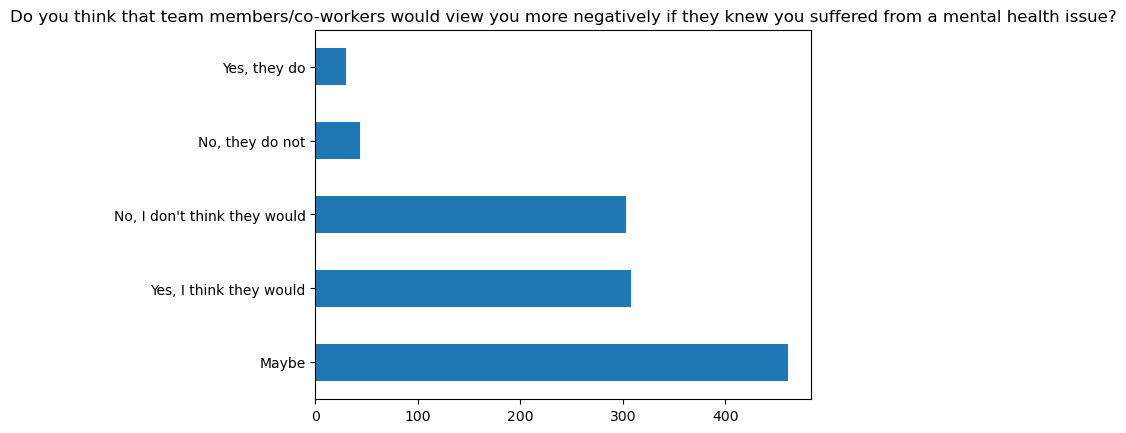

value counts of willingness_mh_disclosure_family :


count   percent
Somewhat open                                         514  0.448517
Very open                                             198  0.172775
Somewhat not open                                     177  0.154450
Neutral                                               111  0.096859
Not applicable to me (I do not have a mental il...     82  0.071553
Not open at all                                        64  0.055846

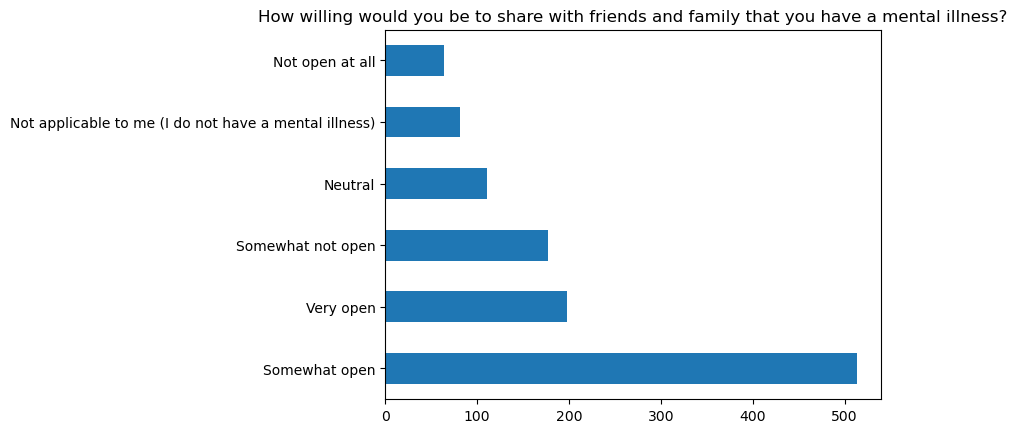

value counts of mh_neg_effect_workplace_observed :


count   percent
No                    491  0.428447
Maybe/Not sure        278  0.242583
Yes, I observed       193  0.168412
Yes, I experienced    132  0.115183
NaN                    52  0.045375

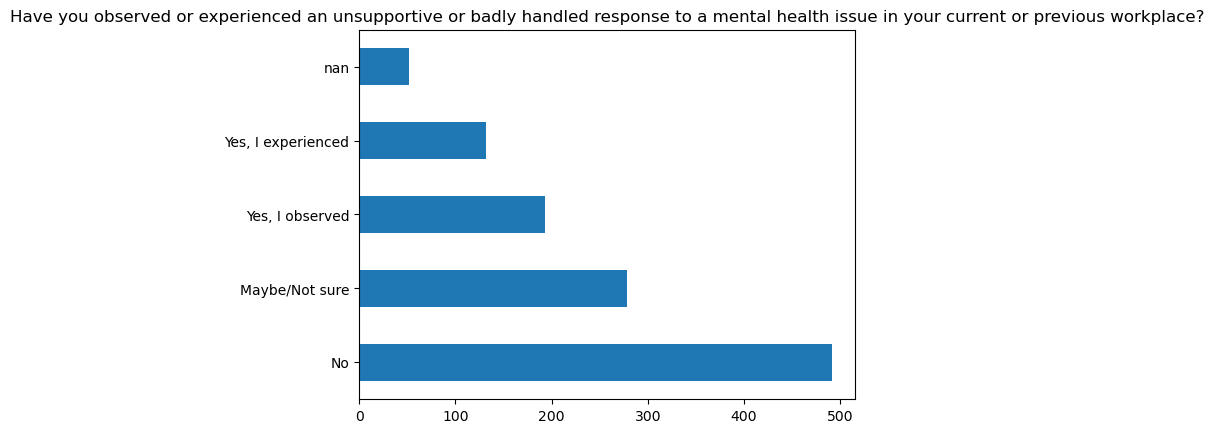

value counts of effect_neg_conseq_mh_disclosure :


count   percent
NaN      635  0.554101
No       198  0.172775
Yes      181  0.157941
Maybe    132  0.115183

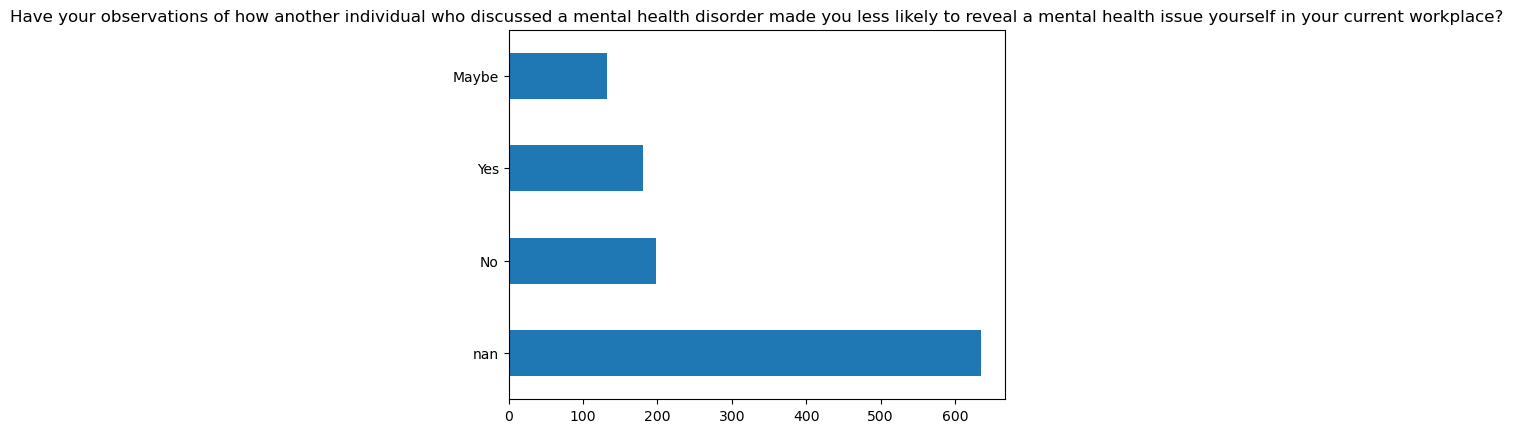

value counts of family_history_mental_illness :


count   percent
Yes             541  0.472077
No              391  0.341187
I don't know    214  0.186736

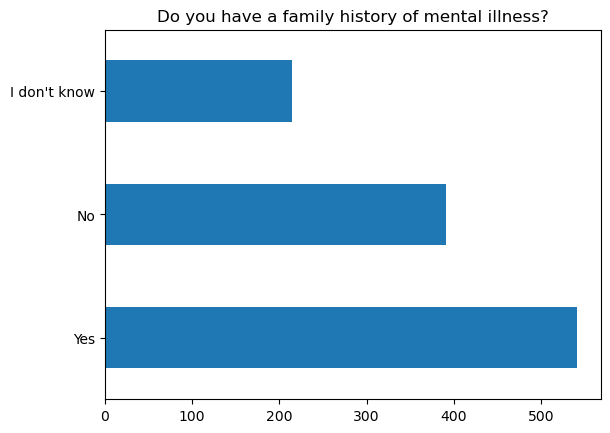

value counts of self_mental_illness_past :


count   percent
Yes      583  0.508726
No       379  0.330716
Maybe    184  0.160558

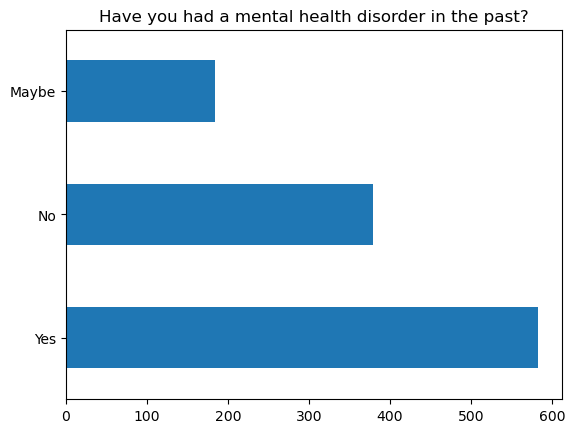

value counts of self_mental_illness_present :


count   percent
Yes      451  0.393543
No       441  0.384817
Maybe    254  0.221640

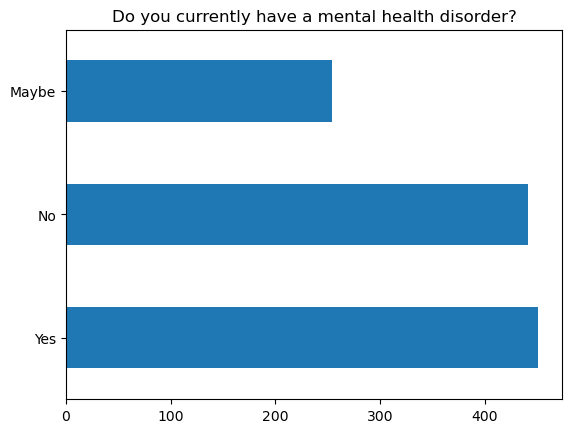

value counts of diagnosed_by_professional :


count   percent
No     579  0.505236
Yes    567  0.494764

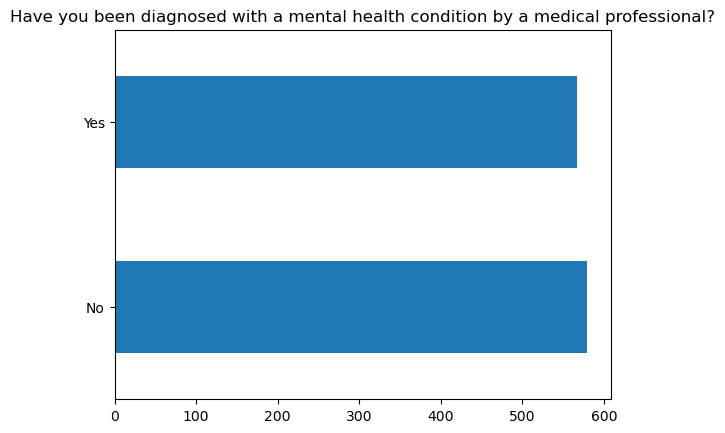

value counts of mental_illness_treated :


count   percent
1    657  0.573298
0    489  0.426702

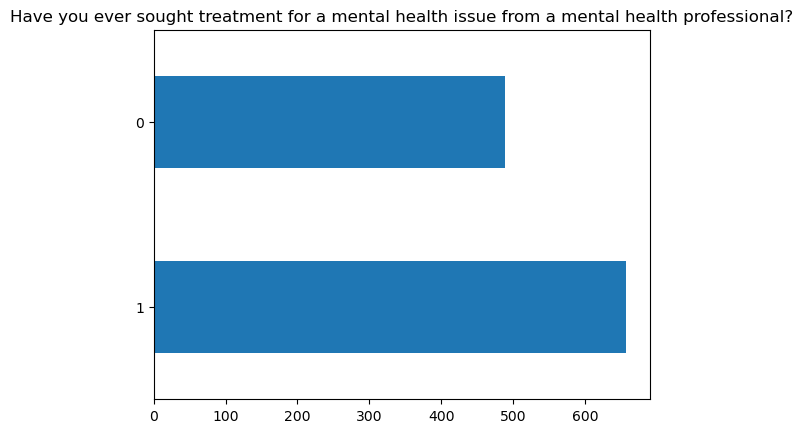

value counts of neg_effect_work_treated :


count   percent
Not applicable to me    455  0.397033
Sometimes               283  0.246946
Rarely                  259  0.226003
Never                   104  0.090750
Often                    45  0.039267

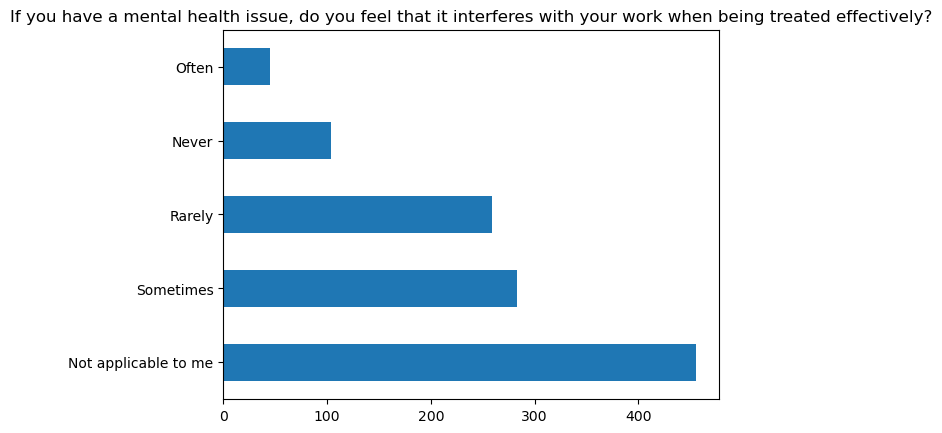

value counts of neg_effect_work_not_treated :


count   percent
Often                   422  0.368237
Not applicable to me    384  0.335079
Sometimes               287  0.250436
Rarely                   43  0.037522
Never                    10  0.008726

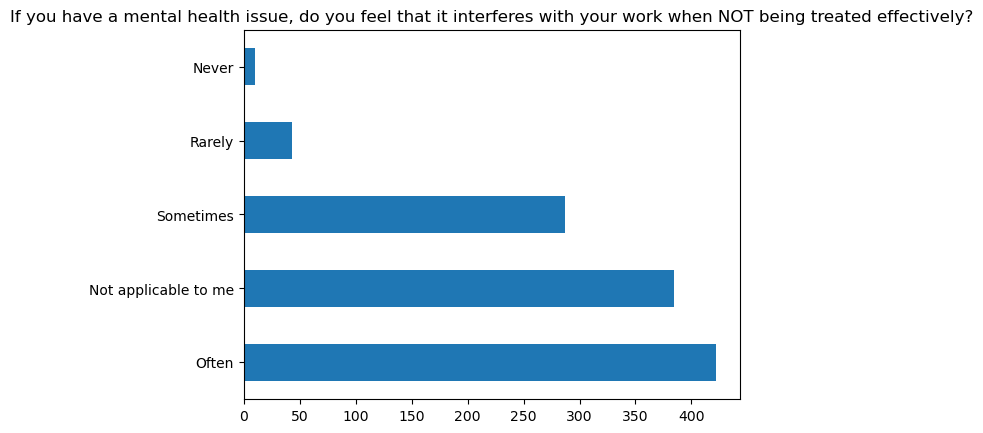

value counts of work_remotely :


count   percent
Sometimes    611  0.533159
Never        318  0.277487
Always       217  0.189354

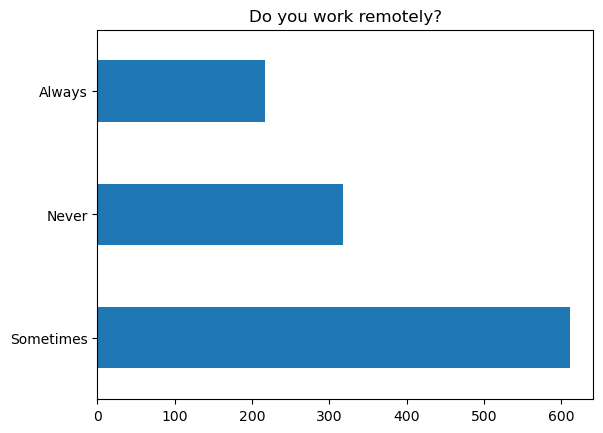

In [13]:
# explore the variables once again visually based on the new dataset with the reduced sample size
explore_few_uniques_features(df_emp)

Observations
* excluding self-employed participants resulted in many variables without non-null data (these are excluded later as part of the treatment of missing values) and led to most variables on current employers no longer having missing values
* 883 respondents answered that their employer was primarily a tech company/organization
* 883 responses were missing when asked if the primary role within the company was related to tech/IT. Therefore, it is likely that only individuals who responded that their employer was not primarily a tech company/organization saw this question
* 15 respondents indicated that their primary role within the company is not related to tech/IT

In [14]:
# check wether these 15 respondents indicated that their employer is primarily a tech company/organization
df_emp.loc[df_emp['tech_role'] == 0]['tech_employer'].value_counts(dropna=False, normalize=False)

0.0    15
Name: tech_employer, dtype: int64

Observations
* 15 individuals indicated that their primary role within the company is not related to tech/IT and that their employer is not primarily a tech company/organization

In [15]:
# exclude the 15 respondents who neither work in a tech company/organization nor have a primary role within their company related to tech/IT, since they do not belong to the target group 
df_tech = df_emp.loc[df_emp['tech_role'] != 0].copy()
print('shape before exclusion:', df_emp.shape)
print('shape after exclusion:', df_tech.shape)

shape before exclusion: (1146, 63)
shape after exclusion: (1131, 63)


value counts of self_employed :


count  percent
0   1131      1.0

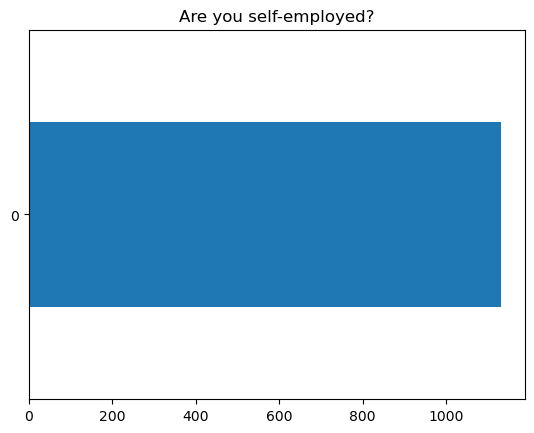

value counts of N_employees :


count   percent
26-100            291  0.257294
More than 1000    251  0.221927
100-500           245  0.216622
6-25              206  0.182140
500-1000           79  0.069850
1-5                59  0.052166

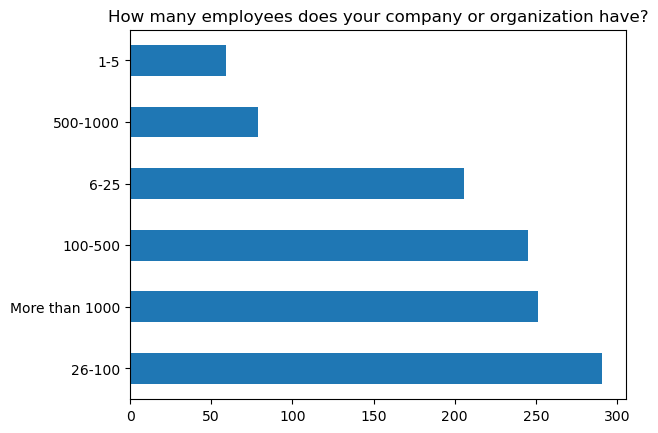

value counts of tech_employer :


count   percent
1.0    883  0.780725
0.0    248  0.219275

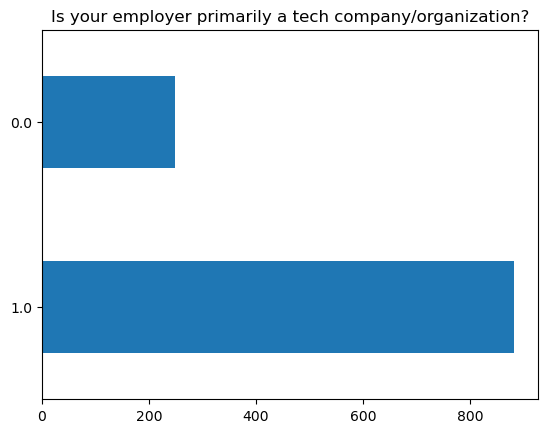

value counts of tech_role :


count   percent
NaN    883  0.780725
1.0    248  0.219275

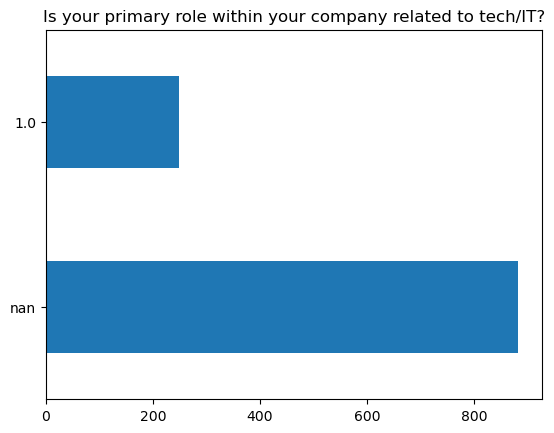

value counts of employer_mh_benefits :


count   percent
Yes                                524  0.463307
I don't know                       316  0.279399
No                                 210  0.185676
Not eligible for coverage / N/A     81  0.071618

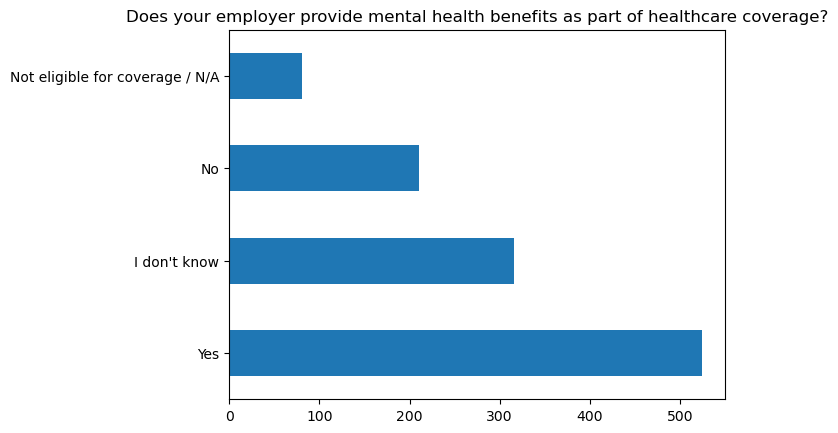

value counts of employer_mh_options_known :


count   percent
I am not sure    349  0.308576
No               349  0.308576
Yes              300  0.265252
NaN              133  0.117595

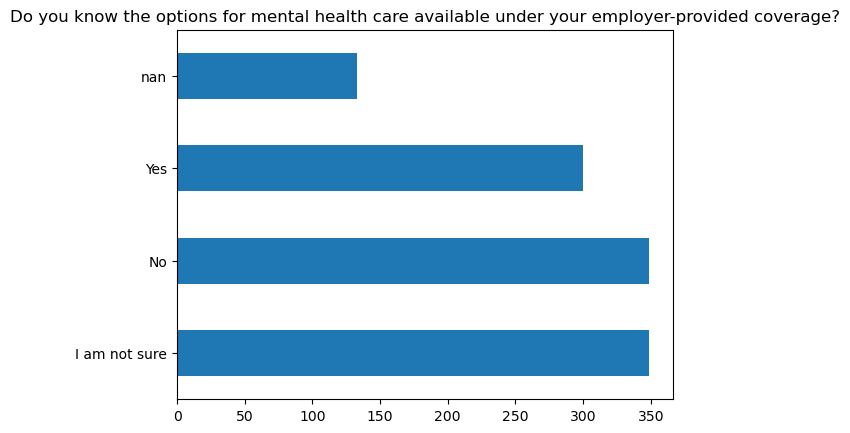

value counts of employer_mh_formally_discussed :


count   percent
No              806  0.712644
Yes             223  0.197171
I don't know    102  0.090186

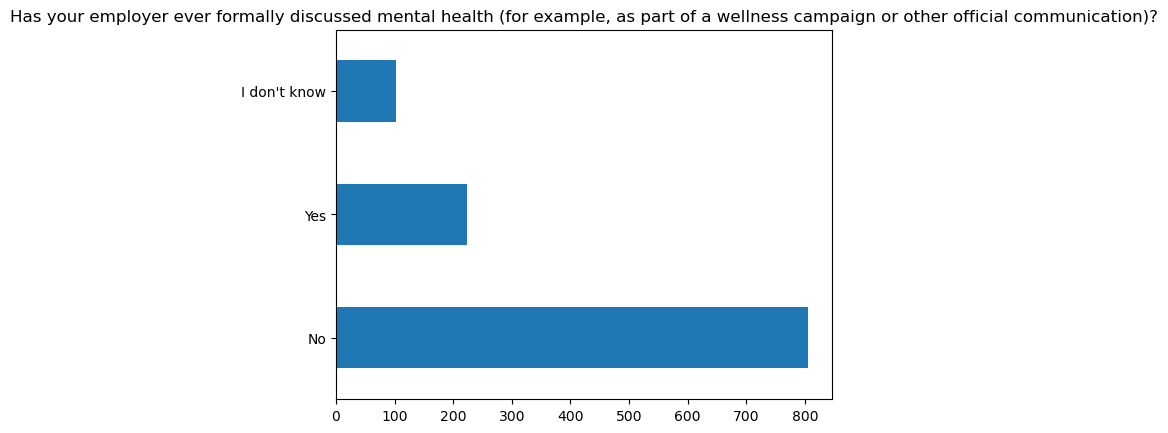

value counts of employer_mh_ressources_offered :


count   percent
No              523  0.462423
I don't know    318  0.281167
Yes             290  0.256410

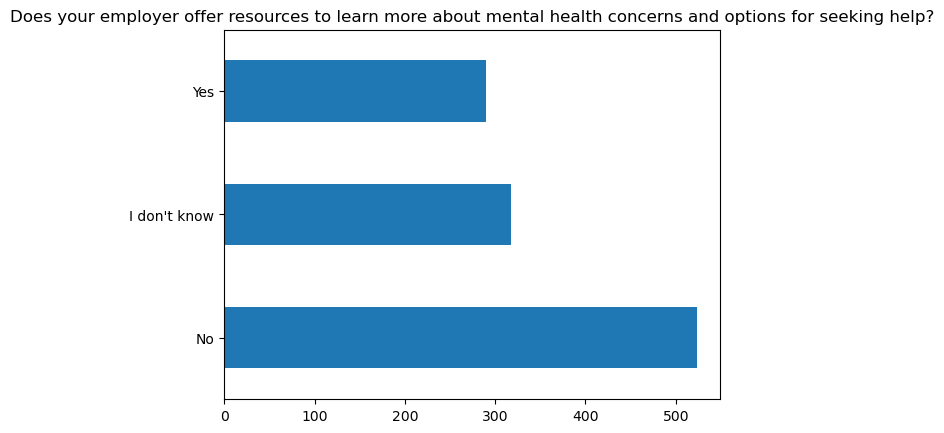

value counts of employer_anonymity_mh_benefits :


count   percent
I don't know    736  0.650752
Yes             312  0.275862
No               83  0.073386

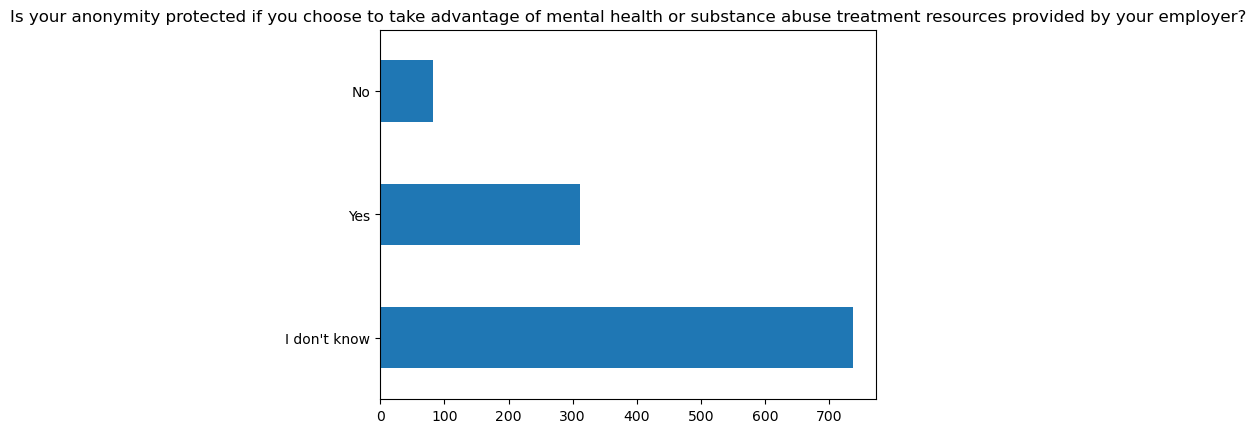

value counts of difficulty_asking_for_leave :


count   percent
Somewhat easy                 279  0.246684
Very easy                     219  0.193634
Somewhat difficult            192  0.169761
Neither easy nor difficult    176  0.155615
I don't know                  149  0.131742
Very difficult                116  0.102564

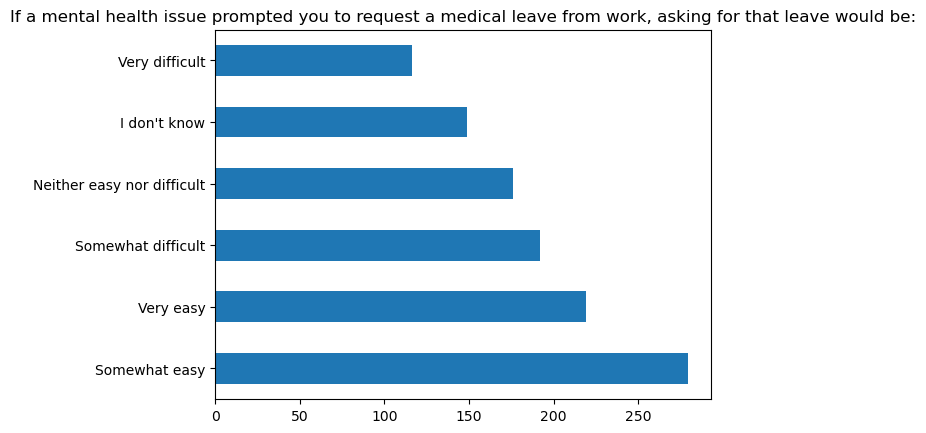

value counts of employer_neg_conseq_mh_disclosure_expected :


count   percent
Maybe    482  0.426172
No       436  0.385500
Yes      213  0.188329

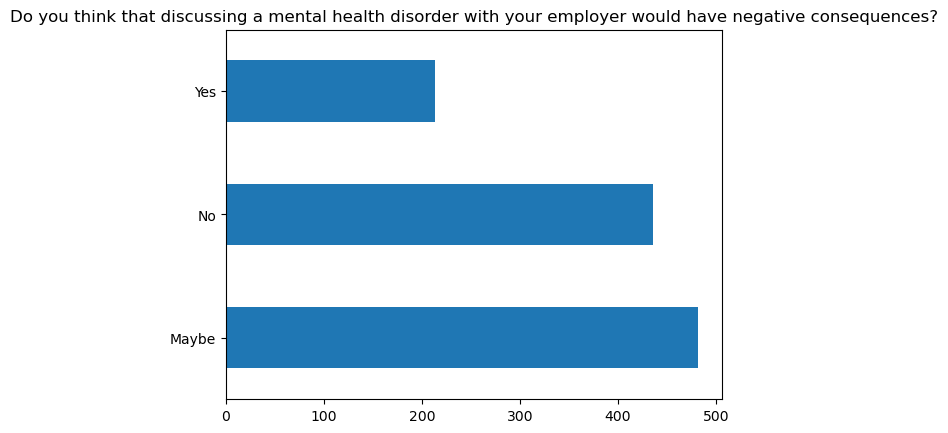

value counts of employer_neg_conseq_physical_disclosure_expected :


count   percent
No       831  0.734748
Maybe    260  0.229885
Yes       40  0.035367

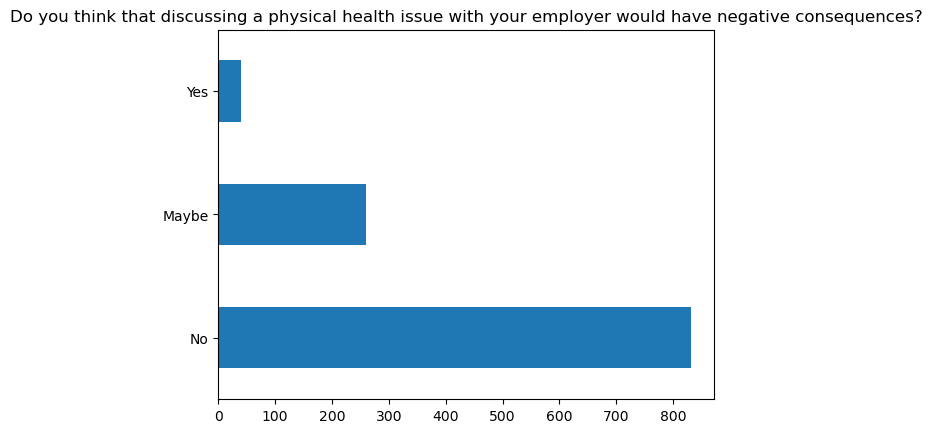

value counts of mh_disclosure_coworker_comfortable :


count   percent
Maybe    474  0.419098
No       386  0.341291
Yes      271  0.239611

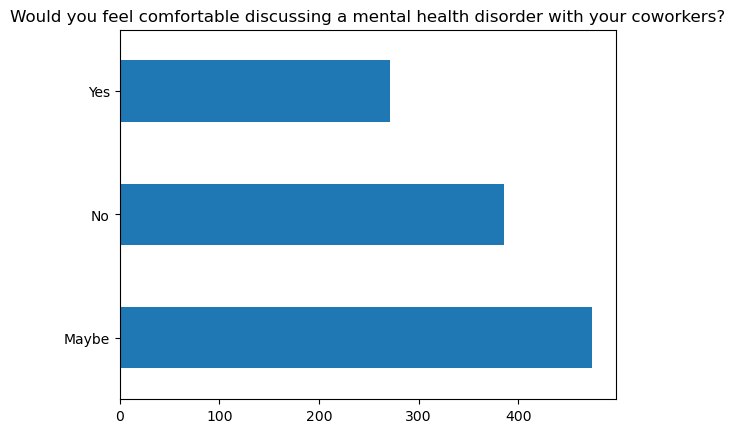

value counts of mh_disclosure_supervisor_comfortable :


count   percent
Yes      424  0.374889
Maybe    378  0.334218
No       329  0.290893

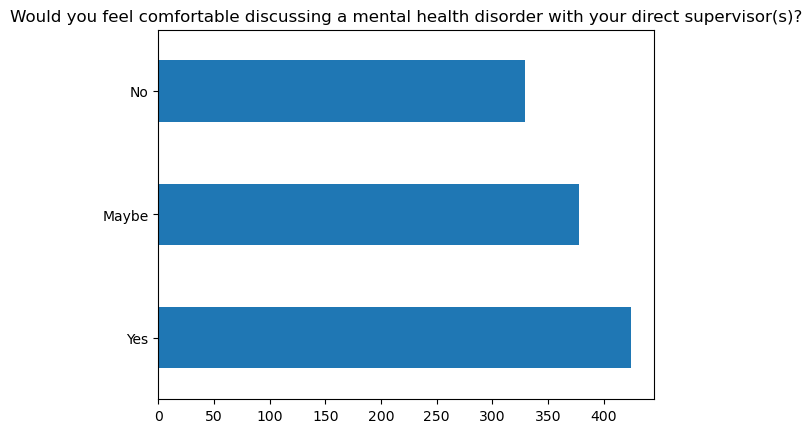

value counts of seriousness_mh_physical_employer :


count   percent
I don't know    487  0.430592
Yes             346  0.305924
No              298  0.263484

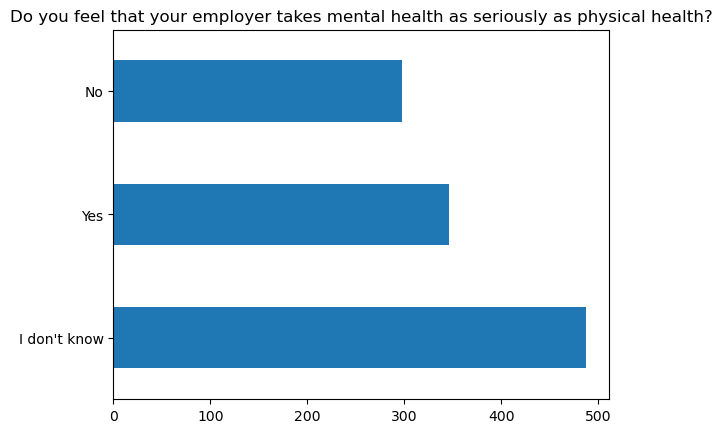

value counts of neg_conseq_coworker_mh_disclosure_employer :


count   percent
No    1038  0.917772
Yes     93  0.082228

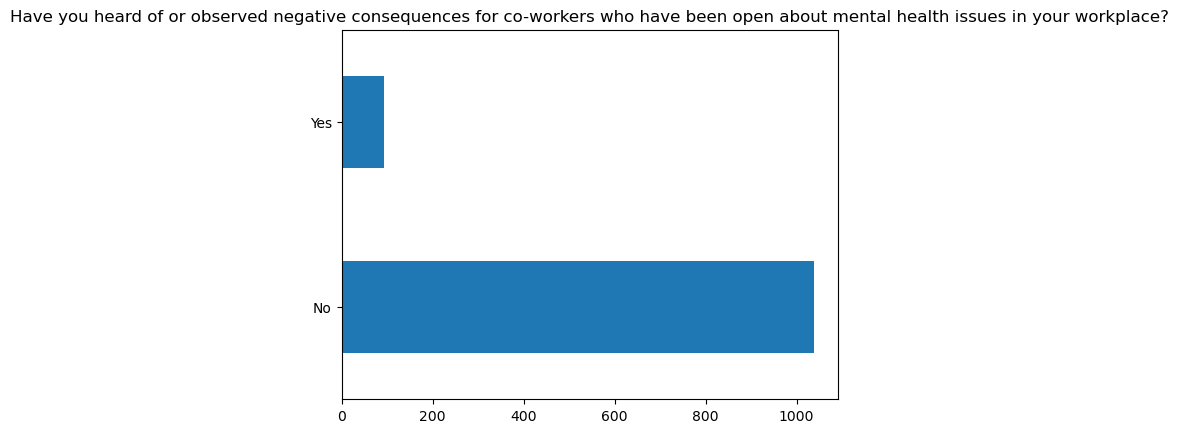

value counts of mh_treatment_coverage :


count  percent
NaN   1131      1.0

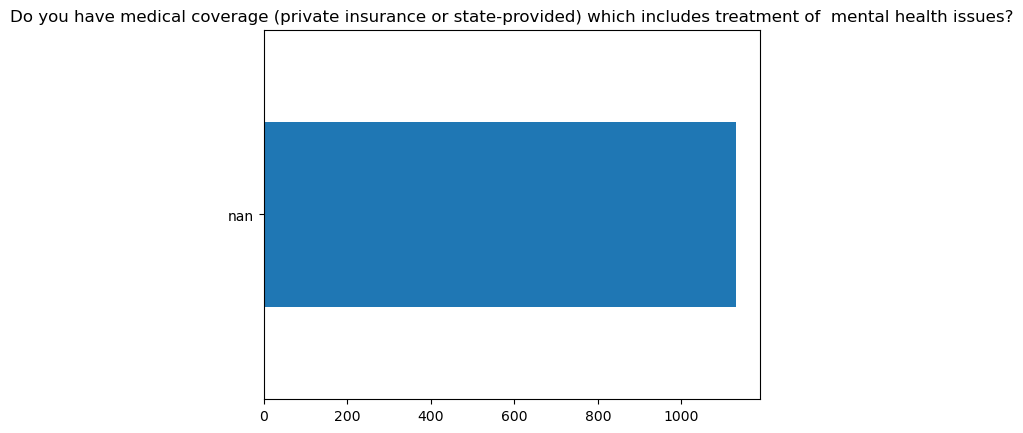

value counts of local_resources_mh_known :


count  percent
NaN   1131      1.0

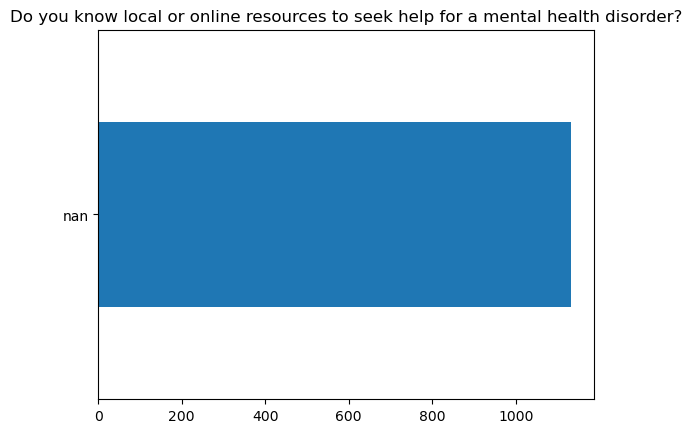

value counts of mh_disclosure_clients :


count  percent
NaN   1131      1.0

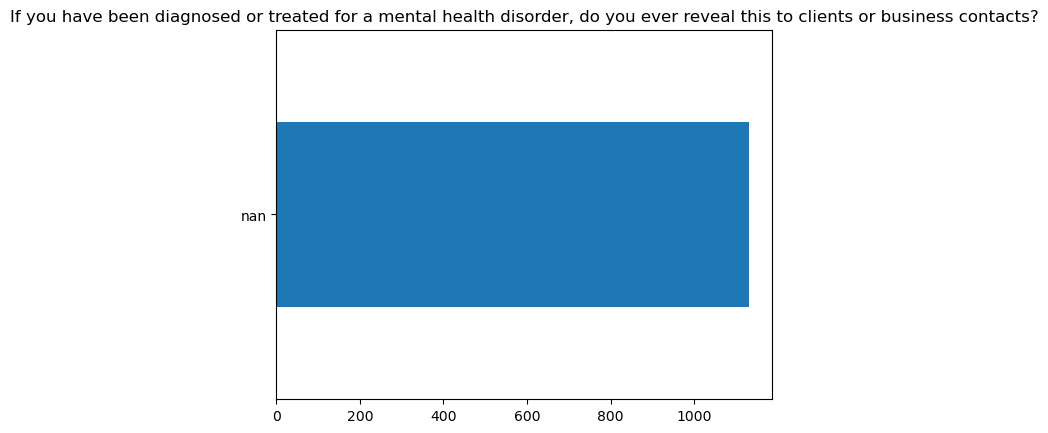

value counts of mh_disclosure_clients_neg_impact :


count  percent
NaN   1131      1.0

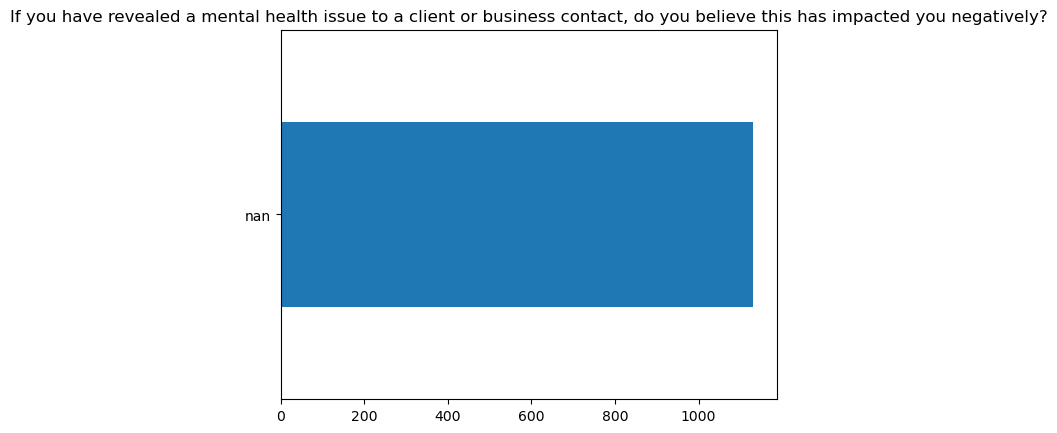

value counts of mh_disclosure_coworker :


count  percent
NaN   1131      1.0

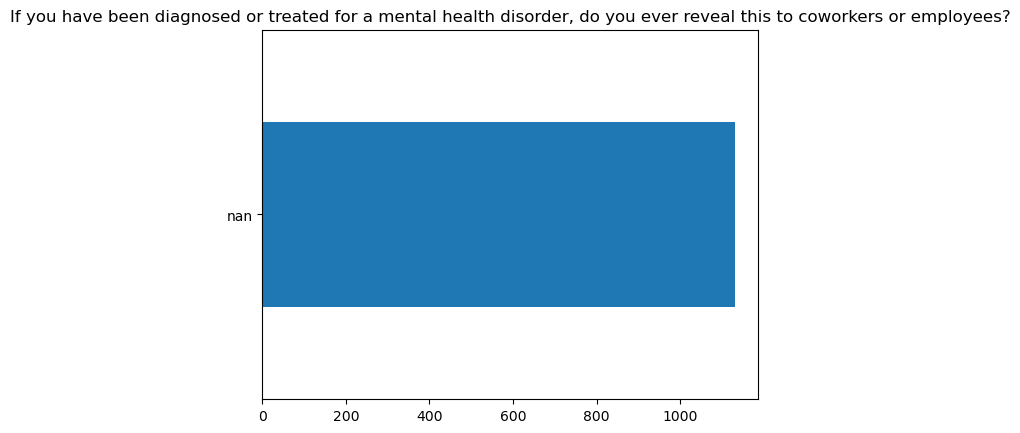

value counts of mh_disclosure_coworker_neg_impact :


count  percent
NaN   1131      1.0

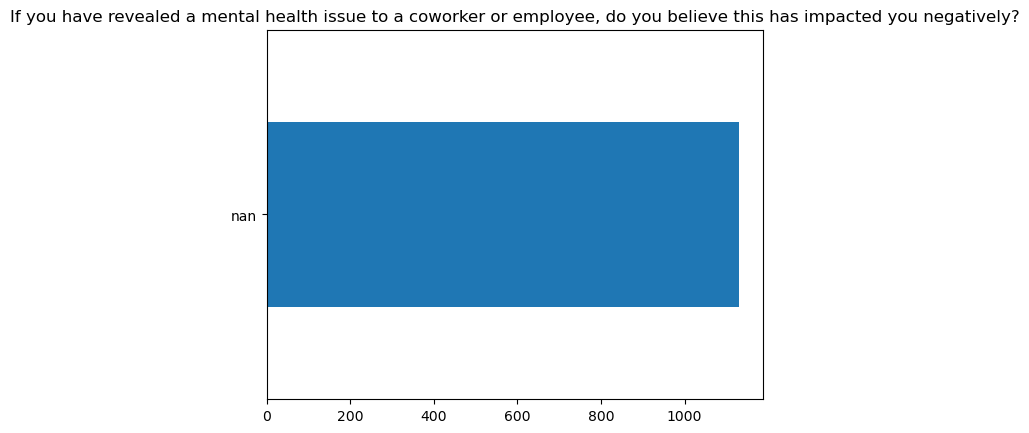

value counts of mh_effect_on_productivity :


count  percent
NaN   1131      1.0

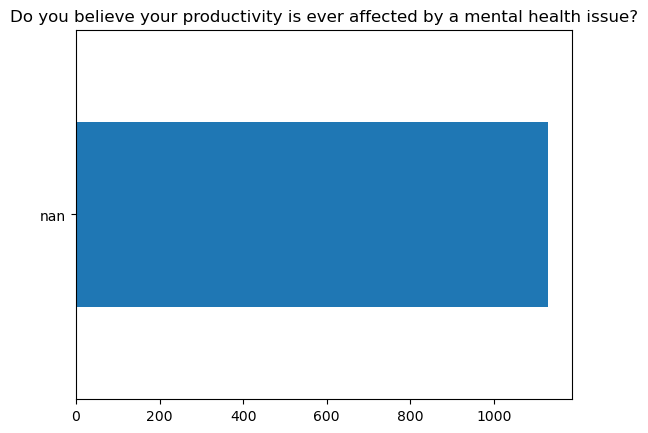

value counts of mh_effect_on_productivity_percent :


count  percent
NaN   1131      1.0

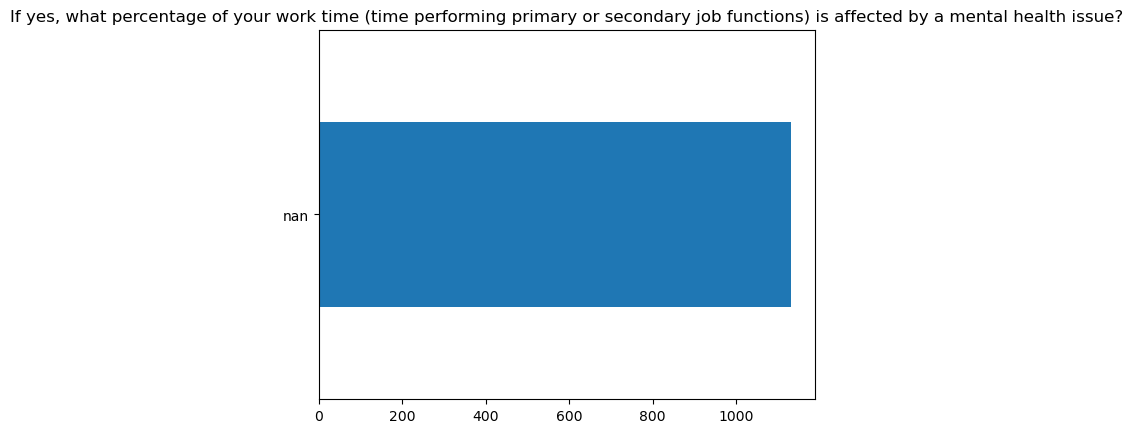

value counts of prev_employers :


count   percent
1   1003  0.886826
0    128  0.113174

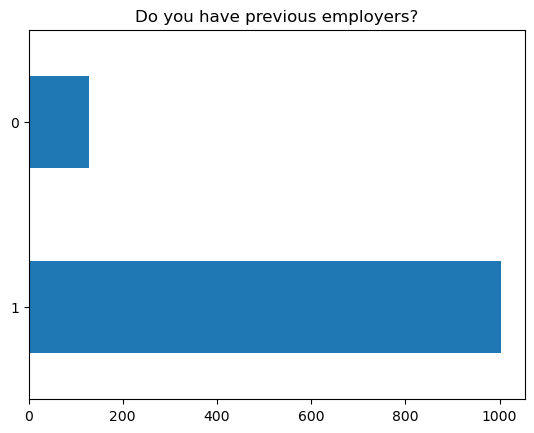

value counts of prev_employers_mh_benefits :


count   percent
Some did             323  0.285588
No, none did         273  0.241379
I don't know         256  0.226348
Yes, they all did    151  0.133510
NaN                  128  0.113174

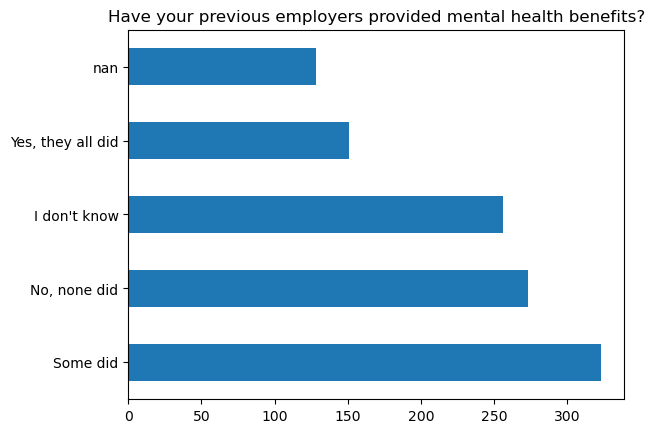

value counts of prev_employers_mh_options_known :


count   percent
N/A (not currently aware)          452  0.399646
I was aware of some                320  0.282935
Yes, I was aware of all of them    139  0.122900
NaN                                128  0.113174
No, I only became aware later       92  0.081344

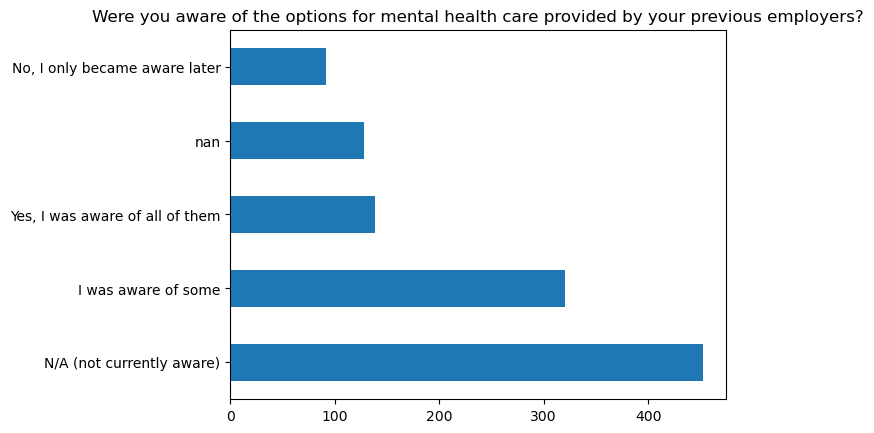

value counts of prev_employers_mh_formally_discussed :


count   percent
None did             673  0.595049
Some did             228  0.201592
NaN                  128  0.113174
I don't know          73  0.064545
Yes, they all did     29  0.025641

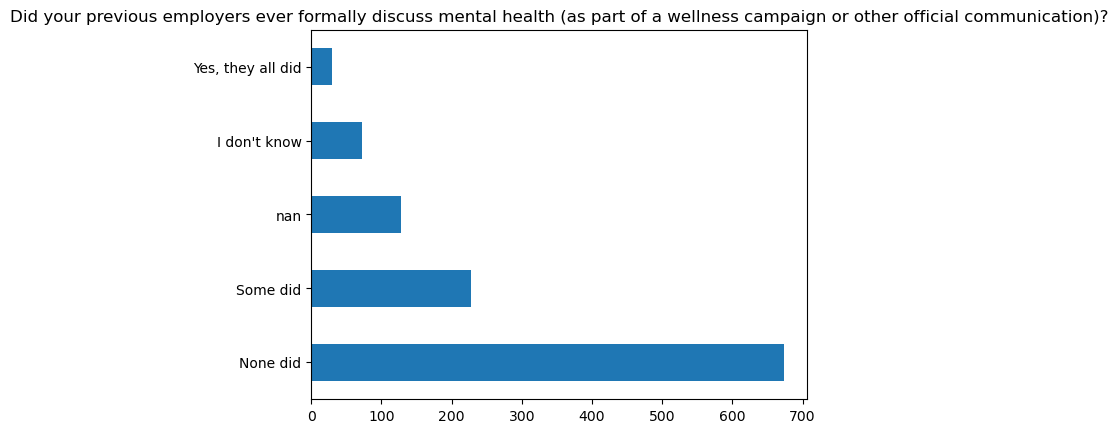

value counts of prev_employers_mh_ressources_offered :


count   percent
None did             635  0.561450
Some did             320  0.282935
NaN                  128  0.113174
Yes, they all did     48  0.042440

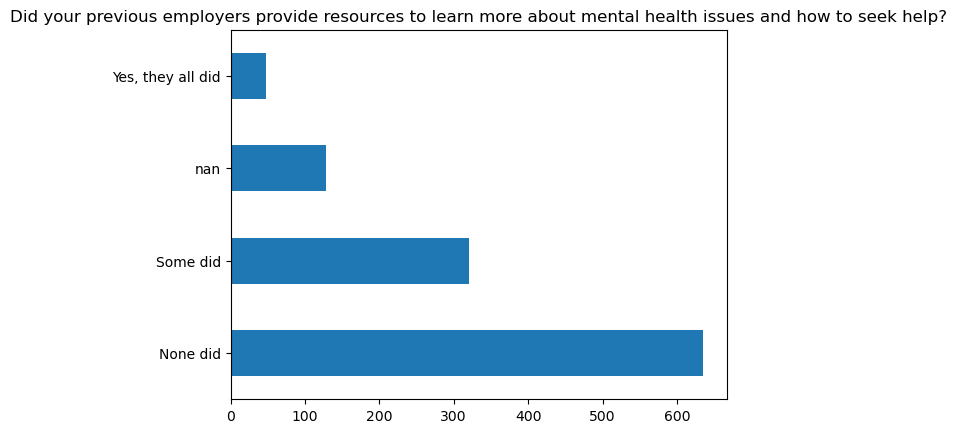

value counts of prev_employer_anonymity_mh_benefits :


count   percent
I don't know    662  0.585323
Yes, always     133  0.117595
NaN             128  0.113174
Sometimes       107  0.094607
No              101  0.089302

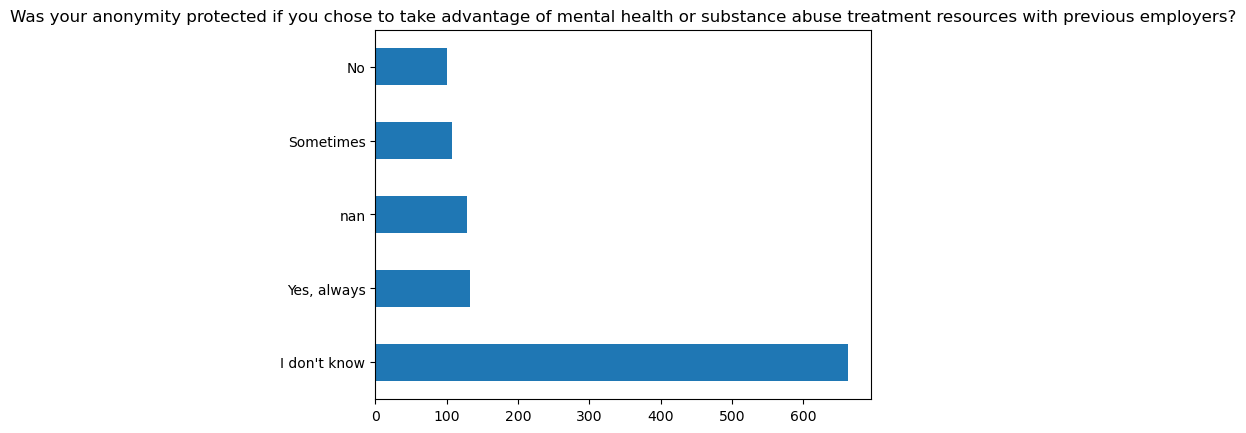

value counts of prev_employers_neg_conseq_mh_disclosure_expected :


count   percent
Some of them        495  0.437666
I don't know        243  0.214854
Yes, all of them    168  0.148541
NaN                 128  0.113174
None of them         97  0.085765

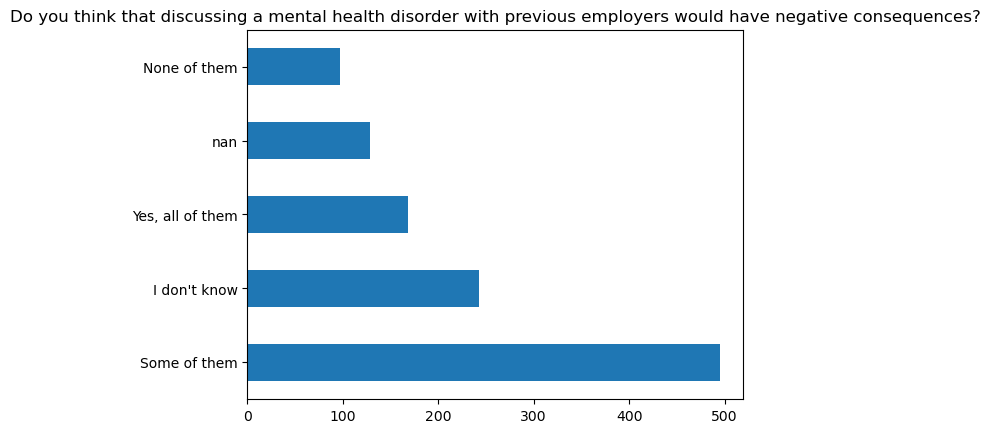

value counts of prev_employers_neg_conseq_physical_disclosure_expected :


count   percent
Some of them        493  0.435897
None of them        449  0.396994
NaN                 128  0.113174
Yes, all of them     61  0.053935

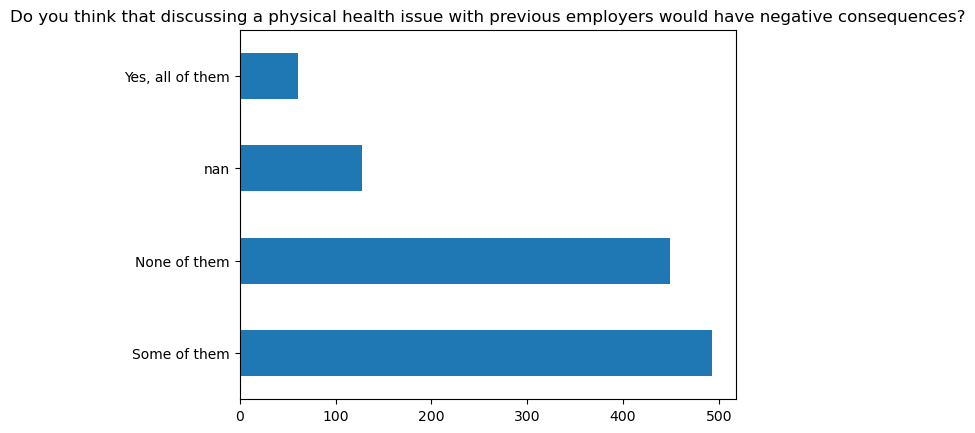

value counts of mh_disclosure_prev_coworkers_comfortable :


count   percent
Some of my previous employers           573  0.506631
No, at none of my previous employers    356  0.314766
NaN                                     128  0.113174
Yes, at all of my previous employers     74  0.065429

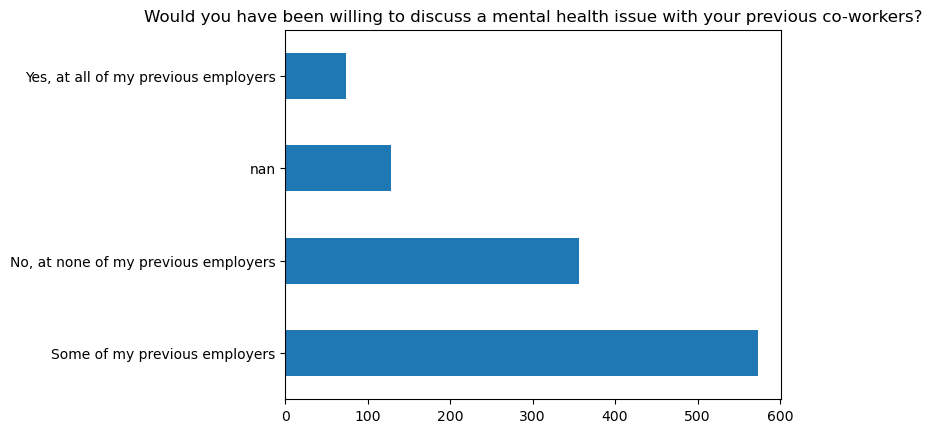

value counts of mh_disclosure_prev_supervisor_comfortable :


count   percent
Some of my previous employers           510  0.450928
No, at none of my previous employers    341  0.301503
NaN                                     128  0.113174
Yes, at all of my previous employers     78  0.068966
I don't know                             74  0.065429

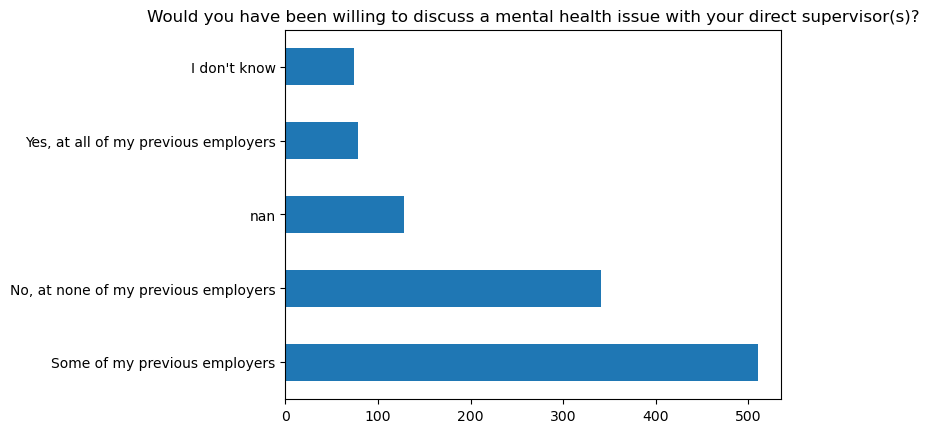

value counts of seriousness_mh_physical_prev_employers :


count   percent
None did             359  0.317418
Some did             349  0.308576
I don't know         257  0.227233
NaN                  128  0.113174
Yes, they all did     38  0.033599

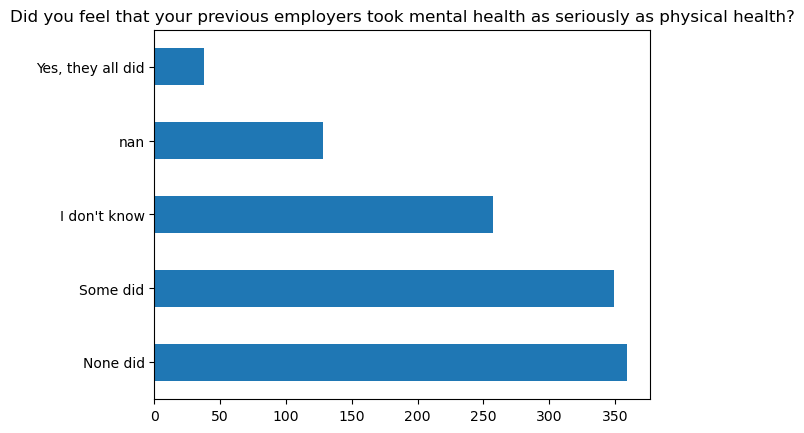

value counts of neg_conseq_coworker_mh_disclosure_prev_employers :


count   percent
None of them        629  0.556145
Some of them        330  0.291777
NaN                 128  0.113174
Yes, all of them     44  0.038904

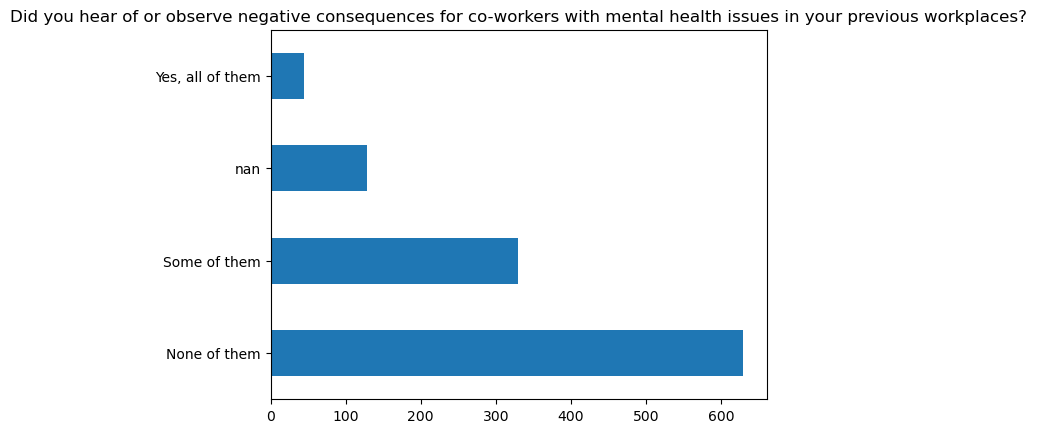

value counts of willingness_physical_disclosure_interview :


count   percent
Maybe    475  0.419982
No       368  0.325376
Yes      288  0.254642

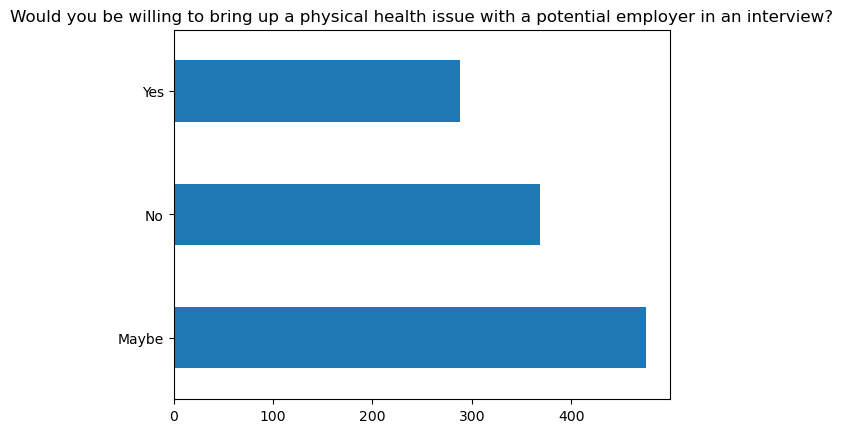

value counts of willingness_mh_disclosure_interview :


count   percent
No       710  0.627763
Maybe    331  0.292661
Yes       90  0.079576

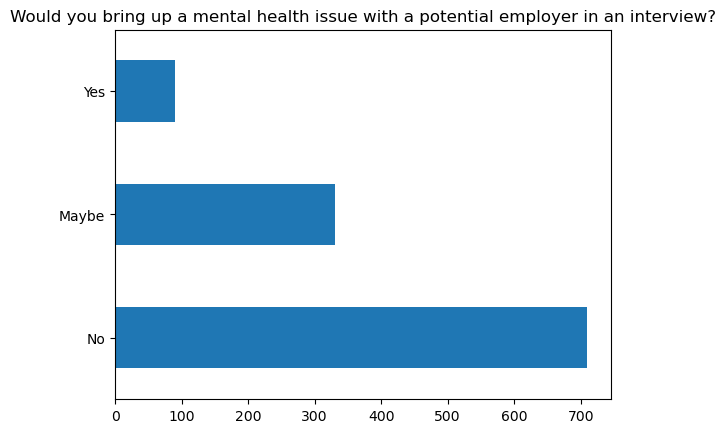

value counts of mh_disclosure_expected_neg_effect_career :


count   percent
Maybe                         466  0.412025
Yes, I think it would         441  0.389920
No, I don't think it would    121  0.106985
Yes, it has                    78  0.068966
No, it has not                 25  0.022104

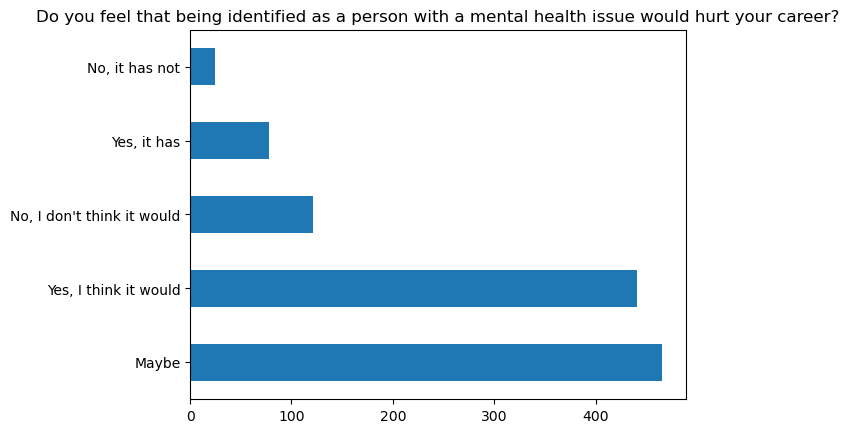

value counts of mh_disclosure_expected_neg_view_coworkers :


count   percent
Maybe                           456  0.403183
No, I don't think they would    302  0.267020
Yes, I think they would         301  0.266136
No, they do not                  44  0.038904
Yes, they do                     28  0.024757

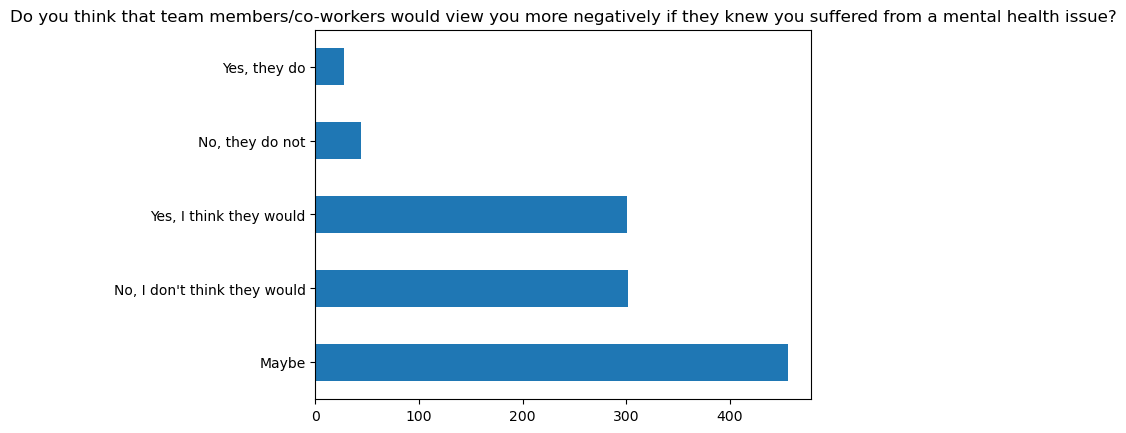

value counts of willingness_mh_disclosure_family :


count   percent
Somewhat open                                         508  0.449160
Very open                                             198  0.175066
Somewhat not open                                     173  0.152962
Neutral                                               110  0.097259
Not applicable to me (I do not have a mental il...     79  0.069850
Not open at all                                        63  0.055703

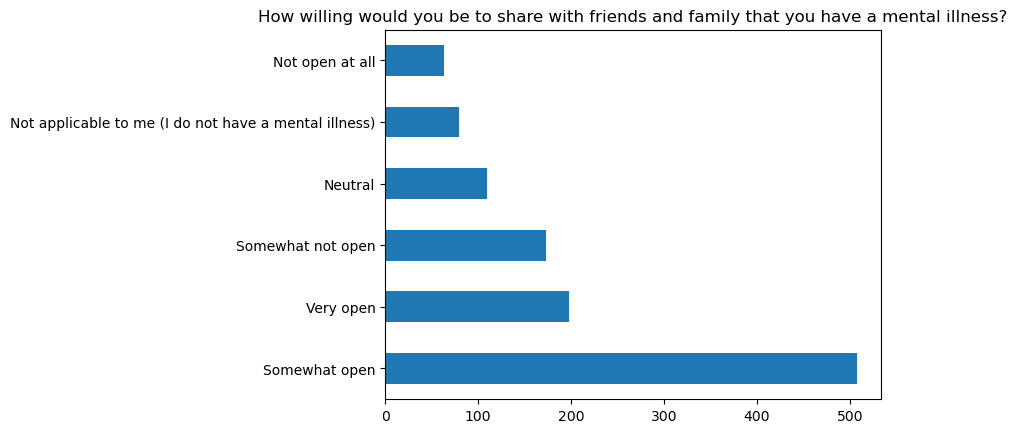

value counts of mh_neg_effect_workplace_observed :


count   percent
No                    488  0.431477
Maybe/Not sure        272  0.240495
Yes, I observed       192  0.169761
Yes, I experienced    128  0.113174
NaN                    51  0.045093

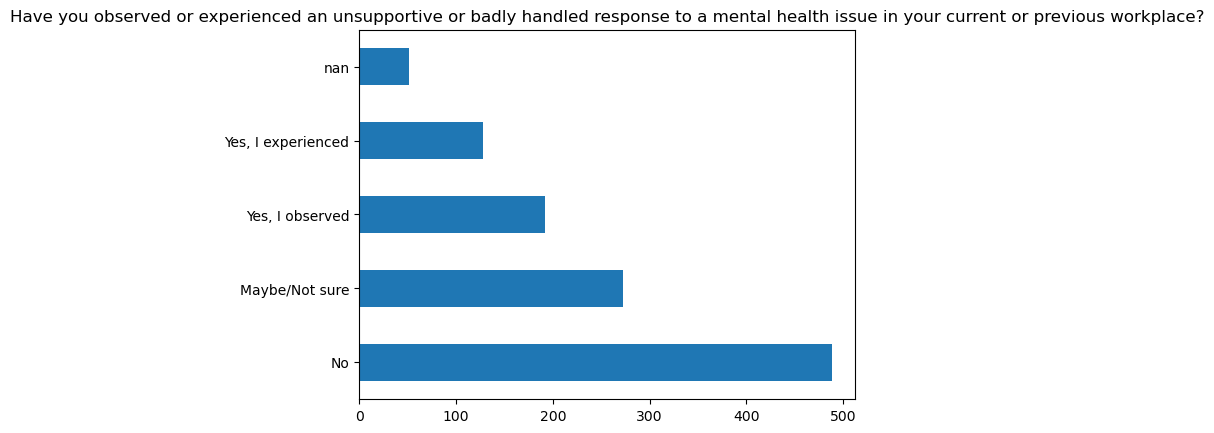

value counts of effect_neg_conseq_mh_disclosure :


count   percent
NaN      629  0.556145
No       195  0.172414
Yes      180  0.159151
Maybe    127  0.112290

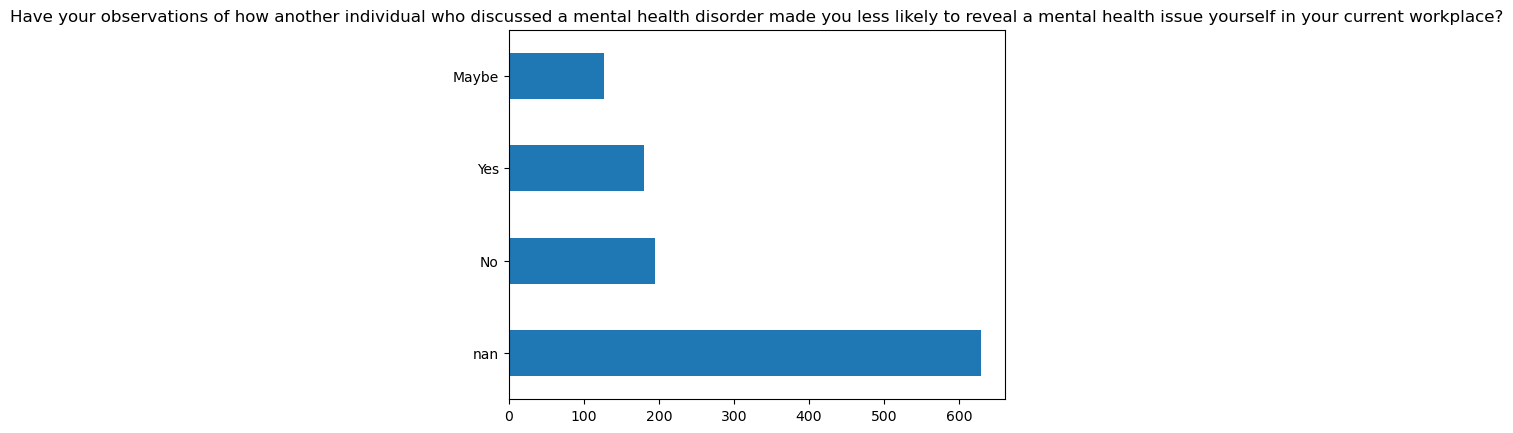

value counts of family_history_mental_illness :


count   percent
Yes             534  0.472149
No              387  0.342175
I don't know    210  0.185676

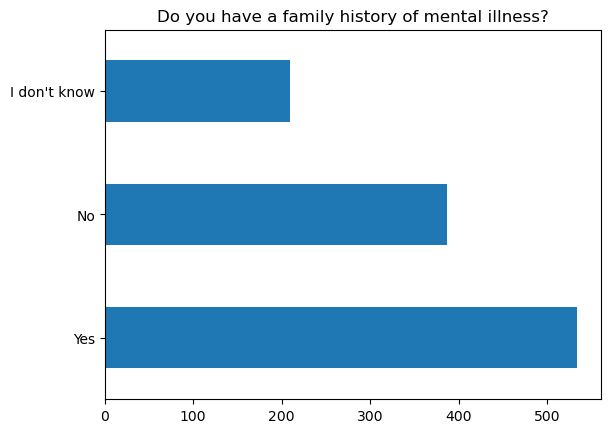

value counts of self_mental_illness_past :


count   percent
Yes      578  0.511052
No       371  0.328028
Maybe    182  0.160920

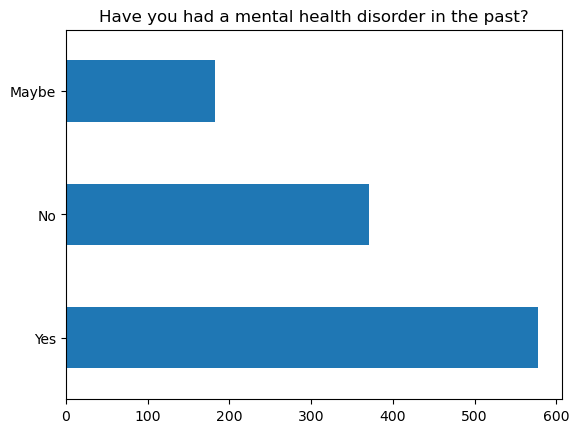

value counts of self_mental_illness_present :


count   percent
Yes      445  0.393457
No       435  0.384615
Maybe    251  0.221927

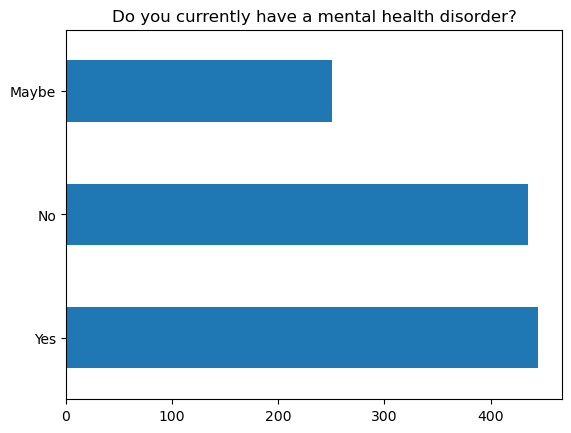

value counts of diagnosed_by_professional :


count   percent
No     570  0.503979
Yes    561  0.496021

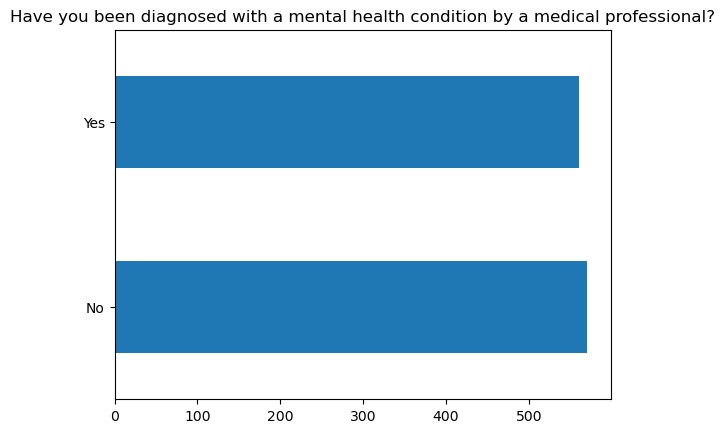

value counts of mental_illness_treated :


count   percent
1    649  0.573828
0    482  0.426172

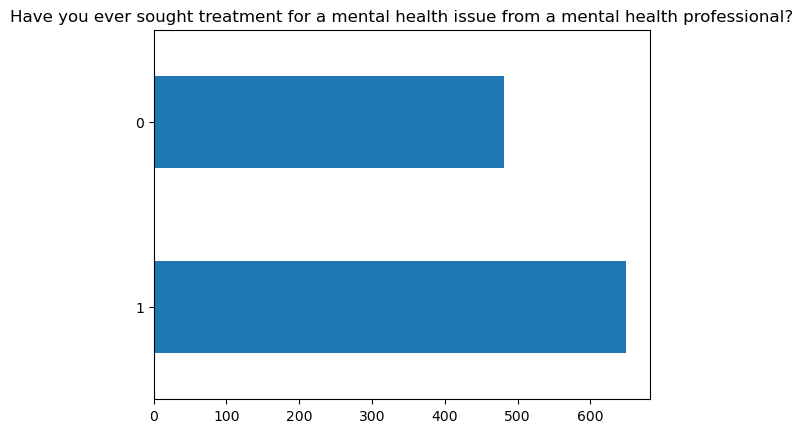

value counts of neg_effect_work_treated :


count   percent
Not applicable to me    448  0.396110
Sometimes               280  0.247569
Rarely                  256  0.226348
Never                   104  0.091954
Often                    43  0.038019

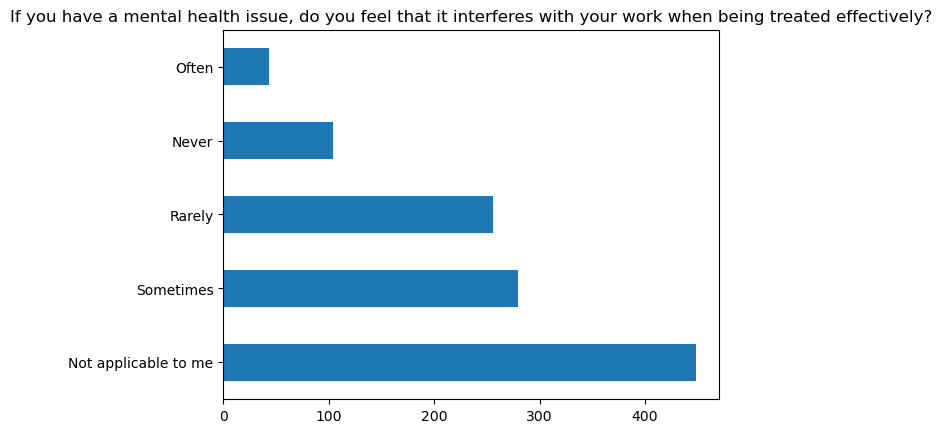

value counts of neg_effect_work_not_treated :


count   percent
Often                   415  0.366932
Not applicable to me    378  0.334218
Sometimes               285  0.251989
Rarely                   43  0.038019
Never                    10  0.008842

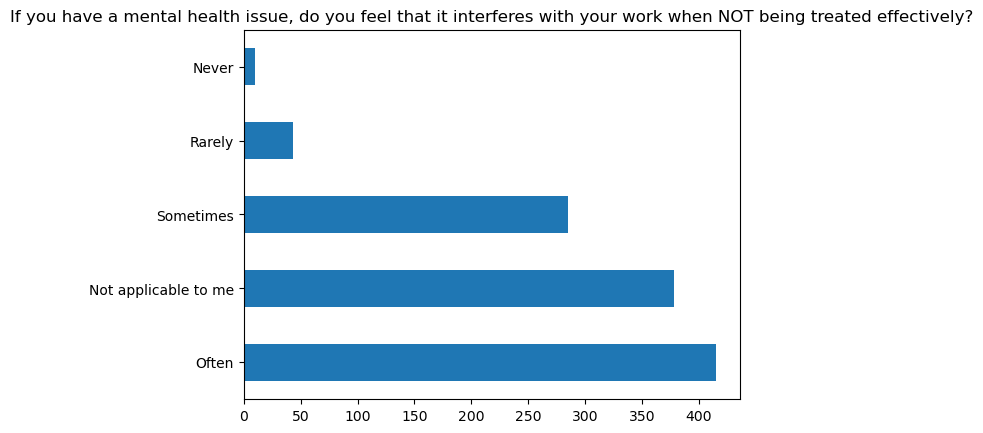

value counts of work_remotely :


count   percent
Sometimes    603  0.533156
Never        311  0.274978
Always       217  0.191866

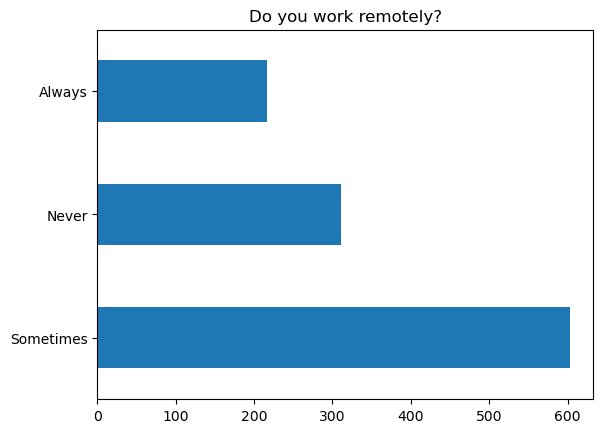

In [16]:
# explore variables again visually
explore_few_uniques_features(df_tech)

Observations
* 128 respondents had no previous employers and questions about previous employers usually lack 128 values (this is addressed later).
* many questions have a "don't know" (dk) or a "not applicable" (n/a) option. 
* questions about mental disorders are not answered consistently. For example, only 79 persons chose "Not applicable to me (I do not have a mental illness)" in response to the question "How willing would you be to share with friends and family that you a have a mental illness?" although 371 individuals never had a mental disorder in the past and 435 indicated that they do not currently have a mental illness. As another example, 482 individuals have never sought treatment for a mental health issue, but only 448 respond "not applicable to me" to the question "if you have a mental health issue, do you feel that it interferes with your work when being treated effectively?"
* those who answered "Yes, it has" or "No, it has not" to the question "do you feel that being identified as a person with a mental health issue would hurt your career?" were likely to have disclosed their mental health problems
* for those who answered "Yes, they do" or "No, they do not" to the question "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue", it is likely that they disclosed their mental health issues 
* however, there are many "maybe" answers to both questions, so it is difficult to draw conclusions about who has disclosed their mental health problems and who has not

#### 3.1.2 Variables With Many Unique Values

In [17]:
# display the variables with more than 10 unique values including their value count
df_uniques = f.create_uniques_df(df_tech)

df_many_uniques = df_uniques.loc[df_uniques['uniques_count'] > 10].copy()
display(df_many_uniques[['variable', 'uniques_count']])

variable  uniques_count
37  reason_willingness_physical_disclosure_interview            852
39        reason_willingness_mh_disclosure_interview            850
48                        diagnosed_mental_illnesses            101
49                           possible_mental_illness             78
51                         diagnoses_by_professional             91
55                                               age             50
56                                            gender             61
57                                      country_live             43
58                                     US_state_live             48
59                                      country_work             44
60                                     US_state_work             49
61                             current_work_position            178

In [18]:
# create a copy of the dataset, which stores the cleaned features
df_v1 = df_tech.copy() 

##### Reason Variables

In [19]:
# look at example data for the reason variables
df_v1[['reason_willingness_physical_disclosure_interview', 'reason_willingness_mh_disclosure_interview']].head(10)

reason_willingness_physical_disclosure_interview  \
0                                                 NaN   
1   It would depend on the health issue. If there ...   
2   They would provable need to know, to Judge if ...   
4   Depending on the interview stage and whether I...   
5   If it would potentially affect my ability to d...   
6   I want to gauge their ability to support this ...   
7                             I feel it's irrelevant.   
8               Makes me a less attractive candidate.   
10  Being honest upfront shows respect for the fut...   
11   It isn't relevant to my ability as a programmer.   

           reason_willingness_mh_disclosure_interview  
0                                                 NaN  
1   While mental health has become a more prominen...  
2                                    Stigma, mainly.   
4                                        I don't know  
5   It would depend on the field & what I knew of ...  
6   I want to gauge their ability to support, unde...  
7                                        Same reason.  
8   Only if I felt I required accommodation. Even ...  
10                              Same reason as above.  
11   It isn't relevant to my ability as a programmer.

Observations
* based on the high number of unique values and these example data, it is likely that these two questions had an open text field as an answer option 
* it might be worth analyzing them later using feature engineering techniques such as Bag-of-Words or term frequency-inverse document frequency (Müller & Guido, 2016, p. 327 & p. 336) if there are not too many missing values

##### Gender

In [20]:
# show unique values of the gender variable
print(df_v1['gender'].unique())

['Male' 'male' 'Male ' 'Female' 'M' 'female' 'm' 'I identify as female.'
 'Bigender' 'non-binary' 'Female assigned at birth ' 'F' 'man' 'fm' 'f'
 'Cis female ' 'Transitioned, M2F' 'Genderfluid (born female)'
 'Other/Transfeminine' 'Female or Multi-Gender Femme' 'woman'
 'female/woman' 'Cis male' 'Male.' 'Androgynous'
 'male 9:1 female, roughly' nan 'Male (cis)' 'Other' 'Female '
 'nb masculine' 'Cisgender Female' 'Man' 'Sex is male'
 'none of your business' 'genderqueer' 'cis male' 'Human' 'Genderfluid'
 'Enby' 'genderqueer woman' 'female ' 'Woman' 'Queer' 'Agender' 'Dude'
 'mail' 'Male/genderqueer' 'fem' 'Nonbinary' 'male '
 'Female (props for making this a freeform field, though)' 'Cis Male'
 'Male (trans, FtM)' 'Cis-woman' 'Genderqueer' 'cisdude'
 'Genderflux demi-girl' 'female-bodied; no feelings about gender'
 'cis man' 'Transgender woman']


Observations
* the gender variable apparently had an open text field, so this variable needs to be cleaned up
* most values can be clearly assigned to the three categories "male", "female", and "other"

value counts of gender :


count   percent
male      840  0.742706
female    258  0.228117
other      28  0.024757
NaN         5  0.004421

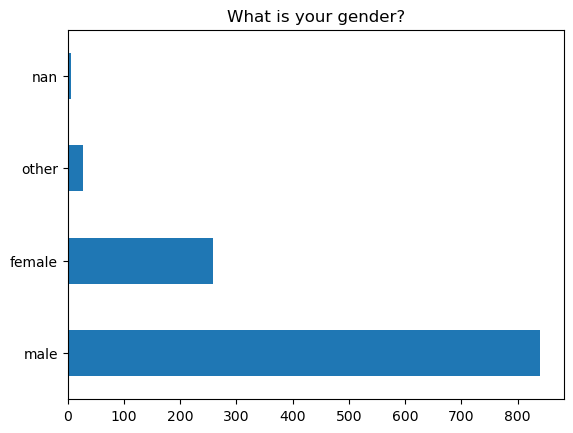

In [21]:
# assign gender responses to the categories "male", "female", and "other"
def identify_gender(gender):
    """assign the indicated gender to one of the three categories "male", "female", and "other"
    
    :param gender: the indicated gender ('str')
    :return: the corresponding gender category ('str')
    """
    
    gender = gender.lower().strip()
    if gender in ['male', 'm', 'man', 'cis male', 'male (cis)', 'sex is male', 'malr', 'dude', 'mail', 'm|', 'cisdude', 'cis man', 'male.',
                  'i\'m a man why didn\'t you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?']:
        return "male"
    elif gender in ['female', 'i identify as female.', 'female assigned at birth', 'f', 'woman', 'cis female', 'female/woman', 'cisgender female', 'fem',
                    'female (props for making this a freeform field, though)', 'cis-woman', 'afab']:
        return "female"
    elif not gender or gender in ['none of your business', 'human', 'nan']:
        return np.nan
    else:
        return "other"

df_v1['gender'] = df_v1['gender'].astype(str) # convert all values in the gender column to string for the apply function to work
df_v1['gender'] = df_v1['gender'].apply(identify_gender)

# explore value counts for the gender variable
f.explore_feature(df_v1['gender']) 

Observations
* most respondents are male (74%), which is to be expected for a study in the tech/IT sector

##### Age

In [22]:
# show descriptive statistics for the age variable
df_v1['age'].describe()

count    1131.000000
mean       33.607427
std        11.658173
min         3.000000
25%        28.000000
50%        32.000000
75%        38.000000
max       323.000000
Name: age, dtype: float64

Observations
* the dataset contains unrealistic ages with a minimum age of 3 and a maximum age of 323 years

In [23]:
# sort ages to display the ten highest and ten lowest values
age_sorted = sorted(df_v1['age'].tolist())
print("10 highest age values:", age_sorted[-10:])
print("10 lowest age values:", age_sorted[:10])

10 highest age values: [58, 59, 61, 62, 63, 63, 66, 70, 99, 323]
10 lowest age values: [3, 17, 19, 19, 20, 20, 20, 20, 20, 21]


Observations
* there are three unrealistic ages in the dataset (3, 99, 323), which will be treated as missing values 

In [24]:
# replace the three unrealistic ages with missing values
df_v1['age'].replace([3, 99, 323], np.nan, inplace=True)

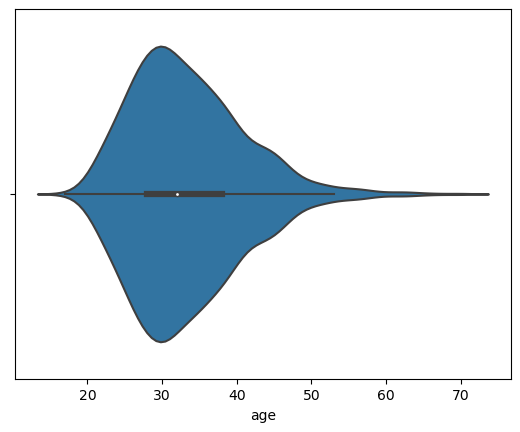

number of outliers in age: 11


440     57.0
1126    57.0
1167    57.0
649     58.0
710     59.0
484     61.0
591     62.0
745     63.0
1224    63.0
701     66.0
1221    70.0
Name: age, dtype: float64

In [25]:
# check for outliers
def check_distribution(col, data):
    """provide a violinplot visualization of the column data and display outliers based on a z-transformation of the column data
    
    :param col: the column name ('str')
    :param data: the data which contains the column of interest ('pandas.core.frame.DataFrame') 
    """
    
    sns.violinplot(x=data[col])
    plt.show()
    z_scores = stats.zscore(data[col], nan_policy='omit')
    outliers = np.where(z_scores > 3)[0]
    print(f'number of outliers in {col}:', len(outliers))
    display(data.loc[data.index[outliers], col].sort_values())

check_distribution('age', df_v1)

Observations
* the age distribution shows a slight positive skew, with younger ages being more common than older ones
* all ages above 56 are considered outliers by the z-transformation
* since these may be valid values (older individuals are also allowed to work), they are not excluded from further analyses

##### Diagnoses

In [26]:
# display the first 20 unique values of the diagnosed_mental_ilnesses variable 
unique_diagnoses = df_v1['diagnosed_mental_illnesses'].unique().tolist()
print(unique_diagnoses[:20])

[nan, 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)', 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Stress Response Syndromes', 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Stress Response Syndromes|Substance Use Disorder', 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Substance Use Disorder', 'Mood Disorder (Depression, Bipolar Disorder, etc)', 'Anxiety Disorder (Generalized, Social, Phobia, etc)', 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Obsessive-Compulsive Disorder', 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Eating Disorder (Anorexia, Bulimia, etc)|Obsessive-Compulsive Disorder', 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Substance Use Disorder|Addictive Disorder', 'Mood Disorder (Depression, Bipolar Disorder, etc)|Personality Disorder (Borderline, Antisocial, Paranoid, etc

Observations
* most likely it was possible to select more than one diagnosis
* several diagnoses of one person seem to be separated by a "|"

In [27]:
# check whether this also applies to the other two diagnoses variables
unique_poss_diagnoses = df_v1['possible_mental_illness'].unique().tolist()
print(unique_poss_diagnoses[:10])

unique_prof_diagnoses = df_v1['diagnoses_by_professional'].unique().tolist()
print(unique_prof_diagnoses[:10])

[nan, 'Substance Use Disorder|Addictive Disorder', 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)', 'Anxiety Disorder (Generalized, Social, Phobia, etc)', 'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder', 'Mood Disorder (Depression, Bipolar Disorder, etc)|Anxiety Disorder (Generalized, Social, Phobia, etc)', 'Mood Disorder (Depression, Bipolar Disorder, etc)', 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Psychotic Disorder (Schizophrenia, Schizoaffective, etc)', 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Personality Disorder (Borderline, Antisocial, Paranoid, etc)', 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder']
['Anxiety Disorder (Generalized, Social, Phobia, etc)', 'Anxiet

Observations
* for all three diagnosis variables, it was most likely possible to select multiple disorders, separated by a "|"

Diagnosed illnesses:
value counts of diagnosed_mental_illnesses :


count   percent
nan                                                   692  0.431421
Mood Disorder (Depression, Bipolar Disorder, etc)     322  0.200748
Anxiety Disorder (Generalized, Social, Phobia, ...    267  0.166459
Attention Deficit Hyperactivity Disorder               92  0.057357
Post-traumatic Stress Disorder                         50  0.031172
Obsessive-Compulsive Disorder                          36  0.022444
Substance Use Disorder                                 31  0.019327
Stress Response Syndromes                              27  0.016833
Addictive Disorder                                     24  0.014963
Personality Disorder (Borderline, Antisocial, P...     22  0.013716
Eating Disorder (Anorexia, Bulimia, etc)               18  0.011222
Dissociative Disorder                                   5  0.003117
Psychotic Disorder (Schizophrenia, Schizoaffect...      4  0.002494
Seasonal Affective Disorder                             1  0.000623
Pervasive Developmental Disorder (Not Otherwise...      1  0.000623
Autism (Asperger's)                                     1  0.000623
Traumatic Brain Injury                                  1  0.000623
Asperges                                                1  0.000623
PTSD (undiagnosed)                                      1  0.000623
Autism                                                  1  0.000623
Sexual addiction                                        1  0.000623
Sleeping Disorder                                       1  0.000623
Autism Spectrum Disorder                                1  0.000623
Transgender                                             1  0.000623
ADD (w/o Hyperactivity)                                 1  0.000623
Schizotypal Personality Disorder                        1  0.000623
Autism spectrum disorder                                1  0.000623

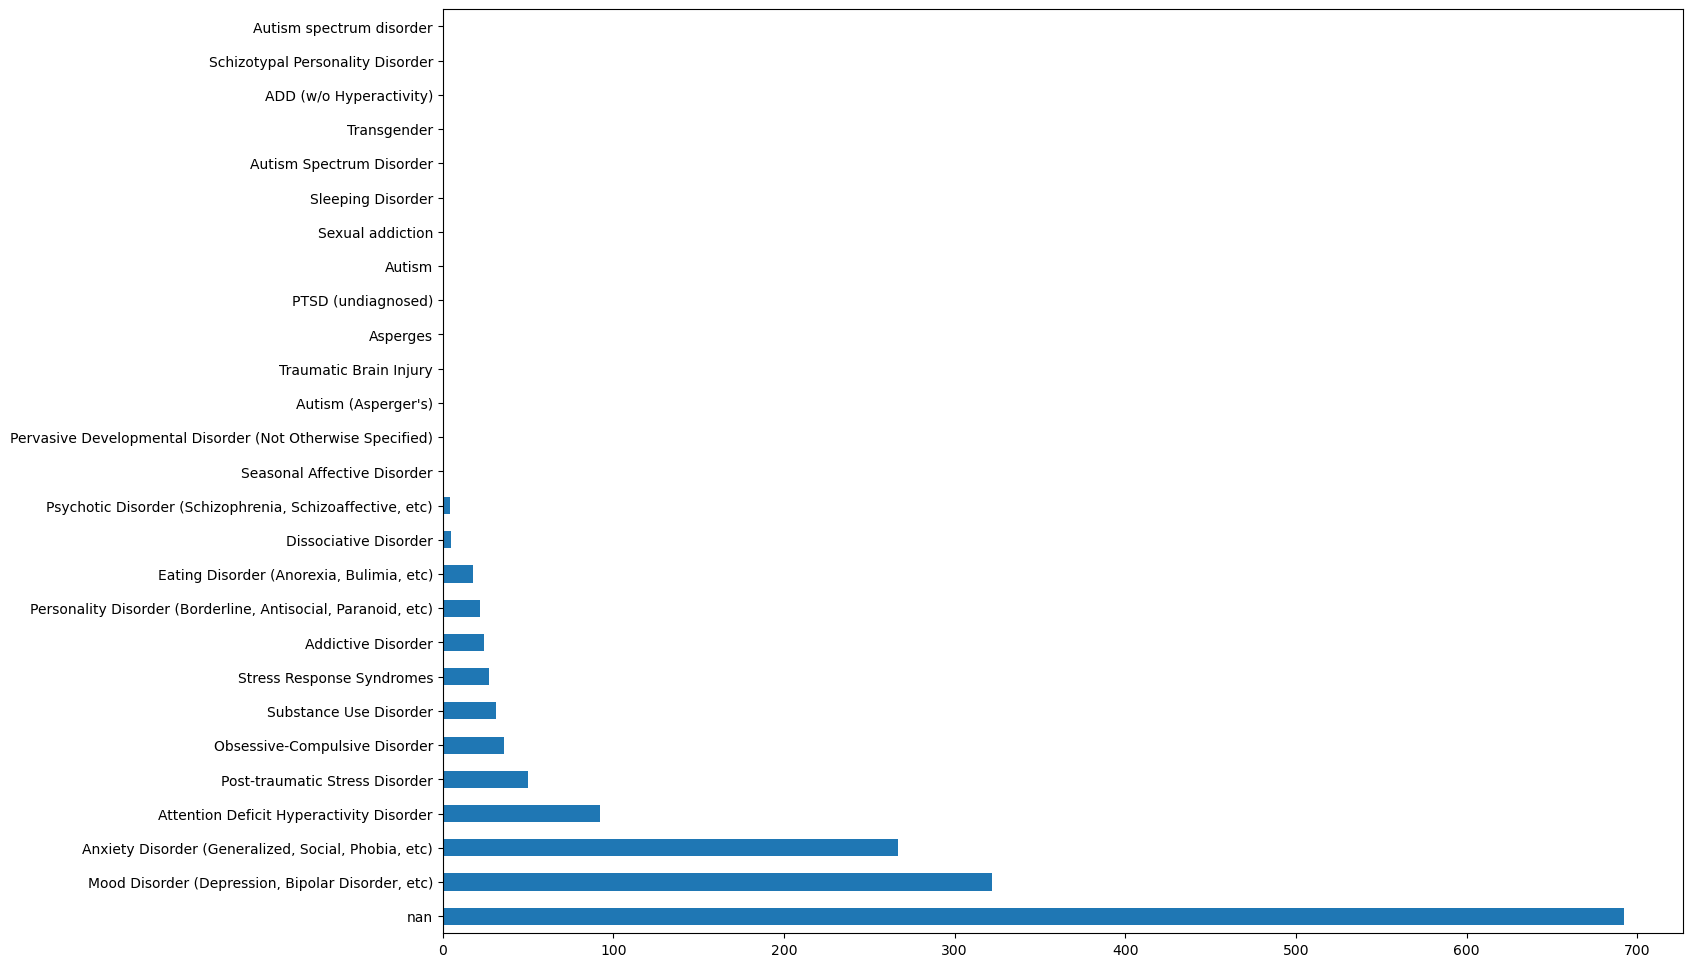


 Possible illnesses:
value counts of possible_mental_illness :


count   percent
nan                                                   884  0.632785
Mood Disorder (Depression, Bipolar Disorder, etc)     167  0.119542
Anxiety Disorder (Generalized, Social, Phobia, ...    149  0.106657
Attention Deficit Hyperactivity Disorder               42  0.030064
Personality Disorder (Borderline, Antisocial, P...     29  0.020759
Stress Response Syndromes                              28  0.020043
Obsessive-Compulsive Disorder                          24  0.017180
Post-traumatic Stress Disorder                         19  0.013601
Addictive Disorder                                     18  0.012885
Substance Use Disorder                                 12  0.008590
Eating Disorder (Anorexia, Bulimia, etc)                8  0.005727
Psychotic Disorder (Schizophrenia, Schizoaffect...      6  0.004295
Dissociative Disorder                                   2  0.001432
post-partum / anxiety                                   1  0.000716
depersonalization disorder                              1  0.000716
Asperger's                                              1  0.000716
Asperger Syndrome                                       1  0.000716
Suicidal Ideation                                       1  0.000716
Depersonalisation                                       1  0.000716
Tinnitus                                                1  0.000716
Gender Identity Disorder                                1  0.000716
Autism                                                  1  0.000716

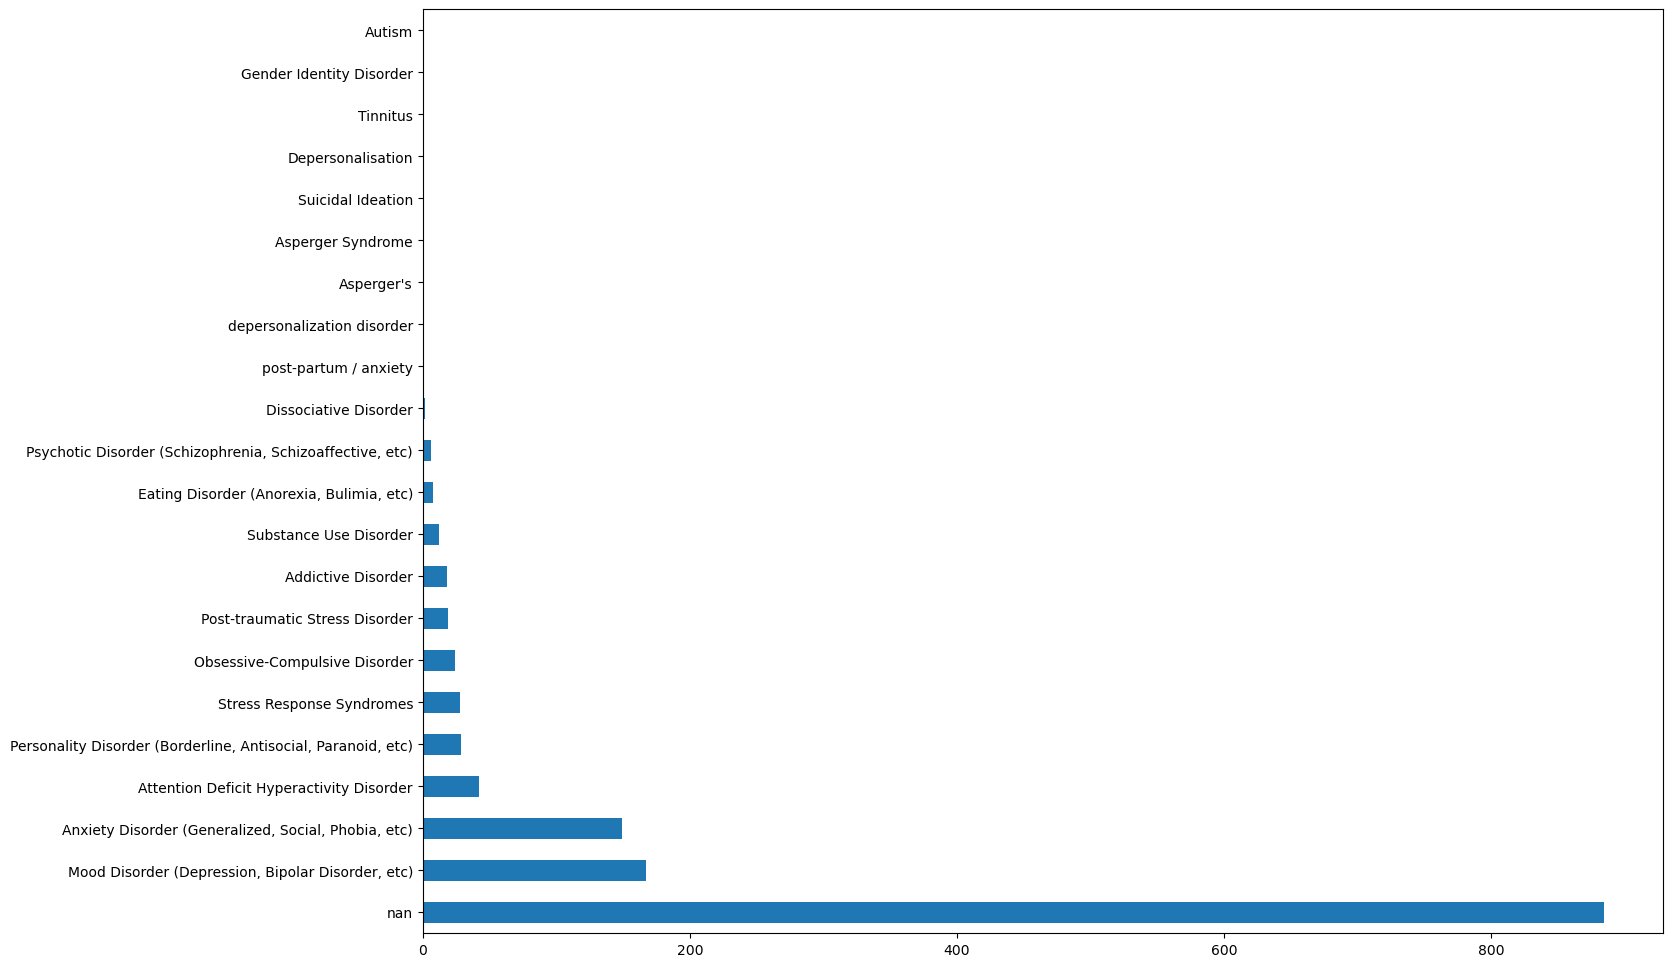


 Professional diagnoses:
value counts of diagnoses_by_professional :


count   percent
nan                                                   574  0.364908
Mood Disorder (Depression, Bipolar Disorder, etc)     414  0.263191
Anxiety Disorder (Generalized, Social, Phobia, ...    291  0.184997
Attention Deficit Hyperactivity Disorder              103  0.065480
Post-traumatic Stress Disorder                         52  0.033058
Obsessive-Compulsive Disorder                          33  0.020979
Stress Response Syndromes                              21  0.013350
Personality Disorder (Borderline, Antisocial, P...     19  0.012079
Substance Use Disorder                                 18  0.011443
Eating Disorder (Anorexia, Bulimia, etc)               14  0.008900
Addictive Disorder                                     10  0.006357
Dissociative Disorder                                   5  0.003179
Psychotic Disorder (Schizophrenia, Schizoaffect...      4  0.002543
Suicidal Ideation                                       1  0.000636
Seasonal Affective Disorder                             1  0.000636
Gender Identity Disorder                                1  0.000636
Autism (Asperger's)                                     1  0.000636
PDD-NOS (see above)                                     1  0.000636
Autism                                                  1  0.000636
Autism - while not a "mental illness", still gr...      1  0.000636
Attention Deficit Disorder                              1  0.000636
posttraumatic stress disourder                          1  0.000636
attention deficit disorder (but not the hyperac...      1  0.000636
Autism Spectrum Disorder                                1  0.000636
Asperger Syndrome                                       1  0.000636
ADD (w/o Hyperactivity)                                 1  0.000636
Schizotypal Personality Disorder                        1  0.000636
autism spectrum disorder                                1  0.000636

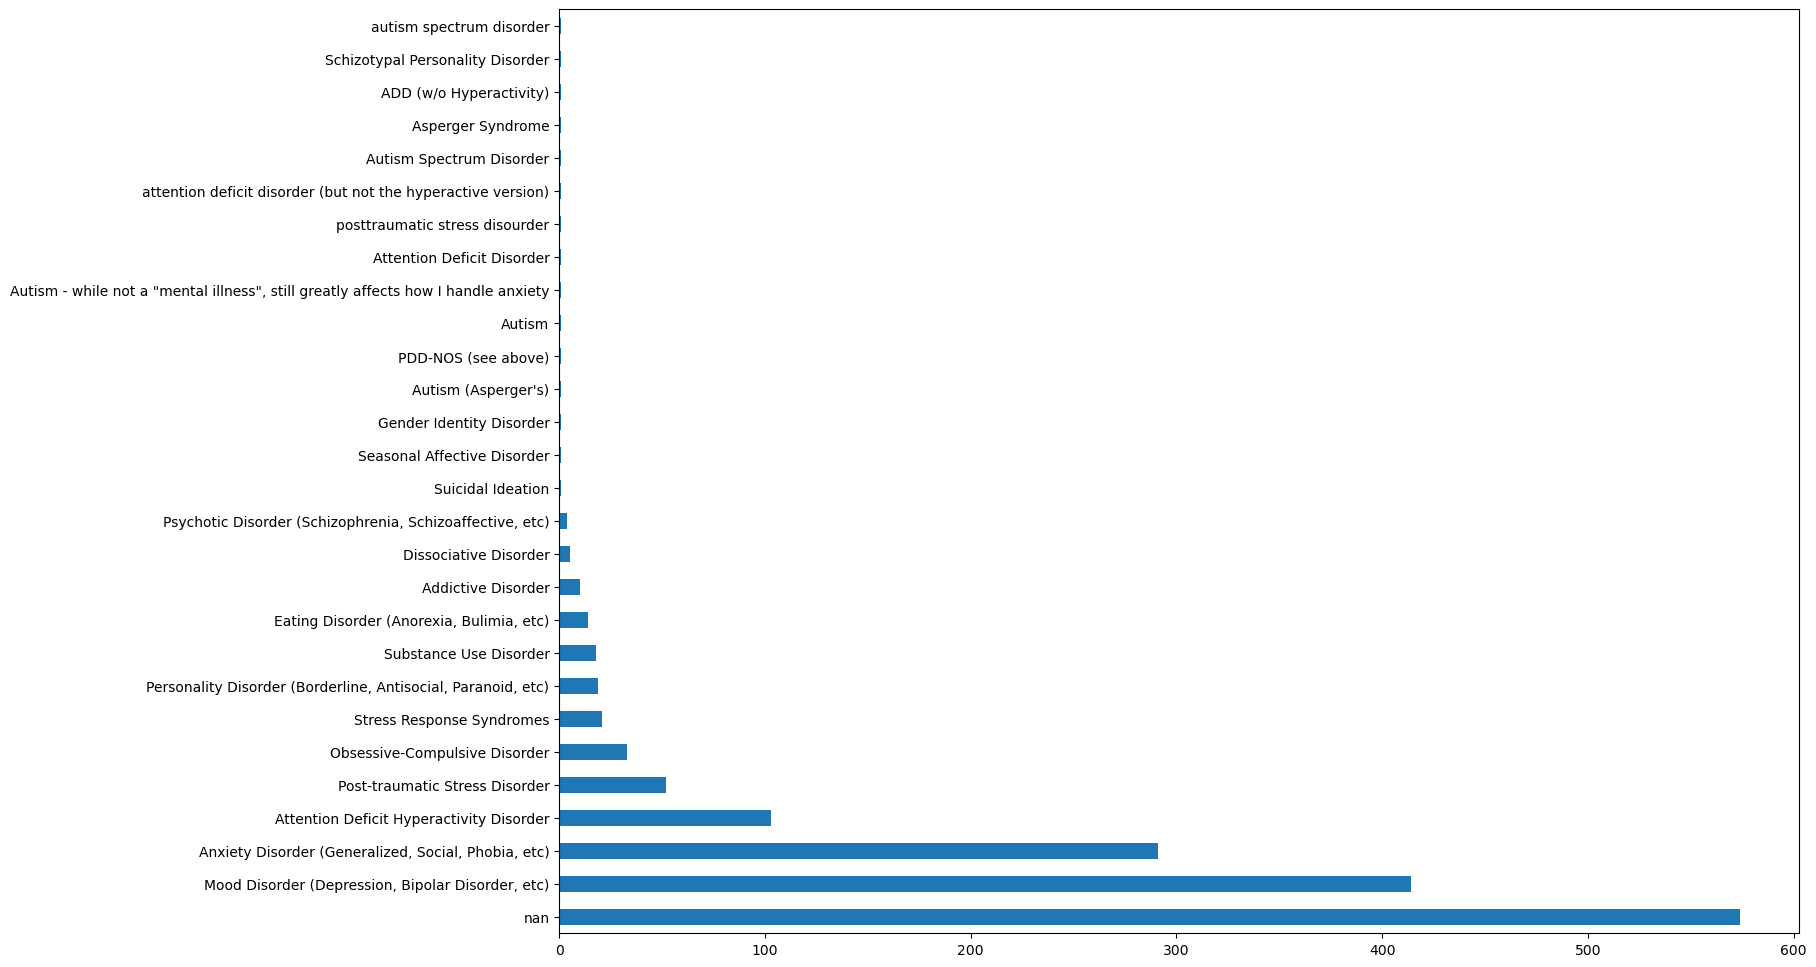

In [28]:
# visualize frequency distributions for the individual diagnoses
print("Diagnosed illnesses:")
f.n_per_option(df_v1, 'diagnosed_mental_illnesses')

print("\n Possible illnesses:")
f.n_per_option(df_v1, 'possible_mental_illness')

print("\n Professional diagnoses:")
f.n_per_option(df_v1, 'diagnoses_by_professional')

Observations
* it is likely that individuals had the option to enter diagnoses that were not mentioned, as "Autism", "Autism (Asperger's)", and "Asperges" are all mentioned as separate diagnoses
* one person entered "PTSD (undiagnosed)" for the variable diagnosed_mental_illnesses, which most likely should have been a possible mental illness
* tinnitus and traumatic brain injury are not considered mental illnesses (American Psychiatric Association, 2013), but are retained for now, as it is possible that these individuals see themselves as having mental health disorders, which may influence their response behavior
* for all three variables, mood disorders (12-26%) were reported most frequently, followed by anxiety disorders (11-18%)

In [29]:
# check what the person who answered 'PTSD (undiagnosed)' responded to the variable 'possible_mental_illness'
index_ptsd_undiagnosed = df_v1.index[df_v1['diagnosed_mental_illnesses'].str.contains('PTSD (undiagnosed)', na=False, regex=False)]

df_v1.loc[index_ptsd_undiagnosed, ['diagnosed_mental_illnesses', 'possible_mental_illness']]

diagnosed_mental_illnesses possible_mental_illness
446  Attention Deficit Hyperactivity Disorder|PTSD ...                     NaN

Observations
* this person has not indicated any possible mental illnesses, so this will be adapted in the following

In [30]:
# adapt the responses of the person who answered 'PTSD (undiagnosed)'
df_v2 = df_v1.copy()
df_v2['diagnosed_mental_illnesses'] = df_v2['diagnosed_mental_illnesses'].str.replace("|PTSD (undiagnosed)", "", regex=False)
df_v2.at[int(index_ptsd_undiagnosed[0]), 'possible_mental_illness'] = 'Post-traumatic Stress Disorder'

In [31]:
# clean the diagnoses variables by assigning them to the correct group of diagnoses and correcting typos
def identify_diagnosis(diagnosis):
    """assign a diagnosis to the correct group of diagnoses according to DSM-V and ICD-10 definitions and correct typos
    
    :param diagnosis: the indicated diagnosis ('str')
    :return: the corresponding group of diagnoses ('str')
    """
    
    diagnosis_lowered = diagnosis.lower().strip()
    if diagnosis_lowered in ['autism', 'autism spectrum disorder', 'autism (asperger\'s)', 'asperges', 'asperger syndrome', 'asperger\'s',
                             'autism - while not a \"mental illness\", still greatly affects how i handle anxiety', 'pdd-nos (see above)',
                             'pervasive developmental disorder (not otherwise specified)']:
        return 'autism spectrum disorder'
    elif diagnosis_lowered in ['depersonalisation', 'depersonalization disorder']:
        return 'dissociative disorder'
    elif diagnosis_lowered == 'seasonal affective disorder':
        return 'mood disorder (depression, bipolar disorder, etc)'
    elif diagnosis_lowered == 'schizotypal personality disorder':
        return 'personality disorder (borderline, antisocial, paranoid, etc)'
    elif diagnosis_lowered == 'post-partum / anxiety':
        return 'anxiety disorder (generalized, social, phobia, etc)'
    elif diagnosis_lowered in ['add (w/o hyperactivity)', 'attention deficit disorder', 'attention deficit disorder (but not the hyperactive version)']:
        return 'attention deficit hyperactivity disorder'
    elif diagnosis_lowered == 'posttraumatic stress disourder':
        return 'post-traumatic stress disorder'
    elif not diagnosis_lowered or diagnosis_lowered == 'nan':
        return np.nan
    else:
        return diagnosis_lowered


def clean_diagnoses(diagnosis_feature):
    """clean a feature containing diagnoses by assigning the values to the correct group of diagnoses and separating them by '|'
    
    :param diagnosis_feature: the feature containing diagnoses to be cleaned ('pandas.core.series.Series')
    :return: a list containing the values of the cleaned diagnosis feature ('list')
    """
    
    lists_diagnoses = f.split_by_line(diagnosis_feature)
    diagnoses_str = [[str(diagnosis) for diagnosis in list_element] for list_element in lists_diagnoses]
    cleaned_diagnoses = [[identify_diagnosis(diagnosis) for diagnosis in list_element] for list_element in diagnoses_str] 
    return [np.nan if str(diagnosis[0]) == 'nan' else "|".join(diagnosis) for diagnosis in diagnoses_str]


df_v2['diagnosed_mental_illnesses'] = clean_diagnoses(df_v2['diagnosed_mental_illnesses'])
df_v2['possible_mental_illness'] = clean_diagnoses(df_v2['possible_mental_illness'])
df_v2['diagnoses_by_professional'] = clean_diagnoses(df_v2['diagnoses_by_professional'])

Descriptive statistics
 count    1131.000000
mean        0.805482
std         1.215390
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         8.000000
Name: count_diagnosed_illnesses, dtype: float64


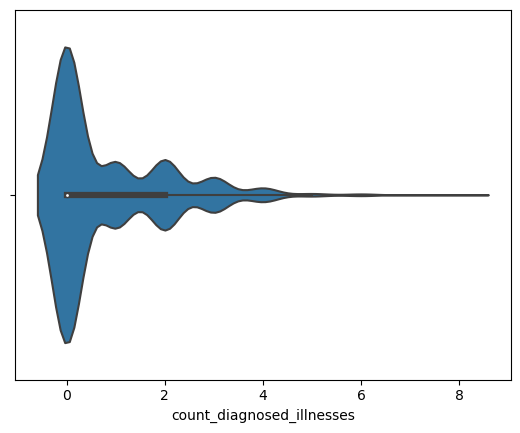

number of outliers in count_diagnosed_illnesses: 11


207    5
266    5
297    5
583    5
643    5
721    5
212    6
398    6
452    6
577    6
174    8
Name: count_diagnosed_illnesses, dtype: int64

In [32]:
# add a new variable indicating the number of diagnosed illnesses
def get_options_per_person(feature):
    """count the number of elements in lists that represent values of the feature
    
    :param feature: the feature for which the elements in the lists are to be counted ('pandas.core.series.Series')
    :return: a list of the number of elements in each list of the feature ('list')
    """
    
    return [str(val).count('|') + 1 if str(val) != 'nan' else 0 for val in feature.tolist()] 

df_v2['count_diagnosed_illnesses'] = get_options_per_person(df_v2['diagnosed_mental_illnesses'])

# show descriptive statistics for the new variable
print('Descriptive statistics\n', df_v2['count_diagnosed_illnesses'].describe())

# check the distribution of the variable and check for outliers
check_distribution('count_diagnosed_illnesses', df_v2)

Observations
* the data are positively skewed
* most individuals do not have a diagnosed illness
* there are slightly more individuals with two diagnosed illnesses than individuals with one diagnosed illness 
* there is one person who reported eight diagnosed illnesses
* all individuals with at least five illnesses are given as outliers, but this is not necessarily invalid and will be investigated later

Descriptive statistics
 count    1131.000000
mean        0.454465
std         1.007233
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: count_possible_illnesses, dtype: float64


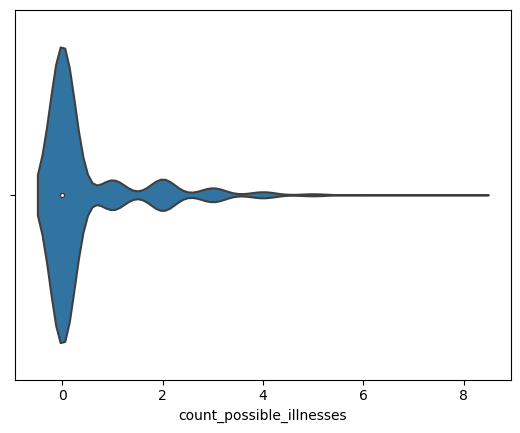

number of outliers in count_possible_illnesses: 26


167     4
1285    4
1249    4
1120    4
1067    4
965     4
893     4
804     4
755     4
1296    4
733     4
561     4
503     4
461     4
393     4
359     4
204     4
1339    4
730     5
466     5
821     5
346     5
1211    5
292     5
579     7
991     8
Name: count_possible_illnesses, dtype: int64

In [33]:
# add a new variable indicating the number of possible illnesses
df_v2['count_possible_illnesses'] = get_options_per_person(df_v2['possible_mental_illness'])

# show descriptive statistics for the new variable
print('Descriptive statistics\n', df_v2['count_possible_illnesses'].describe())

# check the distribution of the variable and check for outliers
check_distribution('count_possible_illnesses', df_v2)

Observations
* again, the data are positively skewed 
* most individuals did not indicate possible diagnoses 
* again, there are more individuals who have indicated two diagnoses than one 
* as with the diagnosed illness feature, there is one person who has indicated eight possible diagnoses
* there is also one person who has indicated seven possible illnesses
* all individuals with at least four possible illnesses are given as outliers (26 outliers), but this is not necessarily invalid and will be investigated later

Descriptive statistics
 count    1131.000000
mean        0.883289
std         1.102930
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         6.000000
Name: count_prof_diagnoses, dtype: float64


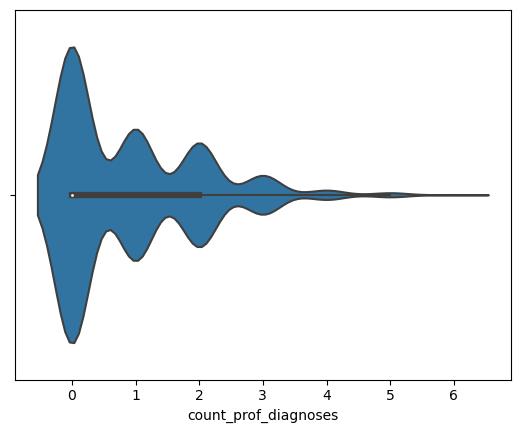

number of outliers in count_prof_diagnoses: 9


247     5
252     5
297     5
407     5
583     5
606     5
643     5
1259    5
212     6
Name: count_prof_diagnoses, dtype: int64

In [34]:
# add a new variable indicating the number of professional diagnoses
df_v2['count_prof_diagnoses'] = get_options_per_person(df_v2['diagnoses_by_professional'])

# show descriptive statistics for the new variable
print('Descriptive statistics\n', df_v2['count_prof_diagnoses'].describe())

# check the distribution of the variable and check for outliers
check_distribution('count_prof_diagnoses', df_v2)

Observation
* again, the data are positively skewed 
* most individuals did not report professional diagnoses 
* more individuals indicated one diagnoses than two  
* all individuals with at least five professional diagnoses are given as outliers (nine outliers), but this is not necessarily invalid and will be investigated later
* no individual indicated more than six professional diagnoses

In [35]:
# transform the multiple select question into several single features
# add a prefix to be able to associate the variables with the original variables
# truly missing values will be later recoded as missing (during the data validity checks) 
df_illnesses = df_v2['diagnosed_mental_illnesses'].str.get_dummies().add_prefix('(1) ')
df_poss_illnesses = df_v2['possible_mental_illness'].str.get_dummies().add_prefix('(2) ')
df_prof_diagnoses = df_v2['diagnoses_by_professional'].str.get_dummies().add_prefix('(3) ')

# merge all three datasets 
df_illness_all = pd.concat([df_illnesses, df_poss_illnesses, df_prof_diagnoses], axis=1)

In [36]:
# add all variables to the df_v2 dataset
print('shape before variable addition:', df_v2.shape)
df_v3 = pd.concat([df_v2, df_illness_all], axis=1).copy()
print('shape after variable addition:', df_v3.shape)

shape before variable addition: (1131, 66)
shape after variable addition: (1131, 139)


In [37]:
# remove original variables that were encoded 
df_v3.drop(['diagnosed_mental_illnesses', 'possible_mental_illness', 'diagnoses_by_professional'], axis=1, inplace=True)
df_v3.shape

(1131, 136)

##### Country (Working & Living)

value counts of country_live :


count   percent
United States of America    695  0.614500
United Kingdom              134  0.118479
Canada                       63  0.055703
Germany                      43  0.038019
Netherlands                  31  0.027409
Australia                    26  0.022989
Sweden                       14  0.012378
France                       11  0.009726
Ireland                      10  0.008842
Brazil                        9  0.007958
Russia                        9  0.007958
India                         7  0.006189
Bulgaria                      6  0.005305
New Zealand                   6  0.005305
Switzerland                   6  0.005305
Italy                         5  0.004421
Finland                       5  0.004421
Denmark                       5  0.004421
South Africa                  4  0.003537
Chile                         3  0.002653
Norway                        3  0.002653
Spain                         3  0.002653
Belgium                       3  0.002653
Pakistan                      3  0.002653
Israel                        2  0.001768
Bosnia and Herzegovina        2  0.001768
Poland                        2  0.001768
Romania                       2  0.001768
Afghanistan                   2  0.001768
Estonia                       2  0.001768
Colombia                      2  0.001768
Mexico                        2  0.001768
Bangladesh                    1  0.000884
Slovakia                      1  0.000884
Vietnam                       1  0.000884
Other                         1  0.000884
Iran                          1  0.000884
Hungary                       1  0.000884
Japan                         1  0.000884
Ecuador                       1  0.000884
Argentina                     1  0.000884
Austria                       1  0.000884
Czech Republic                1  0.000884

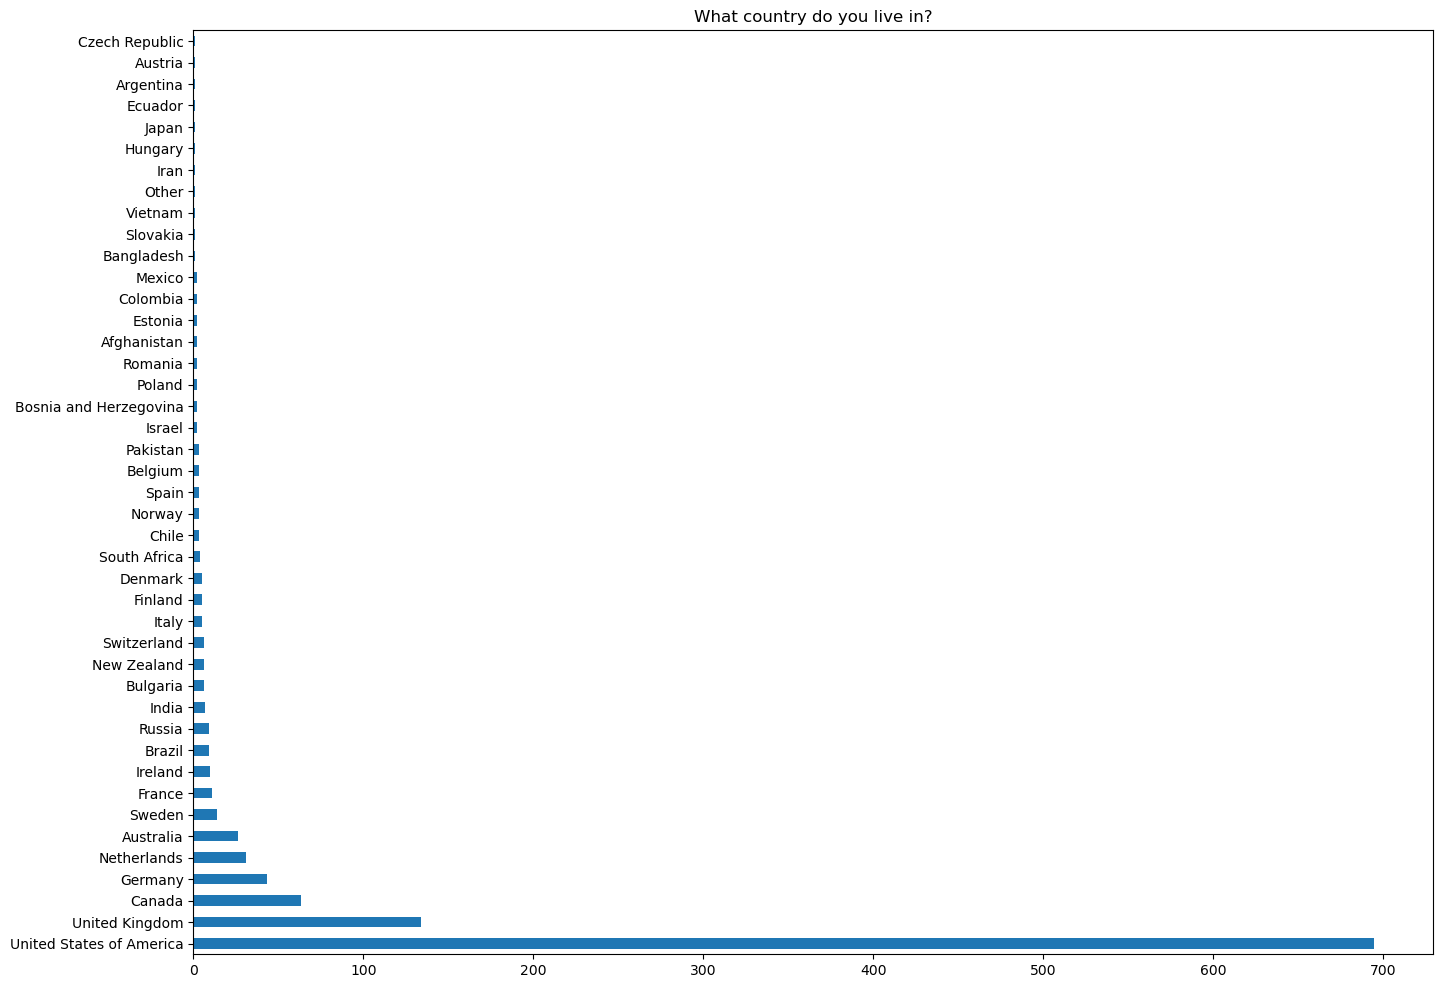

In [38]:
# explore where most individuals live 
f.explore_feature(df_v3['country_live'], fig_size = (16,12))

Observations
* by far the most individuals live in the US
* second and third are the United Kingdom and Canada 

value counts of country_work :


count   percent
United States of America    702  0.620690
United Kingdom              133  0.117595
Canada                       61  0.053935
Germany                      43  0.038019
Netherlands                  31  0.027409
Australia                    26  0.022989
Sweden                       15  0.013263
France                       11  0.009726
Ireland                      10  0.008842
Russia                        9  0.007958
Brazil                        9  0.007958
India                         7  0.006189
Switzerland                   6  0.005305
New Zealand                   6  0.005305
Bulgaria                      6  0.005305
Denmark                       5  0.004421
Finland                       5  0.004421
South Africa                  4  0.003537
Chile                         3  0.002653
Norway                        3  0.002653
Italy                         3  0.002653
Belgium                       3  0.002653
Bosnia and Herzegovina        2  0.001768
Israel                        2  0.001768
Poland                        2  0.001768
Pakistan                      2  0.001768
Estonia                       2  0.001768
Mexico                        2  0.001768
Spain                         2  0.001768
Colombia                      2  0.001768
Slovakia                      1  0.000884
Romania                       1  0.000884
Austria                       1  0.000884
United Arab Emirates          1  0.000884
Ecuador                       1  0.000884
Japan                         1  0.000884
Hungary                       1  0.000884
Bangladesh                    1  0.000884
Iran                          1  0.000884
Other                         1  0.000884
Argentina                     1  0.000884
Afghanistan                   1  0.000884
Vietnam                       1  0.000884
Czech Republic                1  0.000884

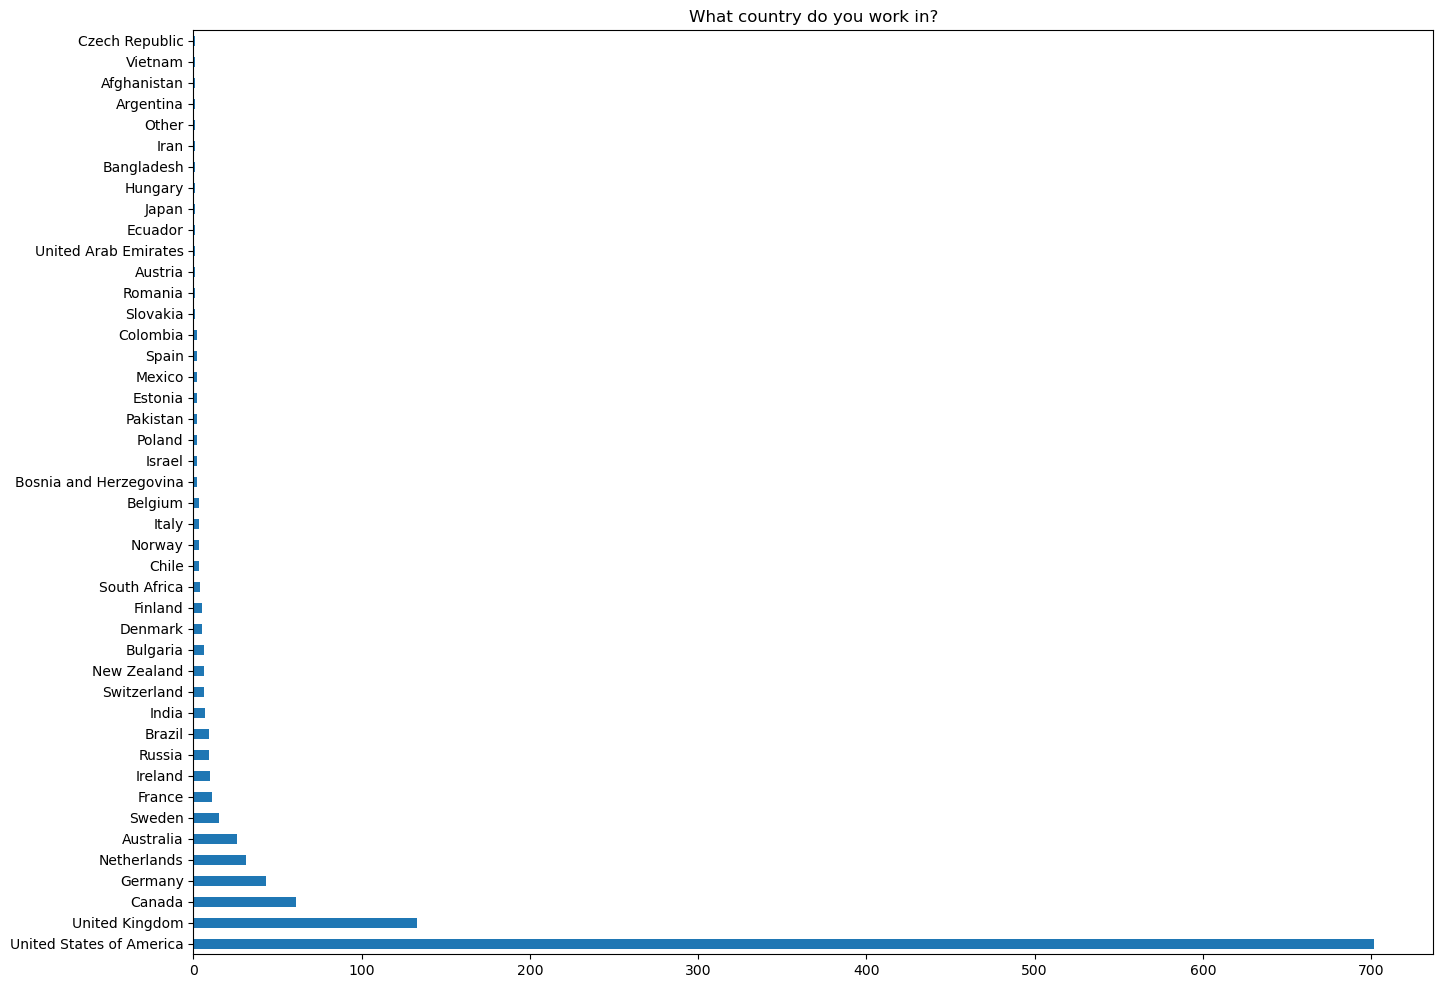

In [39]:
# explore where most individuals work
f.explore_feature(df_v3['country_work'], fig_size = (16,12))

Observations
* there are even more individuals working in the US than living there
* as with the country_live feature, the United Kingdom and Canada are in second and third place

##### US State (Living & Working)

value counts of US_state_live :


count   percent
NaN                     436  0.385500
California              106  0.093722
Illinois                 47  0.041556
Michigan                 43  0.038019
Minnesota                37  0.032714
Texas                    36  0.031830
Washington               35  0.030946
New York                 35  0.030946
Pennsylvania             30  0.026525
Oregon                   28  0.024757
Tennessee                27  0.023873
Colorado                 21  0.018568
North Carolina           20  0.017683
Ohio                     19  0.016799
Massachusetts            18  0.015915
Indiana                  18  0.015915
Florida                  17  0.015031
Virginia                 15  0.013263
Maryland                 13  0.011494
Oklahoma                 12  0.010610
Kansas                   12  0.010610
Georgia                  11  0.009726
Missouri                 10  0.008842
Nebraska                 10  0.008842
Wisconsin                 8  0.007073
Utah                      6  0.005305
New Hampshire             5  0.004421
New Jersey                5  0.004421
Iowa                      5  0.004421
Maine                     5  0.004421
Arizona                   4  0.003537
Alabama                   4  0.003537
Connecticut               3  0.002653
Idaho                     3  0.002653
Rhode Island              3  0.002653
North Dakota              3  0.002653
Vermont                   3  0.002653
South Dakota              3  0.002653
Kentucky                  2  0.001768
Nevada                    2  0.001768
Louisiana                 2  0.001768
District of Columbia      2  0.001768
Alaska                    2  0.001768
West Virginia             1  0.000884
South Carolina            1  0.000884
Montana                   1  0.000884
Delaware                  1  0.000884
New Mexico                1  0.000884

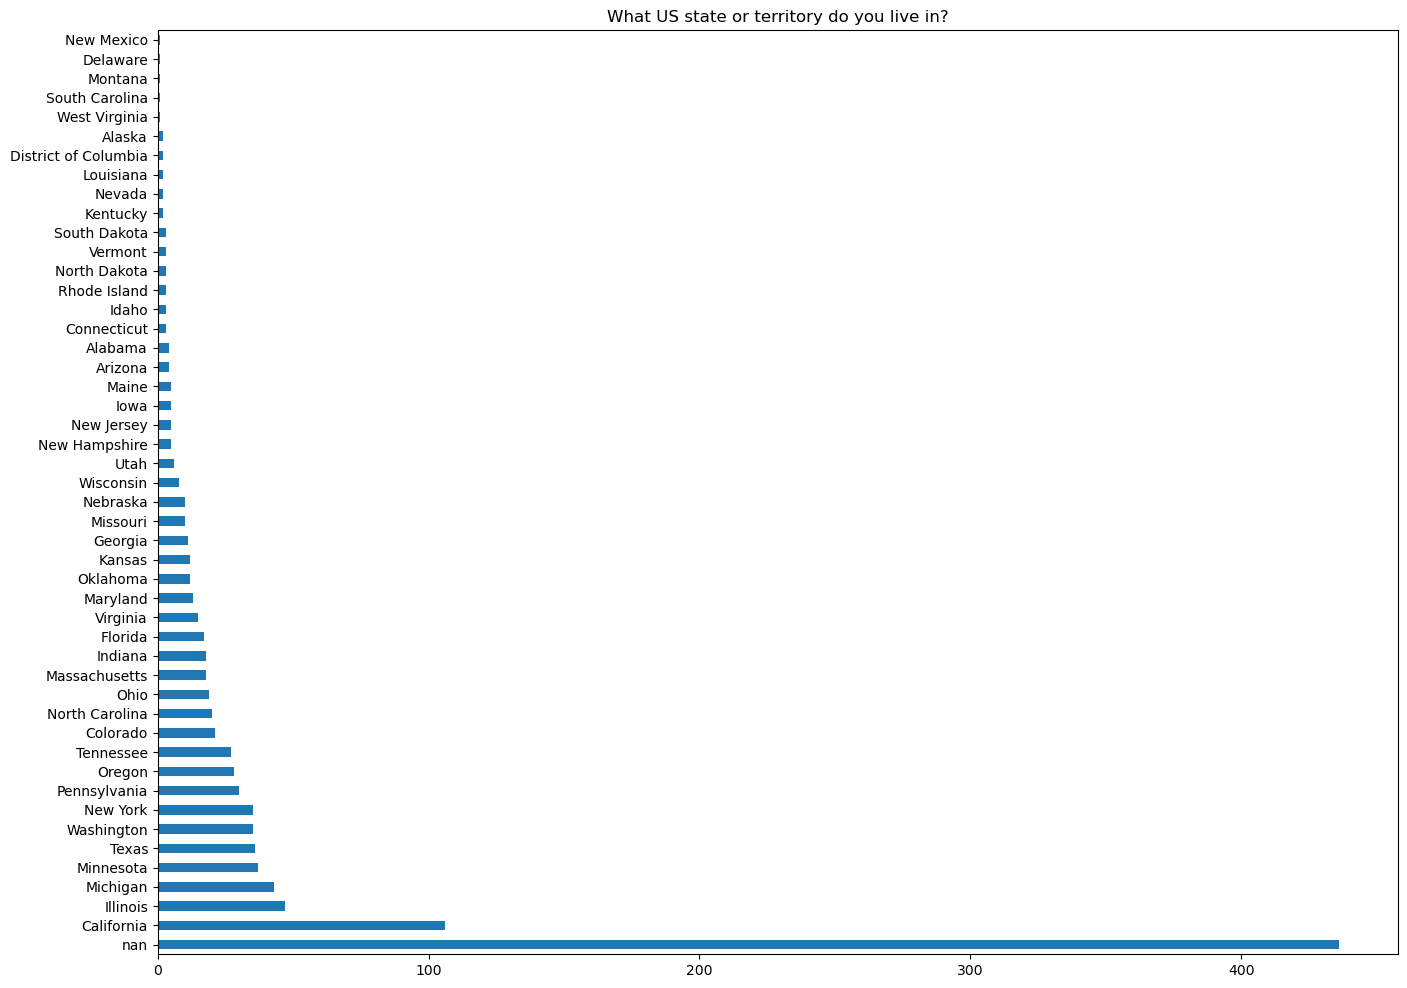

In [40]:
# explore in which state individuals live in the US 
f.explore_feature(df_v3['US_state_live'], fig_size = (16,12))

Observations
* there are 436 missing values, corresponding to the 1131-695 = 436 individuals not living in the US
* most individuals live in California, followed by Illinois and Michigan 

value counts of US_state_work :


count   percent
NaN                     429  0.379310
California              116  0.102564
Illinois                 48  0.042440
Michigan                 42  0.037135
New York                 38  0.033599
Minnesota                37  0.032714
Texas                    37  0.032714
Washington               33  0.029178
Pennsylvania             29  0.025641
Tennessee                28  0.024757
Oregon                   25  0.022104
Colorado                 21  0.018568
Massachusetts            20  0.017683
North Carolina           20  0.017683
Ohio                     18  0.015915
Indiana                  18  0.015915
Florida                  16  0.014147
Oklahoma                 13  0.011494
Virginia                 13  0.011494
Kansas                   12  0.010610
Maryland                 11  0.009726
Georgia                  11  0.009726
Nebraska                 10  0.008842
Wisconsin                 9  0.007958
Missouri                  8  0.007073
District of Columbia      6  0.005305
New Jersey                6  0.005305
Utah                      6  0.005305
Iowa                      5  0.004421
Arizona                   5  0.004421
Alabama                   4  0.003537
Maine                     4  0.003537
New Hampshire             3  0.002653
Vermont                   3  0.002653
South Dakota              3  0.002653
North Dakota              3  0.002653
Connecticut               3  0.002653
Nevada                    2  0.001768
Rhode Island              2  0.001768
Kentucky                  2  0.001768
Louisiana                 2  0.001768
Idaho                     2  0.001768
Alaska                    2  0.001768
Hawaii                    1  0.000884
West Virginia             1  0.000884
South Carolina            1  0.000884
Montana                   1  0.000884
Delaware                  1  0.000884
New Mexico                1  0.000884

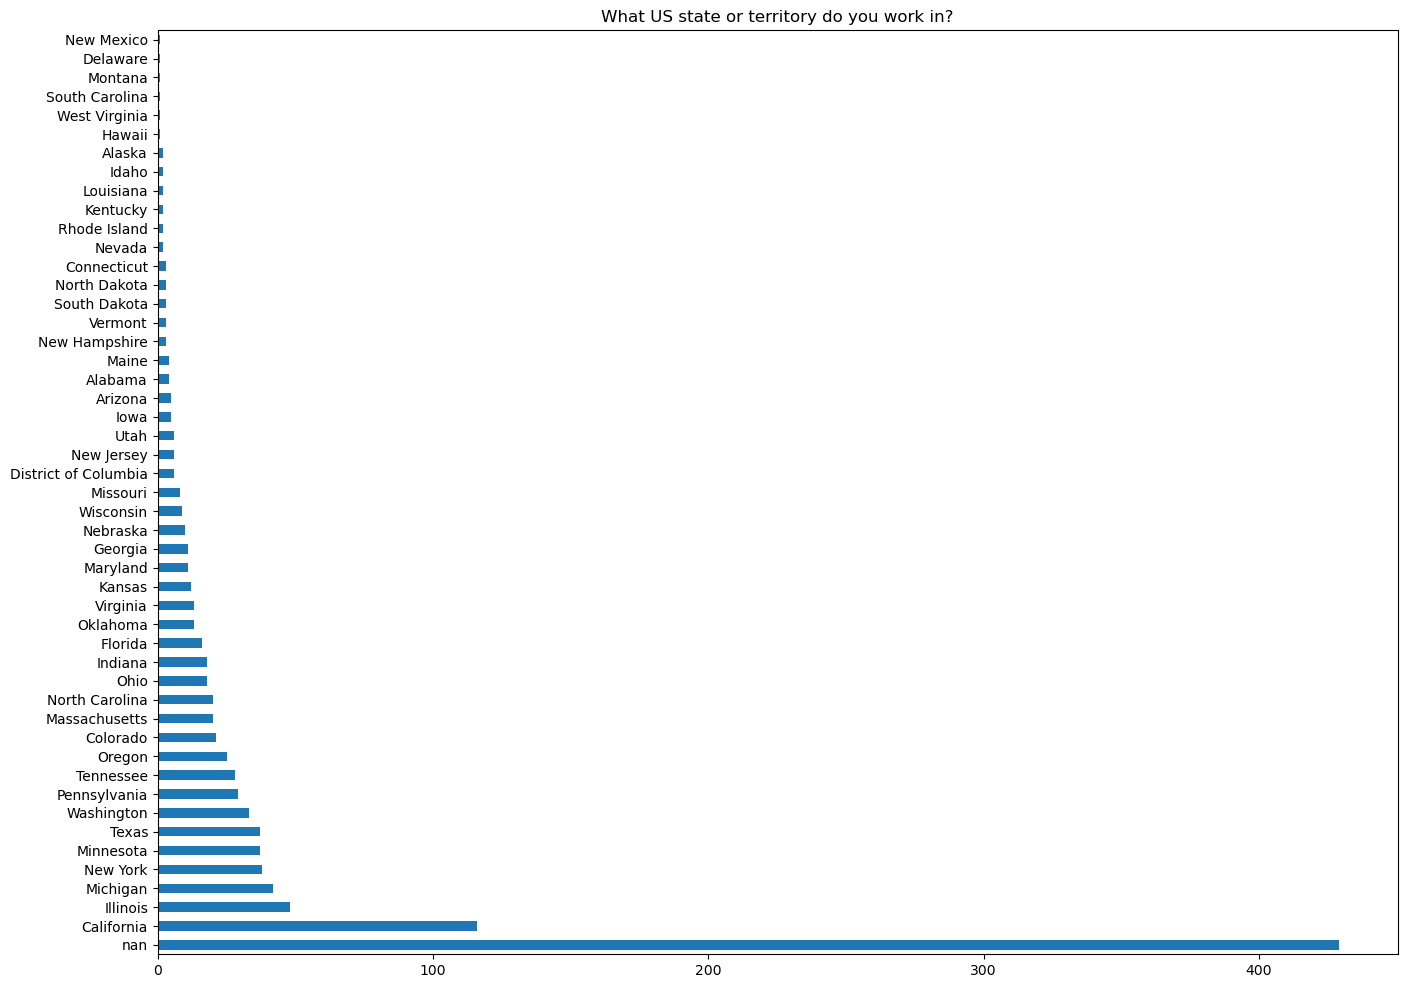

In [41]:
# explore in which state individuals work in the US 
f.explore_feature(df_v3['US_state_work'], fig_size = (16,12))

Observations
* there are 429 missing values, corresponding to the 1131-702 = 429 individuals not working in the USA 
* most individuals work in California, followed by Illinois and Michigan

##### Work Positions

In [42]:
# look at the first 20 unique values of the work positions variable 
unique_work_positions = df_v3['current_work_position'].unique().tolist()
print(unique_work_positions[:20])

['Back-end Developer', 'Back-end Developer|Front-end Developer', 'Executive Leadership|Supervisor/Team Lead|Dev Evangelist/Advocate|DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer', 'DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer|Designer', 'Dev Evangelist/Advocate|Back-end Developer', 'Support|Back-end Developer|One-person shop', 'Front-end Developer', 'Executive Leadership', 'Supervisor/Team Lead|Dev Evangelist/Advocate|Back-end Developer|Front-end Developer', 'DevOps/SysAdmin|Back-end Developer|Front-end Developer', 'Designer', 'Other|Executive Leadership', 'Other', 'Supervisor/Team Lead|Support|Back-end Developer', 'Supervisor/Team Lead|DevOps/SysAdmin|Back-end Developer', 'Other|Supervisor/Team Lead|Support|Back-end Developer|Designer', 'Supervisor/Team Lead|Back-end Developer', 'One-person shop|Front-end Developer|Back-end Developer|Dev Evangelist/Advocate|Other', 'Supervisor/Team Lead|DevOps/SysAdmin|Support|Back-end Developer', 'Executive Leadersh

Observations
* as with the diagnoses features, it was most likely possible to select more than one current work position 

value counts of current_work_position :


count   percent
Back-end Developer         599  0.302678
Front-end Developer        397  0.200606
Supervisor/Team Lead       226  0.114199
DevOps/SysAdmin            223  0.112683
Other                      140  0.070743
Support                    125  0.063163
Designer                    86  0.043456
Dev Evangelist/Advocate     82  0.041435
Executive Leadership        59  0.029813
One-person shop             23  0.011622
Sales                       10  0.005053
HR                           9  0.004548

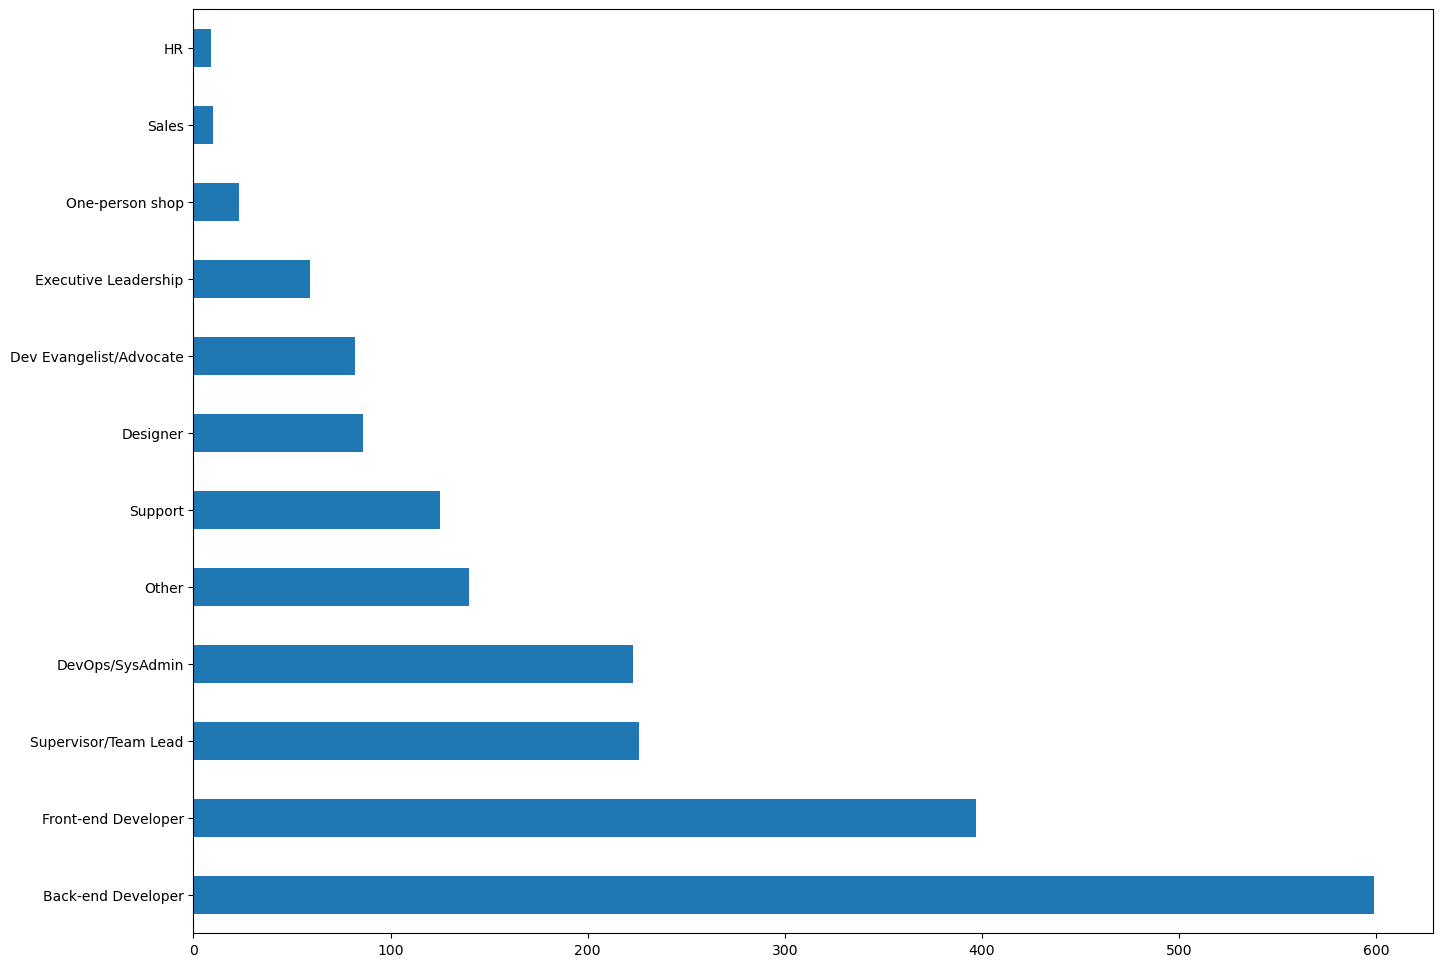

In [43]:
# display how many individuals have chosen each option
f.n_per_option(df_v3, 'current_work_position')

Observations
* most individuals reported working as back-end developers, followed by front-end developers and supervisors/team leads
* as the "other" category indicates, participants could not enter other work positions 

Descriptive statistics
 count    1131.000000
mean        1.749779
std         1.162157
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: count_work_positions, dtype: float64


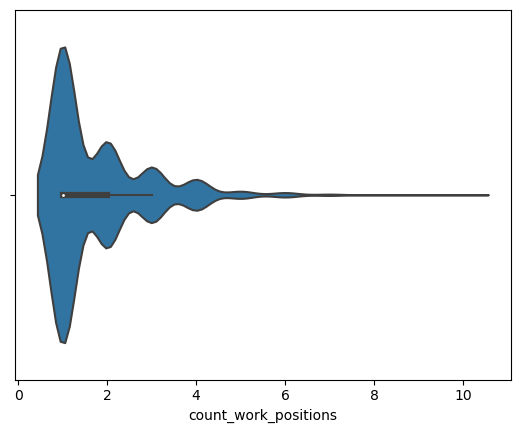

number of outliers in count_work_positions: 16


140      6
276      6
533      6
648      6
822      6
911      6
935      6
1161     6
1319     6
1406     6
4        7
598      7
851      7
1111     8
807      9
577     10
Name: count_work_positions, dtype: int64

In [44]:
# add a new variable indicating the number of work positions
df_v3['count_work_positions'] = get_options_per_person(df_v3['current_work_position'])

# show descriptive statistics for the new variable
print('Descriptive statistics\n', df_v3['count_work_positions'].describe())

# check the distribution of the variable and check for outliers
check_distribution('count_work_positions', df_v3)

Observations
* as the other count data, the data are positively skewed
* all individuals with at least six work positions are given as outliers (16 outliers), but this is not necessarily invalid and will be investigated later 

In [45]:
# transform the multiple select question into several single features
# add a prefix for easy reference later 
df_positions = df_v3['current_work_position'].str.get_dummies().add_prefix('(CW) ')

# merge the two datasets
print('shape before variable addition:', df_v3.shape)
df_v4 = pd.concat([df_v3, df_positions], axis=1).copy()
print('shape after variable addition:', df_v4.shape)

shape before variable addition: (1131, 137)
shape after variable addition: (1131, 149)


In [46]:
# remove the original feature
df_v4.drop(['current_work_position'], axis=1, inplace=True)
df_v4.shape

(1131, 148)

### 3.2 Data Types, Missing Values, "Don't Know" and "Not Applicable" Responses

In [47]:
# create a data dictionary for all variables to see at a glance the number of missing values, dk and n/a responses
data_dict = f.create_data_dict(df_v4)
display(data_dict)

variable  \
0                                        self_employed   
1                                          N_employees   
2                                        tech_employer   
3                                            tech_role   
4                                 employer_mh_benefits   
5                            employer_mh_options_known   
6                       employer_mh_formally_discussed   
7                       employer_mh_ressources_offered   
8                       employer_anonymity_mh_benefits   
9                          difficulty_asking_for_leave   
10          employer_neg_conseq_mh_disclosure_expected   
11    employer_neg_conseq_physical_disclosure_expected   
12                  mh_disclosure_coworker_comfortable   
13                mh_disclosure_supervisor_comfortable   
14                    seriousness_mh_physical_employer   
15          neg_conseq_coworker_mh_disclosure_employer   
16                               mh_treatment_coverage   
17                            local_resources_mh_known   
18                               mh_disclosure_clients   
19                    mh_disclosure_clients_neg_impact   
20                              mh_disclosure_coworker   
21                   mh_disclosure_coworker_neg_impact   
22                           mh_effect_on_productivity   
23                   mh_effect_on_productivity_percent   
24                                      prev_employers   
25                          prev_employers_mh_benefits   
26                     prev_employers_mh_options_known   
27                prev_employers_mh_formally_discussed   
28                prev_employers_mh_ressources_offered   
29                 prev_employer_anonymity_mh_benefits   
30    prev_employers_neg_conseq_mh_disclosure_expected   
31   prev_employers_neg_conseq_physical_disclosure_...   
32            mh_disclosure_prev_coworkers_comfortable   
33           mh_disclosure_prev_supervisor_comfortable   
34              seriousness_mh_physical_prev_employers   
35    neg_conseq_coworker_mh_disclosure_prev_employers   
36           willingness_physical_disclosure_interview   
37    reason_willingness_physical_disclosure_interview   
38                 willingness_mh_disclosure_interview   
39          reason_willingness_mh_disclosure_interview   
40            mh_disclosure_expected_neg_effect_career   
41           mh_disclosure_expected_neg_view_coworkers   
42                    willingness_mh_disclosure_family   
43                    mh_neg_effect_workplace_observed   
44                     effect_neg_conseq_mh_disclosure   
45                       family_history_mental_illness   
46                            self_mental_illness_past   
47                         self_mental_illness_present   
48                           diagnosed_by_professional   
49                              mental_illness_treated   
50                             neg_effect_work_treated   
51                         neg_effect_work_not_treated   
52                                                 age   
53                                              gender   
54                                        country_live   
55                                       US_state_live   
56                                        country_work   
57                                       US_state_work   
58                                       work_remotely   
59                           count_diagnosed_illnesses   
60                            count_possible_illnesses   
61                                count_prof_diagnoses   
62                         (1) ADD (w/o Hyperactivity)   
63                              (1) Addictive Disorder   
64   (1) Anxiety Disorder (Generalized, Social, Pho...   
65                                        (1) Asperges   
66        (1) Attention Deficit Hyperactivity Disorder   
67                                          (1) Autism   
68                             (1) Autism (A

#### 3.2.1 Data Types

value counts of data_types :


count   percent
nominal    117  0.790541
ordinal     26  0.175676
ratio        5  0.033784

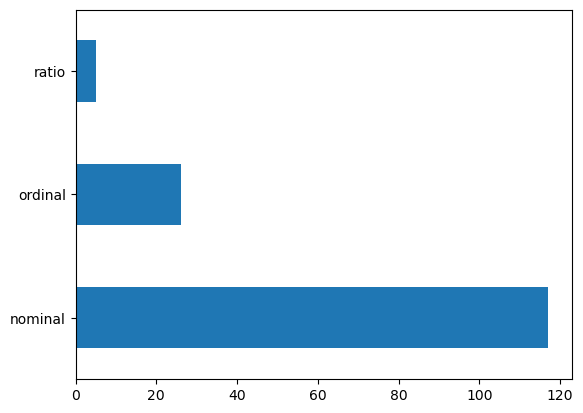

In [48]:
# display value counts of the variables' data types
f.explore_feature(data_dict['data_types'], original=False)

Observations
* the scale of most variables is nominal, followed by ordinal 

#### 3.2.2 Missing Values

In [49]:
# display descriptive statistics for missing values
f.missing_statistics(df_v4)

Number of variables with missing values:
29

Descriptive statistics of percent missing values per column:
count    148.000000
mean       0.080920
std        0.240534
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: missing_percent, dtype: float64

Descriptive statistics of missing values per row:


count    1131.000000
mean       11.976127
std         3.968945
min         8.000000
25%         9.500000
50%        11.000000
75%        12.000000
max        26.000000
dtype: float64

Observations
* in 29 variables, at least one value is missing
* on average, 8% of a variable's values are missing (SD = 24%, median = 0%)
* there is at least one variable with 100% missing values
* on average, each respondent has 12 missing values (SD = 3.97, median = 11)
* no respondent has answered all questions
* at least one respondent has missing values in 26 variables

#### 3.2.3 Don't Know Responses

In [50]:
# display descriptive statistics for dk responses 
df_dk = f.define_as_missings(df_v4, 'dk')
f.missing_statistics(df_dk, 'dk')

Number of variables with dk values:
15

Descriptive statistics of percent dk values per column:
count    148.000000
mean       0.023216
std        0.092077
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.650752
Name: dk_percent, dtype: float64

Descriptive statistics of dk values per row:


count    1131.000000
mean        3.435897
std         2.149728
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        11.000000
dtype: float64

Observations
* 15 questions offered a dk response option 
* on average, each variable has 2% dk responses (SD = 9%, median = 0%)
* on average, each respondent selected the dk response 3.44 times (SD = 2.15, median = 3) with a maximum of 11 dk responses 
* there are individuals who never selected a dk option

#### 3.2.4 Not Applicable Responses

In [51]:
# display descriptive statistics for n/a responses
df_not_app = f.define_as_missings(df_v4, 'n/a')
f.missing_statistics(df_not_app, 'n/a')

Number of variables with n/a values:
4

Descriptive statistics of percent n/a values per column:
count    148.000000
mean       0.005891
std        0.043132
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.396110
Name: n/a_percent, dtype: float64

Descriptive statistics of n/a values per row:


count    1131.000000
mean        0.871795
std         1.074405
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         4.000000
dtype: float64

Observations
* there are four variables with n/a responses
* two of these four variables have 33% and 40% n/a responses
* on average, each respondent selected the n/a response 0.87 times (SD = 1.07, median = 0) with a maximum of four times

### 3.3 Data Validity Checks

#### 3.3.1 Indicated Diagnoses

Overview
* provide a better picture of what the three variables that capture individuals' diagnoses are measuring 
    * the first two variables are in close proximity to the question about current mental health disorders, so it may be possible that they measure current (possible) diagnoses
    * however, the first and the third variables are formulated in past tense, only the second variable measuring possible diagnoses uses present tense
* check whether the information provided by individuals about their mental disorders is consistent
* identify inconsistent datasets

value counts of None :


0   percent
 0  814  0.719717
-1  109  0.096375
 1   86  0.076039
-2   57  0.050398
 2   25  0.022104
-3   20  0.017683
 3    9  0.007958
 4    6  0.005305
 6    2  0.001768
-5    1  0.000884
 5    1  0.000884
-4    1  0.000884

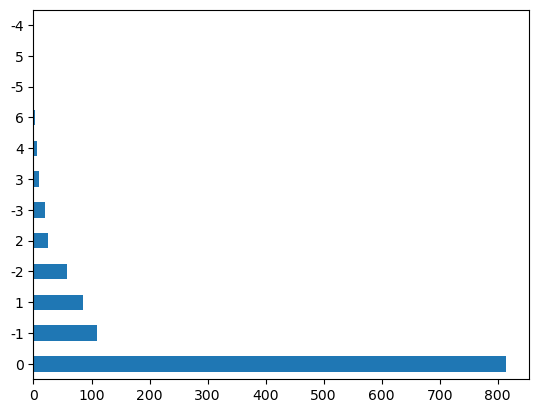

In [52]:
# check whether the diagnosed_mental_illnesses and the diagnoses_by_professional were answered in the same way
diff_no = df_v4['count_diagnosed_illnesses'] - df_v4['count_prof_diagnoses']
f.explore_feature(diff_no, original=False)

Observations
* 72% reported the same number of diagnoses for both questions, so they may have answered them in the same way
* 28% consequently did not answer both questions in the same way 
* there are 11 individuals with a difference of more than four diagnoses

In [53]:
# check the association between reporting a diagnosis and answering the question about whether one currently suffers from mental disorders

# create variables that indicate whether individuals reported at least one diagnosis for the three variables
df_v4['diag_indicated'] = [0 if val==0 else 1 for val in df_v4['count_diagnosed_illnesses'].tolist()]
df_v4['prof_diag_indicated'] = [0 if val==0 else 1 for val in df_v4['count_prof_diagnoses'].tolist()]
df_v4['poss_diag_indicated'] = [0 if val==0 else 1 for val in df_v4['count_possible_illnesses'].tolist()]

# create datasets that are grouped by the just created variables
df_group_diag = df_v4.groupby('diag_indicated', dropna=False)
df_group_prof_diag = df_v4.groupby('prof_diag_indicated', dropna=False)
df_group_poss_diag = df_v4.groupby('poss_diag_indicated', dropna=False)

def show_value_counts_diag_groups(col):
    """show for the diagnosis groups which values they have specified in col
    
    :param col: a column for which the value counts are to be shown ('str')
    """
    
    display(df_group_diag[col].value_counts())
    display(df_group_prof_diag[col].value_counts())
    display(df_group_poss_diag[col].value_counts())
    
show_value_counts_diag_groups('self_mental_illness_present')

diag_indicated  self_mental_illness_present
0               No                             435
                Maybe                          251
                Yes                              6
1               Yes                            439
Name: self_mental_illness_present, dtype: int64

prof_diag_indicated  self_mental_illness_present
0                    No                             369
                     Maybe                          154
                     Yes                             51
1                    Yes                            394
                     Maybe                           97
                     No                              66
Name: self_mental_illness_present, dtype: int64

poss_diag_indicated  self_mental_illness_present
0                    Yes                            444
                     No                             435
                     Maybe                            4
1                    Maybe                          247
                     Yes                              1
Name: self_mental_illness_present, dtype: int64

Observations
* all 439 individuales who reported at least one diagnosis for the first variable also reported that they currently have a mental disorder, so it is very likely that this variable captures current mental disorders 
* however, six individuals who indicated that they currently have a mental health disorder, did not indicate a diagnosis, so values for the first variable are missing for these six individuals
* there is no clear pattern regarding professional diagnoses
* all individuals who reported a possible diagnosis, also reported "maybe" having a current mental health disorder, except for one individual who answered "yes" to the question about current mental health disorders (this is most likely the individual for whom the possible diagnosis "PTSD (undiagnosed)" was manually recoded)
* however, four individuals did not indicate a possible diagnosis, but reported "maybe" having a current mental health disorder
* it is likely that only individuals who answered "yes" to the question about current mental health disorders saw the first diagnosis variable and only individuals who answered "maybe" saw the second diagnosis variable

In [54]:
# display the mental health disorder data of the six individuals who did not indicate a current diagnosis, but reported to suffer from a mental health disorder currently  
index_no_diag = df_v4.index[(df_v4['count_diagnosed_illnesses'] == 0) & (df_v4['self_mental_illness_present'] == "Yes")]

display(f.display_mhd_data(index_no_diag, df_v4 , 'prof_diag'))

count_diagnosed_illnesses  count_possible_illnesses  \
164                           0                         0   
251                           0                         0   
574                           0                         0   
635                           0                         0   
905                           0                         0   
1059                          0                         0   

      count_prof_diagnoses self_mental_illness_present  \
164                      0                         Yes   
251                      1                         Yes   
574                      0                         Yes   
635                      3                         Yes   
905                      0                         Yes   
1059                     2                         Yes   

     self_mental_illness_past diagnosed_by_professional  \
164                       Yes                        No   
251                       Yes                       Yes   
574                       Yes                       Yes   
635                       Yes                       Yes   
905                       Yes                        No   
1059                      Yes                       Yes   

      (3) ADD (w/o Hyperactivity)  (3) Addictive Disorder  \
164                             0                       0   
251                             0                       0   
574                             0                       0   
635                             0                       0   
905                             0                       0   
1059                            0                       0   

      (3) Anxiety Disorder (Generalized, Social, Phobia, etc)  \
164                                                   0         
251                                                   0         
574                                                   0         
635                                                   1         
905                                                   0         
1059                                                  0         

      (3) Asperger Syndrome  (3) Attention Deficit Disorder  \
164                       0                               0   
251                       0                               0   
574                       0                               0   
635                       0                               0   
905                       0                               0   
1059                      0                               0   

      (3) Attention Deficit Hyperactivity Disorder  (3) Autism  \
164                                              0           0   
251                                              0           0   
574                                              0           0   
635                                              1           0   
905                                              0           0   
1059                                             1           0   

      (3) Autism (Asperger's)  \
164                         0   
251                         0   
574                         0   
635                         0   
905                         0   
1059                        0   

      (3) Autism - while not a "mental illness", still greatly affects how I handle anxiety  \
164                                                   0                                       
251                                                   0                                       
574                                                   0                                       
635                                                   0                                       
905                                                   0                                       
1059                                                  0                                       

      (3) Autism Spectrum Disorder  (3) Dissociative Disorder  \
164  

Observations
* three of the six individuals indicated that they have a professional diagnosis, the other three did not indicate any diagnoses
* since all individuals answered "yes" to both current and past mental disorders questions, it is not possible to infer current diagnoses, so values for current diagnoses are missing  

In [55]:
# add two columns to the current data frame indicating inconsistent data
df_v4['times_inconsistent'] = 0
df_v4['reason_inconsistent'] = ''

# code the six individuals as inconsistent
f.code_as_inconsistent(index_no_diag, 'currently ill without current diagnoses indicated |', df_v4)

In [56]:
# recode the values for these six individuals as missing for the current diagnoses
def recode_as_missing(indexes, columns, data):
    """ recode the values in certain columns for certain records as missing
    
    :param indexes:  the indexes of the records to be coded as missing ('pandas.core.indexes')
    :param columns:  the columns whose values are to be coded as missing ('list')
    :param data:  the data source ('pandas.core.frame.DataFrame')
    """
    
    for idx in indexes:
        for col in columns:
            data.at[idx, col] = np.nan

col_curr_diag = [col for col in df_v4.columns if '(1)' in col]
recode_as_missing(index_no_diag, col_curr_diag, df_v4)

In [57]:
# display the mental health disorder data of the four individuals who did not indicate a possible diagnosis, but reported to "maybe" suffer from a mental health disorder currently  
index_no_poss = df_v4.index[(df_v4['count_possible_illnesses'] == 0) & (df_v4['self_mental_illness_present'] == "Maybe")]
display(f.display_mhd_data(index_no_poss, df_v4 , 'curr_diag'))

count_diagnosed_illnesses  count_possible_illnesses  \
213                           0                         0   
714                           0                         0   
765                           0                         0   
1035                          0                         0   

      count_prof_diagnoses self_mental_illness_present  \
213                      0                       Maybe   
714                      0                       Maybe   
765                      0                       Maybe   
1035                     0                       Maybe   

     self_mental_illness_past diagnosed_by_professional  \
213                     Maybe                        No   
714                        No                        No   
765                     Maybe                        No   
1035                      Yes                        No   

      (1) ADD (w/o Hyperactivity)  (1) Addictive Disorder  \
213                           0.0                     0.0   
714                           0.0                     0.0   
765                           0.0                     0.0   
1035                          0.0                     0.0   

      (1) Anxiety Disorder (Generalized, Social, Phobia, etc)  (1) Asperges  \
213                                                 0.0                 0.0   
714                                                 0.0                 0.0   
765                                                 0.0                 0.0   
1035                                                0.0                 0.0   

      (1) Attention Deficit Hyperactivity Disorder  (1) Autism  \
213                                            0.0         0.0   
714                                            0.0         0.0   
765                                            0.0         0.0   
1035                                           0.0         0.0   

      (1) Autism (Asperger's)  (1) Autism Spectrum Disorder  \
213                       0.0                           0.0   
714                       0.0                           0.0   
765                       0.0                           0.0   
1035                      0.0                           0.0   

      (1) Autism spectrum disorder  (1) Dissociative Disorder  \
213                            0.0                        0.0   
714                            0.0                        0.0   
765                            0.0                        0.0   
1035                           0.0                        0.0   

      (1) Eating Disorder (Anorexia, Bulimia, etc)  \
213                                            0.0   
714                                            0.0   
765                                            0.0   
1035                                           0.0   

      (1) Mood Disorder (Depression, Bipolar Disorder, etc)  \
213                                                 0.0       
714                                                 0.0       
765                                                 0.0       
1035                                                0.0       

      (1) Obsessive-Compulsive Disorder  \
213                                 0.0   
714                                 0.0   
765                                 0.0   
1035                                0.0   

      (1) Personality Disorder (Borderline, Antisocial, Paranoid, etc)  \
213                                                 0.0                  
714                                                 0.0                  
765                                                 0.0                  
1035                                                0.0                  

      (1) Pervasive Developmental Disorder (Not Otherwise Specified)  \
213                                                 0.0                
714                                                 0.0                
765                                             

Observations
* Since the four individuals did not provide any diagnoses at all, the values for the possible diagnoses are recoded as missing

In [58]:
# code the four individuals as inconsistent
f.code_as_inconsistent(index_no_poss, 'maybe currently ill without possible diagnoses indicated |', df_v4)

In [59]:
# recode the zeros as missing values for these four individuals
col_poss_diag = [col for col in df_v4.columns if '(2)' in col]
recode_as_missing(index_no_poss, col_poss_diag, df_v4)

In [60]:
# look at the data of the one person that idicated a possible diagnosis but answered "yes" for the question on current mental disorders 
index_poss_current = df_v4.index[(df_v4['count_possible_illnesses'] > 0) & (df_v4['self_mental_illness_present'] == "Yes")]
display(f.display_mhd_data(index_poss_current, df_v4))

count_diagnosed_illnesses  count_possible_illnesses  \
446                          1                         1   

     count_prof_diagnoses self_mental_illness_present  \
446                     1                         Yes   

    self_mental_illness_past diagnosed_by_professional  \
446                      Yes                       Yes   

     (1) ADD (w/o Hyperactivity)  (1) Addictive Disorder  \
446                          0.0                     0.0   

     (1) Anxiety Disorder (Generalized, Social, Phobia, etc)  (1) Asperges  \
446                                                0.0                 0.0   

     (1) Attention Deficit Hyperactivity Disorder  (1) Autism  \
446                                           1.0         0.0   

     (1) Autism (Asperger's)  (1) Autism Spectrum Disorder  \
446                      0.0                           0.0   

     (1) Autism spectrum disorder  (1) Dissociative Disorder  \
446                           0.0                        0.0   

     (1) Eating Disorder (Anorexia, Bulimia, etc)  \
446                                           0.0   

     (1) Mood Disorder (Depression, Bipolar Disorder, etc)  \
446                                                0.0       

     (1) Obsessive-Compulsive Disorder  \
446                                0.0   

     (1) Personality Disorder (Borderline, Antisocial, Paranoid, etc)  \
446                                                0.0                  

     (1) Pervasive Developmental Disorder (Not Otherwise Specified)  \
446                                                0.0                

     (1) Post-traumatic Stress Disorder  \
446                                 0.0   

     (1) Psychotic Disorder (Schizophrenia, Schizoaffective, etc)  \
446                                                0.0              

     (1) Schizotypal Personality Disorder  (1) Seasonal Affective Disorder  \
446                                   0.0                              0.0   

     (1) Sexual addiction  (1) Sleeping Disorder  \
446                   0.0                    0.0   

     (1) Stress Response Syndromes  (1) Substance Use Disorder  \
446                            0.0                         0.0   

     (1) Transgender  (1) Traumatic Brain Injury  (2) Addictive Disorder  \
446              0.0                         0.0                     0.0   

     (2) Anxiety Disorder (Generalized, Social, Phobia, etc)  \
446                                                0.0         

     (2) Asperger Syndrome  (2) Asperger's  \
446                    0.0             0.0   

     (2) Attention Deficit Hyperactivity Disorder  (2) Autism  \
446                                           0.0         0.0   

     (2) Depersonalisation  (2) Dissociative Disorder  \
446                    0.0                        0.0   

     (2) Eating Disorder (Anorexia, Bulimia, etc)  \
446                                           0.0   

     (2) Gender Identity Disorder  \
446                           0.0   

     (2) Mood Disorder (Depression, Bipolar Disorder, etc)  \
446                                                0.0       

     (2) Obsessive-Compulsive Disorder  \
446                                0.0   

     (2) Personality Disorder (Borderline, Antisocial, Paranoid, etc)  \
446                                                0.0                  

     (2) Post-traumatic Stress Disorder  \
446                                 1.0   

     (2) Psychotic Disorder (Schizophrenia, Schizoaffective, etc)  \
446                                                0.0              

     (2) Stress Response Syndromes  (2) Substance Use Disorder  \
446                            0.0                         0.0   

     (2) Suicidal Ideation  (2) Tinnitus  (2) depersonalization disorder  \
446                    0.0           0.0                             0.0   

     (2) post-partum / anxiety  (3) ADD (w/o Hyperactivity)  \
446                       

Observation
* as expected, this is the person that was manually recoded because they reported "PTSD undiagnosed" on the first diagnosis variable

In [61]:
# check the association between reporting a diagnosis and answering the question about whether one has suffered from mental disorders in the past
show_value_counts_diag_groups('self_mental_illness_past')

diag_indicated  self_mental_illness_past
0               No                          344
                Yes                         182
                Maybe                       166
1               Yes                         396
                No                           27
                Maybe                        16
Name: self_mental_illness_past, dtype: int64

prof_diag_indicated  self_mental_illness_past
0                    No                          348
                     Maybe                       143
                     Yes                          83
1                    Yes                         495
                     Maybe                        39
                     No                           23
Name: self_mental_illness_past, dtype: int64

poss_diag_indicated  self_mental_illness_past
0                    Yes                         481
                     No                          333
                     Maybe                        69
1                    Maybe                       113
                     Yes                          97
                     No                           38
Name: self_mental_illness_past, dtype: int64

Observations
* unlike current mental disorders, past mental disorders do not show a clear pattern as a function of diagnosis groups

value counts of mhd_anytime :


count   percent
Yes      621  0.549072
No       305  0.269673
Maybe    205  0.181256

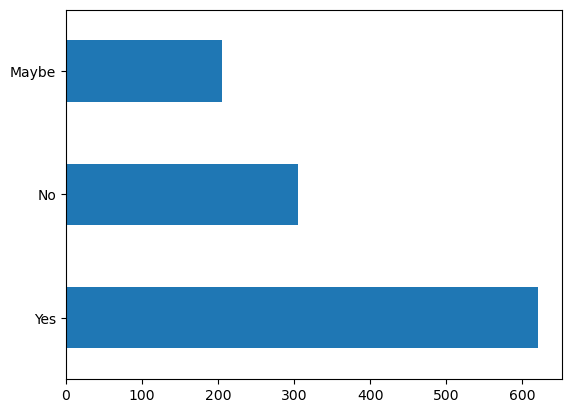

In [62]:
# combine the information about current and pastmental health disorders into a new variable that indicates whether someone had a mental disorder at some point in their life 
curr_mhd = df_v4['self_mental_illness_present']
past_mhd = df_v4['self_mental_illness_past']

mhd_conditions_options = [
    (curr_mhd == 'Yes') | (past_mhd == 'Yes'),
    (curr_mhd == 'No') & (past_mhd == 'No'),
    (curr_mhd == 'Maybe') & (past_mhd == 'Maybe'),
    (curr_mhd == 'Maybe') & (past_mhd == 'No'),
    (curr_mhd == 'No') & (past_mhd == 'Maybe')
]

mhd_values_options = ['Yes', 'No', 'Maybe', 'Maybe', 'Maybe']

df_v4['mhd_anytime'] = np.select(mhd_conditions_options, mhd_values_options)
f.explore_feature(df_v4['mhd_anytime'], original=False)

Observations
* more than half (55%) of the respondents reported having either currently and/or previously had a mental disorder
* only 27% answered "no" to both questions 

In [63]:
# check the correspondence of indicating a diagnosis and indicating having had a mental health disorder at some point in time
show_value_counts_diag_groups('mhd_anytime')

diag_indicated  mhd_anytime
0               No             305
                Maybe          205
                Yes            182
1               Yes            439
Name: mhd_anytime, dtype: int64

prof_diag_indicated  mhd_anytime
0                    No             304
                     Maybe          176
                     Yes             94
1                    Yes            527
                     Maybe           29
                     No               1
Name: mhd_anytime, dtype: int64

poss_diag_indicated  mhd_anytime
0                    Yes            524
                     No             305
                     Maybe           54
1                    Maybe          151
                     Yes             97
Name: mhd_anytime, dtype: int64

Observations
* 182 individuals have had a mental health disorder at some point in time, but did not report a diagnosis for the first variable
* 54 individuals have suspected a mental health disorder, but did not indicate a possible disorder
* almost all individuals (except 30) who indicated a professional diagnosis have had a mental disorder at some point in time
* however, 94 individuals have also had a mental health disorder at some point in time but did not indicate a professional diagnosis
* the professional diagnosis variable thus also includes past mental health disorders

In [64]:
# code the 30 individuals who never had a mental disorder but reported a professional diagnosis as inconsistent 
# (if someone received a diagnosis from a medical professional, they definitely had a mental disorder at some point in time)

# identify the indexes of these 30 individuals and code them as inconsistent
index_no_mhds_prof = df_v4.index[(df_v4['count_prof_diagnoses'] > 0) & (df_v4['mhd_anytime'] != "Yes")]
f.code_as_inconsistent(index_no_mhds_prof, 'professional diagnoses indicated but only "maybe" ill |', df_v4)

In [65]:
show_value_counts_diag_groups('diagnosed_by_professional')

diag_indicated  diagnosed_by_professional
0               No                           524
                Yes                          168
1               Yes                          393
                No                            46
Name: diagnosed_by_professional, dtype: int64

prof_diag_indicated  diagnosed_by_professional
0                    No                           570
                     Yes                            4
1                    Yes                          557
Name: diagnosed_by_professional, dtype: int64

poss_diag_indicated  diagnosed_by_professional
0                    Yes                          463
                     No                           420
1                    No                           150
                     Yes                           98
Name: diagnosed_by_professional, dtype: int64

Observations
* 46 individuals who reported a current diagnosis were not diagnosed by a medical professional, but it is possible that they were diagnosed by psychologists who are not medical professionals 
* four individuals reported being diagnosed by a medical professional, but did not report at least one professional diagnosis; these individuals most likely have missing values in the professional diagnosis columns
* 98 individuals reported possible diagnoses, although they indicated that they were diagnosed by a professional; it is possible that they suspect further diagnoses

In [66]:
# look at the four individuals who reported being diagnosed by a medical professional, but did not report at least one professional diagnosis 
index_no_prof = df_v4.index[(df_v4['count_prof_diagnoses'] == 0) & (df_v4['diagnosed_by_professional'] == "Yes")]
display(f.display_mhd_data(index_no_prof, df_v4))

count_diagnosed_illnesses  count_possible_illnesses  \
298                          0                         0   
574                          0                         0   
660                          3                         0   
721                          5                         0   

     count_prof_diagnoses self_mental_illness_present  \
298                     0                          No   
574                     0                         Yes   
660                     0                         Yes   
721                     0                         Yes   

    self_mental_illness_past diagnosed_by_professional  \
298                    Maybe                       Yes   
574                      Yes                       Yes   
660                      Yes                       Yes   
721                      Yes                       Yes   

     (1) ADD (w/o Hyperactivity)  (1) Addictive Disorder  \
298                          0.0                     0.0   
574                          NaN                     NaN   
660                          0.0                     0.0   
721                          0.0                     1.0   

     (1) Anxiety Disorder (Generalized, Social, Phobia, etc)  (1) Asperges  \
298                                                0.0                 0.0   
574                                                NaN                 NaN   
660                                                1.0                 0.0   
721                                                0.0                 0.0   

     (1) Attention Deficit Hyperactivity Disorder  (1) Autism  \
298                                           0.0         0.0   
574                                           NaN         NaN   
660                                           0.0         0.0   
721                                           1.0         0.0   

     (1) Autism (Asperger's)  (1) Autism Spectrum Disorder  \
298                      0.0                           0.0   
574                      NaN                           NaN   
660                      0.0                           0.0   
721                      0.0                           0.0   

     (1) Autism spectrum disorder  (1) Dissociative Disorder  \
298                           0.0                        0.0   
574                           NaN                        NaN   
660                           0.0                        0.0   
721                           0.0                        0.0   

     (1) Eating Disorder (Anorexia, Bulimia, etc)  \
298                                           0.0   
574                                           NaN   
660                                           0.0   
721                                           0.0   

     (1) Mood Disorder (Depression, Bipolar Disorder, etc)  \
298                                                0.0       
574                                                NaN       
660                                                1.0       
721                                                1.0       

     (1) Obsessive-Compulsive Disorder  \
298                                0.0   
574                                NaN   
660                                0.0   
721                                0.0   

     (1) Personality Disorder (Borderline, Antisocial, Paranoid, etc)  \
298                                                0.0                  
574                                                NaN                  
660                                                0.0                  
721                                                1.0                  

     (1) Pervasive Developmental Disorder (Not Otherwise Specified)  \
298                                                0.0                
574                                                NaN                
660                                                0.0                
721                                    

Observations 
* two of the four individuals indicated at least one current illness, but since it is possible that only one of them has been diagnosed by a professional and there is no way of finding out which one, the values of these individuals for the professional diagnoses will be treated as missing 

In [67]:
# code the four individuals as inconsistent
f.code_as_inconsistent(index_no_prof, 'diagnosed by professional but no professional diagnoses |', df_v4)

In [68]:
# recode the values of the four individuals for the professional diagnosis columns as missing
col_prof_diag = [col for col in df_v4.columns if '(3)' in col]
recode_as_missing(index_no_prof, col_prof_diag, df_v4)

In [69]:
# check whether the same individuals indicated current/professional and possible diagnoses
show_value_counts_diag_groups('poss_diag_indicated')

diag_indicated  poss_diag_indicated
0               0                      445
                1                      247
1               0                      438
                1                        1
Name: poss_diag_indicated, dtype: int64

prof_diag_indicated  poss_diag_indicated
0                    0                      424
                     1                      150
1                    0                      459
                     1                       98
Name: poss_diag_indicated, dtype: int64

poss_diag_indicated  poss_diag_indicated
0                    0                      883
1                    1                      248
Name: poss_diag_indicated, dtype: int64

Observations
* only one individual reported both a current mental disorder and a possible diagnosis; this is most likely the individual with undiagnosed PTSD who was manually recoded (see above)
* 98 individuals indicated both a professional diagnosis and possible diagnoses; these are most likely the same 98 individuals who indicated possible diagnoses, but said that they were diagnosed by a medical professional

In [70]:
# delete the three redundant variables "diag_indicated", "prof_diag_indicated", "poss_diag_indicated"
print(df_v4.shape)
df_v4.drop(columns=['diag_indicated', 'prof_diag_indicated', 'poss_diag_indicated'], inplace=True)
print(df_v4.shape)

(1131, 154)
(1131, 151)


#### 3.3.2 Not Applicable Responses

Overview
* check whether the information provided by individuals regarding questions, which are not applicable to them, is consistent
* check whether not available n/a responses are responsible for missing values
* recode responses from individuals who lack prerequisites to answer the question as n/a to reduce inconsistencies and the number of missing values

absolute values:


employer_mh_benefits       I don't know    No  \
employer_mh_options_known                       
I am not sure                     156.0  34.0   
No                                149.0  84.0   
Yes                                 5.0  20.0   
missing                             6.0  72.0   

employer_mh_benefits       Not eligible for coverage / N/A    Yes  
employer_mh_options_known                                          
I am not sure                                         15.0  144.0  
No                                                     8.0  108.0  
Yes                                                    3.0  272.0  
missing                                               55.0    NaN

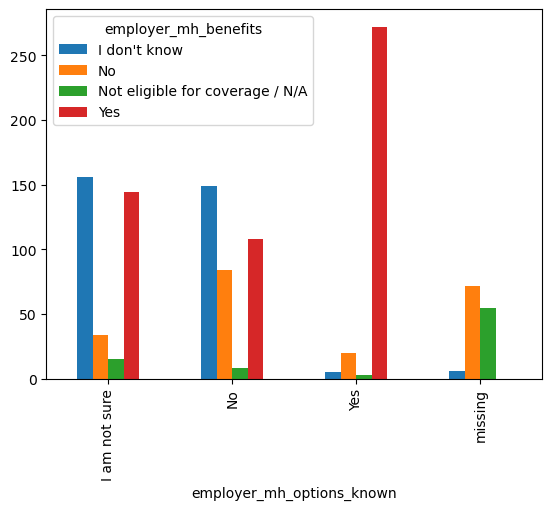

------------------------------------------
relative values:


employer_mh_benefits       I don't know        No  \
employer_mh_options_known                           
I am not sure                  0.446991  0.097421   
No                             0.426934  0.240688   
Yes                            0.016667  0.066667   
missing                        0.045113  0.541353   

employer_mh_benefits       Not eligible for coverage / N/A       Yes  
employer_mh_options_known                                             
I am not sure                                     0.042980  0.412607  
No                                                0.022923  0.309456  
Yes                                               0.010000  0.906667  
missing                                           0.413534       NaN

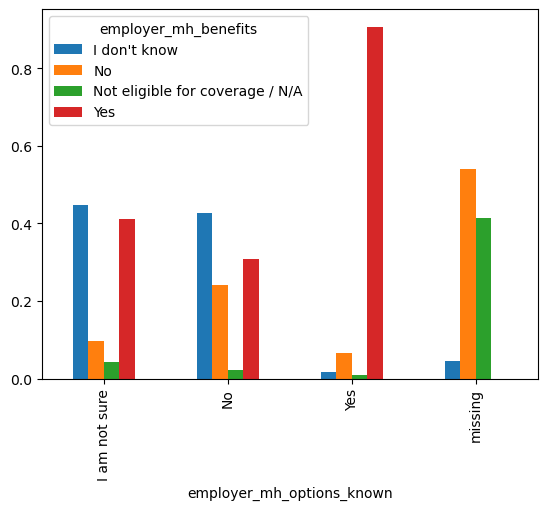

In [71]:
# display the answers of individuals to the question of whether they know the options provided by their employer for mental health care, depending on whether mental health care is offered by their employer
f.show_pivot_tables_and_bars('employer_mh_options_known', 'employer_mh_benefits', df_v4)

Observations
* 95% of missing values on whether employees know about mental health care options provided by their employer are due to either employees not being eligible for mental health care or employers not offering mental health care

absolute values:


employer_anonymity_mh_benefits   I don't know  No  Yes
employer_mh_benefits                                  
I don't know                              251  11   54
No                                        149  40   21
Not eligible for coverage / N/A            56   7   18
Yes                                       280  25  219

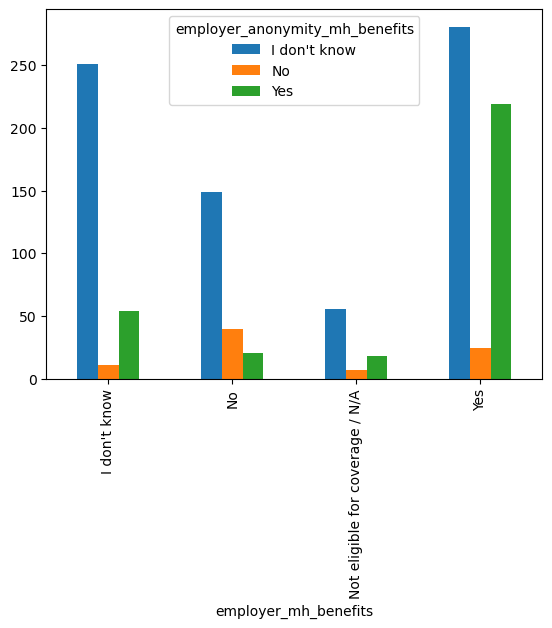

------------------------------------------
relative values:


employer_anonymity_mh_benefits   I don't know        No       Yes
employer_mh_benefits                                             
I don't know                         0.794304  0.034810  0.170886
No                                   0.709524  0.190476  0.100000
Not eligible for coverage / N/A      0.691358  0.086420  0.222222
Yes                                  0.534351  0.047710  0.417939

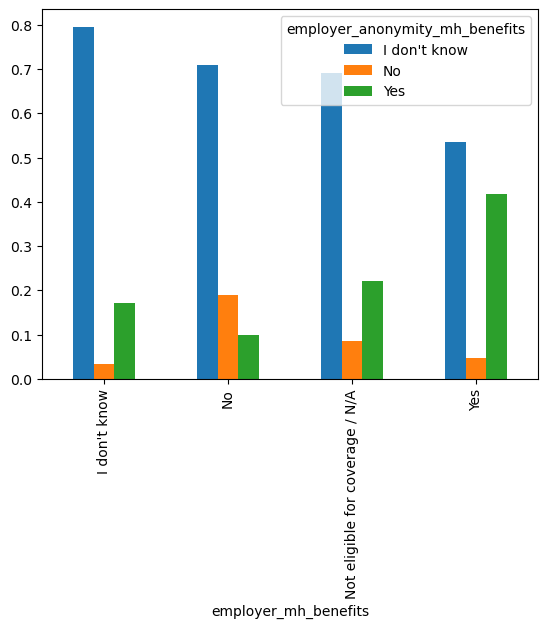

In [72]:
# display the answers of individuals to the question of whether they know the options provided by their employer for mental health care, depending on whether mental health care is offered by their employer
f.show_pivot_tables_and_bars('employer_mh_benefits', 'employer_anonymity_mh_benefits', df_v4)

Observations
* No clear pattern can be discerned, since most individuals answered the question about anonymity with "I don't know" anyway

In [73]:
# introduce n/a responses for the questions about the mental health care options offered by the employer and 
# the employee's anonymity when making use of health care options according to whether such options are offered by the employer
df_v5 = df_v4.copy()
df_v5.loc[(df_v5['employer_mh_benefits'] == 'No') | (df_v5['employer_mh_benefits'] == 'Not eligible for coverage / N/A'), 
          'employer_mh_options_known'] = 'N/A because no employer provided coverage'

df_v5.loc[(df_v5['employer_mh_benefits'] == 'No') | (df_v5['employer_mh_benefits'] == 'Not eligible for coverage / N/A'), 
          'employer_anonymity_mh_benefits'] = 'N/A because no employer provided coverage'

absolute values:


willingness_mh_disclosure_family  Neutral  \
self_mental_illness_present                 
Maybe                                29.0   
No                                   50.0   
Yes                                  31.0   

willingness_mh_disclosure_family  Not applicable to me (I do not have a mental illness)  \
self_mental_illness_present                                                               
Maybe                                                                           8.0       
No                                                                             71.0       
Yes                                                                             NaN       

willingness_mh_disclosure_family  Not open at all  Somewhat not open  \
self_mental_illness_present                                            
Maybe                                        27.0               50.0   
No                                           13.0               58.0   
Yes                                          23.0               65.0   

willingness_mh_disclosure_family  Somewhat open  Very open  
self_mental_illness_present                                 
Maybe                                     110.0       27.0  
No                                        175.0       68.0  
Yes                                       223.0      103.0

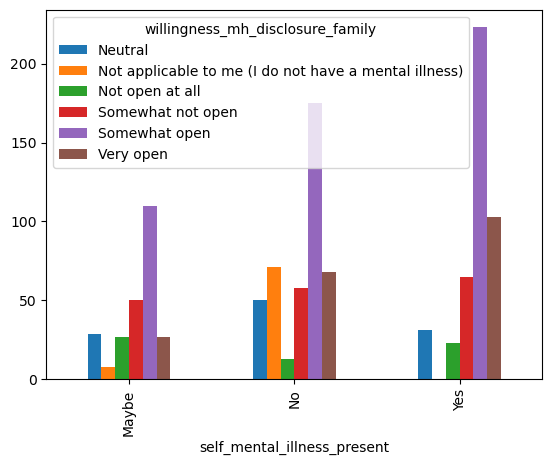

------------------------------------------
relative values:


willingness_mh_disclosure_family   Neutral  \
self_mental_illness_present                  
Maybe                             0.115538   
No                                0.114943   
Yes                               0.069663   

willingness_mh_disclosure_family  Not applicable to me (I do not have a mental illness)  \
self_mental_illness_present                                                               
Maybe                                                                      0.031873       
No                                                                         0.163218       
Yes                                                                             NaN       

willingness_mh_disclosure_family  Not open at all  Somewhat not open  \
self_mental_illness_present                                            
Maybe                                    0.107570           0.199203   
No                                       0.029885           0.133333   
Yes                                      0.051685           0.146067   

willingness_mh_disclosure_family  Somewhat open  Very open  
self_mental_illness_present                                 
Maybe                                  0.438247   0.107570  
No                                     0.402299   0.156322  
Yes                                    0.501124   0.231461

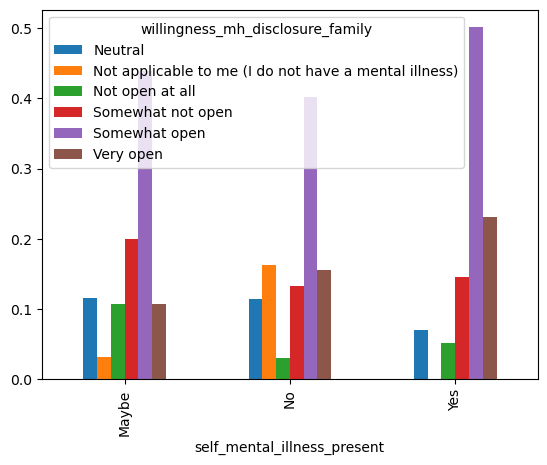

In [74]:
# check how many individuals selected the n/a response to the question about how much they are willing to share their mental illness 
# with family and friends, according to their current mental health status
f.show_pivot_tables_and_bars('self_mental_illness_present', 'willingness_mh_disclosure_family', df_v5)

Observations
* no person with a current mental disorder selected the n/a response
* only 16% of those with no current mental disorder and only 3% of those with a possible mental illness selected the n/a response. This is probably due to the question being phrased in the subjunctive mood, as this means that a current mental disorder is not necessary to answer the question

In [75]:
# since this question offered a n/a response, individuales are coded consistently in this regard
df_v5.loc[df_v5['mhd_anytime'] == 'No', 'willingness_mh_disclosure_family'] = 'Not applicable to me (I do not have a mental illness)'

absolute values:


mental_illness_treated    0    1
mhd_anytime                     
Maybe                   131   74
No                      284   21
Yes                      67  554

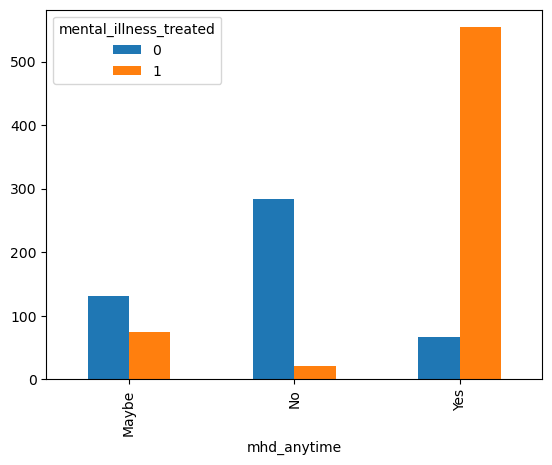

------------------------------------------
relative values:


mental_illness_treated         0         1
mhd_anytime                               
Maybe                   0.639024  0.360976
No                      0.931148  0.068852
Yes                     0.107890  0.892110

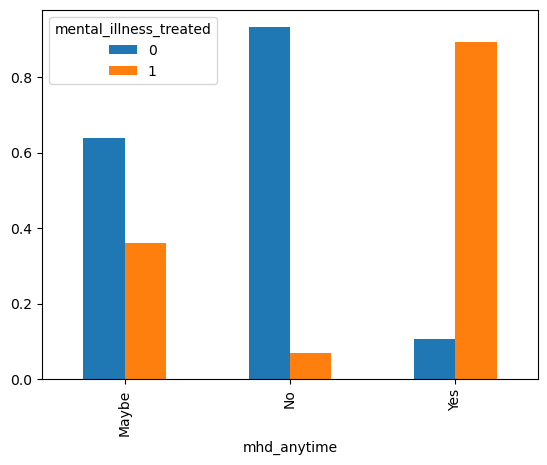

In [76]:
# check whether individuals indicated that they received treatment without having suffered from a mental disorder at any time
f.show_pivot_tables_and_bars('mhd_anytime', 'mental_illness_treated', df_v5)

Observations
* 7% (21) of individuals reported never having had a mental disorder, but indicated that they were treated (to be treated for a mental health issue, they must have one)
* 36% (74) of individuals indicated that they only maybe have/had a mental disorder, but indicated that they were treated (to be treated for a mental health issue, they must have one)

In [77]:
# code the 21 individuals as inconsistent
index_treated_not_ill = df_v5.index[(df_v5['mental_illness_treated'] == 1) & (df_v5['mhd_anytime'] == 'No')]
f.code_as_inconsistent(index_treated_not_ill, 'not ill but indicated that they were treated |', df_v5)

In [78]:
# code the individuals that are only maybe mentally ill, but indicated that they were treated as inconsistent
index_treated_maybe_ill = df_v5.index[(df_v5['mental_illness_treated'] == 1) & (df_v5['mhd_anytime'] == 'Maybe')]
f.code_as_inconsistent(index_treated_maybe_ill, 'only maybe ill but indicated that they were treated |', df_v5)

In [79]:
# recode these individuals as n/a
df_v5.loc[df_v5['mhd_anytime'] != 'Yes', 'mental_illness_treated'] = 'Not applicable to me'

absolute values:


neg_effect_work_treated  Never  Not applicable to me  Often  Rarely  Sometimes
mhd_anytime                                                                   
Maybe                     16.0                 118.0    5.0    32.0       34.0
No                         9.0                 277.0    NaN     7.0       12.0
Yes                       79.0                  53.0   38.0   217.0      234.0

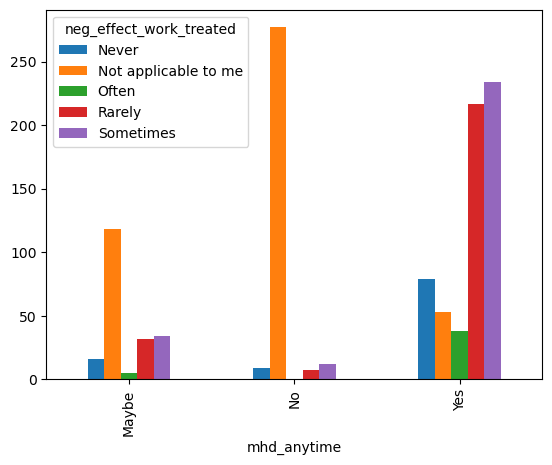

------------------------------------------
relative values:


neg_effect_work_treated     Never  Not applicable to me     Often    Rarely  \
mhd_anytime                                                                   
Maybe                    0.078049              0.575610  0.024390  0.156098   
No                       0.029508              0.908197       NaN  0.022951   
Yes                      0.127214              0.085346  0.061192  0.349436   

neg_effect_work_treated  Sometimes  
mhd_anytime                         
Maybe                     0.165854  
No                        0.039344  
Yes                       0.376812

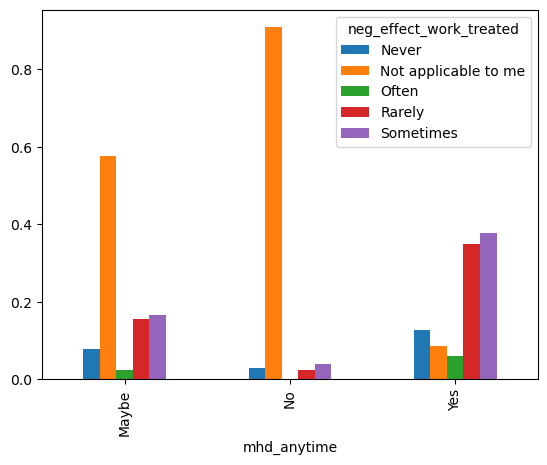

In [80]:
# check how many individuals selected the n/a response to the question about the negative effect of the mental health issue on work when 
# it is being treated effectively, according to their overall mental health status
f.show_pivot_tables_and_bars('mhd_anytime', 'neg_effect_work_treated', df_v5)

Observations
* 28 individuals reported never having had a mental disorder, but did not select the n/a option (9% of individuals who never had a mental disorder)
* 42% of individuals who said that they only "maybe" had a mental disorder at some time did not choose the n/a option, although the question requires that individuals have been treated for a mental health issue (which is only possible if one suffers from one)

In [81]:
# code the 28 individuals as inconsistent
index_no_mhd_effect_treated = df_v5.index[(df_v5['neg_effect_work_treated'] != 'Not applicable to me') & (df_v5['mhd_anytime'] == 'No')]
f.code_as_inconsistent(index_no_mhd_effect_treated, 'not ill at any time but indicated whether their mhd has a negative effect on work when treated effectively |', df_v5)

In [82]:
# code the 42% as inconsistent
index_maybe_mhd_effect_treated = df_v5.index[(df_v5['neg_effect_work_treated'] != 'Not applicable to me') & (df_v5['mhd_anytime'] == 'Maybe')]
f.code_as_inconsistent(index_maybe_mhd_effect_treated, 'only maybe ill at any time but indicated whether their mhd has a negative effect on work when treated effectively |', df_v5)

absolute values:


neg_effect_work_treated  Never  Not applicable to me  Often  Rarely  Sometimes
mental_illness_treated                                                        
0                            8                    22      4      12         21
1                           71                    31     34     205        213
Not applicable to me        25                   395      5      39         46

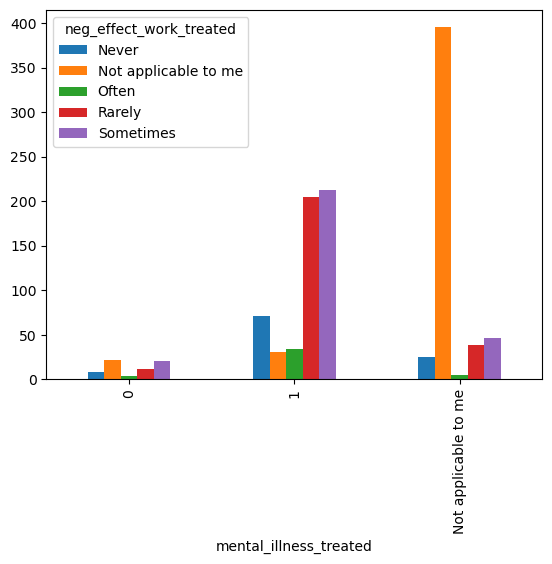

------------------------------------------
relative values:


neg_effect_work_treated     Never  Not applicable to me     Often    Rarely  \
mental_illness_treated                                                        
0                        0.119403              0.328358  0.059701  0.179104   
1                        0.128159              0.055957  0.061372  0.370036   
Not applicable to me     0.049020              0.774510  0.009804  0.076471   

neg_effect_work_treated  Sometimes  
mental_illness_treated              
0                         0.313433  
1                         0.384477  
Not applicable to me      0.090196

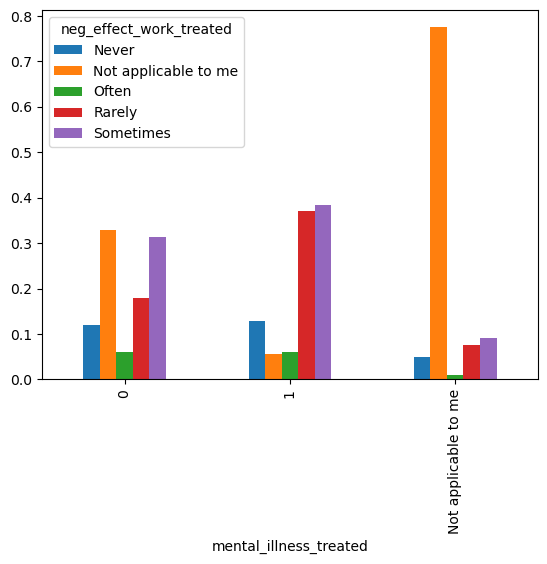

In [83]:
# check how many individuals selected the n/a response to the question about the negative effect of the mental health issue on work when 
# it is being treated effectively, according to their treatment status
f.show_pivot_tables_and_bars('mental_illness_treated', 'neg_effect_work_treated', df_v5)

Observations
* 22% (105) of individuals who did not receive treatment did not select the n/a option, which is inconsistent since the question requires effective treatment for a mental health issue
* 11% (71) of individuals who received treatment selected the n/a option. This may be valid if they were not working at the time or if their mental disorder was not treated effectively

In [84]:
# code the 22% as inconsistent
index_not_treated_effect_treated = df_v5.index[(df_v5['neg_effect_work_treated'] != 'Not applicable to me') & (df_v5['mental_illness_treated'] == 0)]
f.code_as_inconsistent(index_not_treated_effect_treated, 'not treated but indicated whether their mhd has a negative effect on work when treated effectively |', df_v5)

In [85]:
# recode the individuals who either never (maybe) had a mental disorder or who did not receive treatment as n/a
df_v5.loc[(df_v5['mhd_anytime'] != 'Yes') | (df_v5['mental_illness_treated'] == 0), 'neg_effect_work_treated'] = 'Not applicable to me'

absolute values:


neg_effect_work_not_treated  Never  Not applicable to me  Often  Rarely  \
mhd_anytime                                                               
Maybe                            6                    70     34      16   
No                               1                   280     11       4   
Yes                              3                    28    370      23   

neg_effect_work_not_treated  Sometimes  
mhd_anytime                             
Maybe                               79  
No                                   9  
Yes                                197

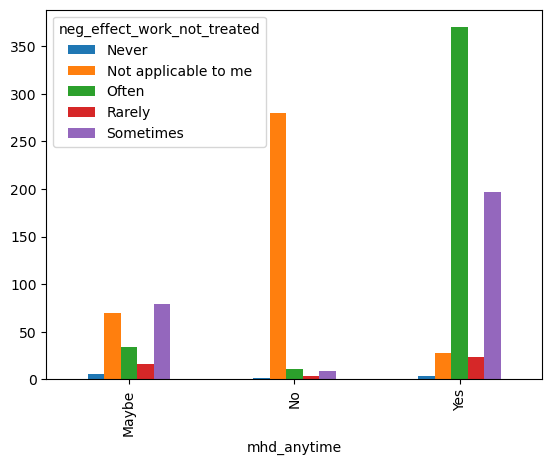

------------------------------------------
relative values:


neg_effect_work_not_treated     Never  Not applicable to me     Often  \
mhd_anytime                                                             
Maybe                        0.029268              0.341463  0.165854   
No                           0.003279              0.918033  0.036066   
Yes                          0.004831              0.045089  0.595813   

neg_effect_work_not_treated    Rarely  Sometimes  
mhd_anytime                                       
Maybe                        0.078049   0.385366  
No                           0.013115   0.029508  
Yes                          0.037037   0.317230

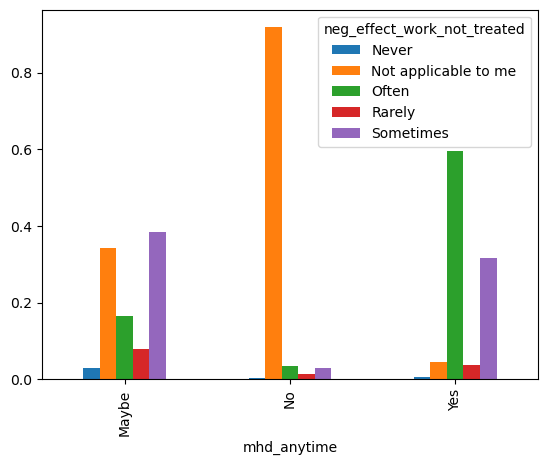

In [86]:
# check how many individuals selected the n/a response to the question about the negative effect of the mental health issue on work when 
# it is not being treated effectively, according to their treatment status
f.show_pivot_tables_and_bars('mhd_anytime', 'neg_effect_work_not_treated', df_v5)

Observations
* 8% (25) of individuals reported never having had a mental disorder, but did not select the n/a response to this question
* 66% (135) of individuals reported that they only maybe have/had a mental disorder, but did not select the n/a response to this question

In [87]:
# code the 25 individuals as inconsistent
index_not_ill_answered = df_v5.index[(df_v5['neg_effect_work_not_treated'] != 'Not applicable to me') & (df_v5['mhd_anytime'] == 'No')]
f.code_as_inconsistent(index_not_ill_answered, 'not ill at any time but indicated whether their mhd has a negative effect on work when not treated |', df_v5)

In [88]:
# code the 135 individuals as inconsistent 
index_maybe_ill_answered = df_v5.index[(df_v5['neg_effect_work_not_treated'] != 'Not applicable to me') & (df_v5['mhd_anytime'] == 'Maybe')]
f.code_as_inconsistent(index_maybe_ill_answered, 'only maybe ill at any time but indicated whether their mhd has a negative effect on work when not treated |', df_v5)

In [89]:
# recode the individuals who never (maybe) had a mental disorder as n/a
df_v5.loc[df_v5['mhd_anytime'] != 'Yes', 'neg_effect_work_not_treated'] = 'Not applicable to me'

In [90]:
# recode the values of all individuals not working in the USA as not applicable for the variables about the US state in which individuals work and live
df_v5.loc[df_v5['country_work'] != 'United States of America', 'US_state_work'] = 'Not applicable to me'
df_v5.loc[df_v5['country_live'] != 'United States of America', 'US_state_live'] = 'Not applicable to me'

absolute values:


mh_neg_effect_workplace_observed  Maybe/Not sure     No  Yes, I experienced  \
effect_neg_conseq_mh_disclosure                                               
Maybe                                       62.0    NaN                21.0   
No                                         115.0    NaN                36.0   
Yes                                         39.0    NaN                49.0   
missing                                     56.0  488.0                22.0   

mh_neg_effect_workplace_observed  Yes, I observed  missing  
effect_neg_conseq_mh_disclosure                             
Maybe                                        44.0      NaN  
No                                           44.0      NaN  
Yes                                          92.0      NaN  
missing                                      12.0     51.0

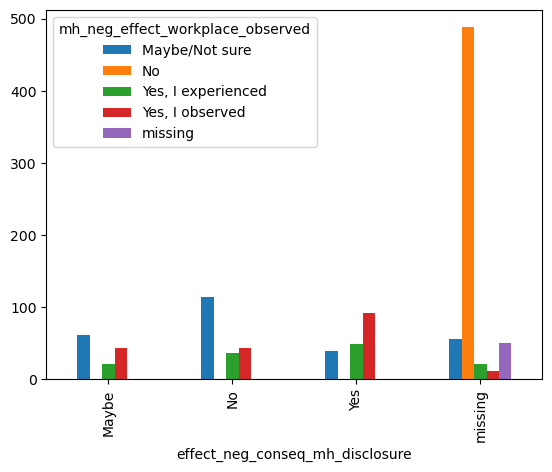

------------------------------------------
relative values:


mh_neg_effect_workplace_observed  Maybe/Not sure        No  \
effect_neg_conseq_mh_disclosure                              
Maybe                                   0.488189       NaN   
No                                      0.589744       NaN   
Yes                                     0.216667       NaN   
missing                                 0.089030  0.775835   

mh_neg_effect_workplace_observed  Yes, I experienced  Yes, I observed  \
effect_neg_conseq_mh_disclosure                                         
Maybe                                       0.165354         0.346457   
No                                          0.184615         0.225641   
Yes                                         0.272222         0.511111   
missing                                     0.034976         0.019078   

mh_neg_effect_workplace_observed   missing  
effect_neg_conseq_mh_disclosure             
Maybe                                  NaN  
No                                     NaN  
Yes                                    NaN  
missing                           0.081081

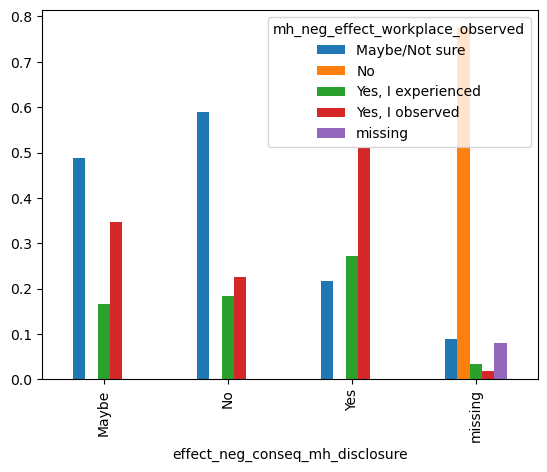

In [91]:
# check whether the missing values in effect_neg_conseq_mh_disclosure are due to respondents' answer to the question mh_neg_effect_workplace_observed
f.show_pivot_tables_and_bars('effect_neg_conseq_mh_disclosure', 'mh_neg_effect_workplace_observed', df_v5)

Observations
* all individuals who did not observe a bad response to a mental health issue have missing values for this question
* 10% of missing values are from individuals who are not sure if they observed or experienced an unsupportive or badly handled response

In [92]:
# recode the answers of respondents who did not observe or experience an unsupportive or badly handled response to a mental health issue or are unsure about this as n/a
# for the question about the effect of this observation/experience 
df_v5.loc[(df_v5['mh_neg_effect_workplace_observed'] == 'No') & 
          (df_v5['effect_neg_conseq_mh_disclosure'] == 'missing'), 'effect_neg_conseq_mh_disclosure'] = 'Not applicable to me'
df_v5.loc[(df_v5['mh_neg_effect_workplace_observed'] == 'Maybe/Not sure') & 
          (df_v5['effect_neg_conseq_mh_disclosure'] == 'missing'), 'effect_neg_conseq_mh_disclosure'] = 'Not applicable to me'

#### 3.3.3 Exploring Outliers

Overview
* check if there is any reason to exclude the identified outliers from further analysis

In [93]:
# look at the mental health data of the respondents that were considered outliers due to their high number of current diagnoses
index_many_illnesses = df_v5.index[(df_v5['count_diagnosed_illnesses'] > 4)]  # individuals with more than four diagnoses were considered outliers 

f.display_mhd_data(index_many_illnesses, df_v5)

count_diagnosed_illnesses  count_possible_illnesses  \
174                          8                         0   
207                          5                         0   
212                          6                         0   
266                          5                         0   
297                          5                         0   
398                          6                         0   
452                          6                         0   
577                          6                         0   
583                          5                         0   
643                          5                         0   
721                          5                         0   

     count_prof_diagnoses self_mental_illness_present  \
174                     4                         Yes   
207                     3                         Yes   
212                     6                         Yes   
266                     3                         Yes   
297                     5                         Yes   
398                     0                         Yes   
452                     0                         Yes   
577                     3                         Yes   
583                     5                         Yes   
643                     5                         Yes   
721                     0                         Yes   

    self_mental_illness_past diagnosed_by_professional  \
174                      Yes                       Yes   
207                      Yes                       Yes   
212                      Yes                       Yes   
266                      Yes                       Yes   
297                      Yes                       Yes   
398                      Yes                        No   
452                      Yes                        No   
577                      Yes                       Yes   
583                      Yes                       Yes   
643                      Yes                       Yes   
721                      Yes                       Yes   

     (1) ADD (w/o Hyperactivity)  (1) Addictive Disorder  \
174                          0.0                     0.0   
207                          0.0                     0.0   
212                          0.0                     1.0   
266                          0.0                     1.0   
297                          0.0                     0.0   
398                          0.0                     0.0   
452                          0.0                     1.0   
577                          0.0                     1.0   
583                          0.0                     0.0   
643                          0.0                     1.0   
721                          0.0                     1.0   

     (1) Anxiety Disorder (Generalized, Social, Phobia, etc)  (1) Asperges  \
174                                                1.0                 0.0   
207                                                1.0                 0.0   
212                                                1.0                 0.0   
266                                                1.0                 0.0   
297                                                1.0                 0.0   
398                                                1.0                 0.0   
452                                                1.0                 0.0   
577                                                1.0                 0.0   
583                                                1.0                 0.0   
643                                                1.0                 0.0   
721                                                0.0                 0.0   

     (1) Attention Deficit Hyperactivity Disorder  (1) Autism  \
174                                           0.0         0.0   
207                                           1.0         0.0   
212                                           0.0

Observations
* three individuals did not report any professional diagnoses, but did report at least five current diagnoses (it is possible that they all have been diagnosed by a psychologist)
* all other individuals indicated at least three professional diagnoses

In [94]:
# look at the mental health data of the individuals that were considered outliers due to their high number of possible diagnoses
index_many_poss_illnesses = df_v5.index[(df_v5['count_possible_illnesses'] > 3)]  # individuals with more than three diagnoses were considered outliers 

f.display_mhd_data(index_many_poss_illnesses, df_v5)

count_diagnosed_illnesses  count_possible_illnesses  \
167                           0                         4   
204                           0                         4   
292                           0                         5   
346                           0                         5   
359                           0                         4   
393                           0                         4   
461                           0                         4   
466                           0                         5   
503                           0                         4   
561                           0                         4   
579                           0                         7   
730                           0                         5   
733                           0                         4   
755                           0                         4   
804                           0                         4   
821                           0                         5   
893                           0                         4   
965                           0                         4   
991                           0                         8   
1067                          0                         4   
1120                          0                         4   
1211                          0                         5   
1249                          0                         4   
1285                          0                         4   
1296                          0                         4   
1339                          0                         4   

      count_prof_diagnoses self_mental_illness_present  \
167                      0                       Maybe   
204                      0                       Maybe   
292                      0                       Maybe   
346                      0                       Maybe   
359                      0                       Maybe   
393                      0                       Maybe   
461                      2                       Maybe   
466                      0                       Maybe   
503                      1                       Maybe   
561                      2                       Maybe   
579                      0                       Maybe   
730                      0                       Maybe   
733                      2                       Maybe   
755                      0                       Maybe   
804                      3                       Maybe   
821                      0                       Maybe   
893                      0                       Maybe   
965                      0                       Maybe   
991                      0                       Maybe   
1067                     0                       Maybe   
1120                     0                       Maybe   
1211                     0                       Maybe   
1249                     0                       Maybe   
1285                     0                       Maybe   
1296                     0                       Maybe   
1339                     1                       Maybe   

     self_mental_illness_past diagnosed_by_professional  \
167                        No                        No   
204                       Yes                        No   
292                     Maybe                        No   
346                        No                        No   
359                       Yes                        No   
393                        No                        No   
461                       Yes                       Yes   
466                     Maybe                        No   
503                       Yes                       Yes   
561                       Yes                       Yes   
579                     Maybe                        No   
730                        No                        No   
733                     

Observations
* one person indicated eight possible diagnoses, but no current or professional diagnoses
* no person indicated a current diagnosis (this was most likely not possible due to questionnaire restrictions)
* all but six individuals did not indicate any professional diagnoses

In [95]:
# look at the mental health data of the individuals that were considered outliers due to their high number of professional diagnoses
index_many_prof_illnesses = df_v5.index[(df_v5['count_prof_diagnoses'] > 4)] # individuals with more than four diagnoses were considered outliers

f.display_mhd_data(index_many_prof_illnesses, df_v5)

count_diagnosed_illnesses  count_possible_illnesses  \
212                           6                         0   
247                           3                         0   
252                           2                         0   
297                           5                         0   
407                           3                         0   
583                           5                         0   
606                           0                         1   
643                           5                         0   
1259                          1                         0   

      count_prof_diagnoses self_mental_illness_present  \
212                      6                         Yes   
247                      5                         Yes   
252                      5                         Yes   
297                      5                         Yes   
407                      5                         Yes   
583                      5                         Yes   
606                      5                       Maybe   
643                      5                         Yes   
1259                     5                         Yes   

     self_mental_illness_past diagnosed_by_professional  \
212                       Yes                       Yes   
247                       Yes                       Yes   
252                       Yes                       Yes   
297                       Yes                       Yes   
407                       Yes                       Yes   
583                       Yes                       Yes   
606                       Yes                       Yes   
643                       Yes                       Yes   
1259                      Yes                       Yes   

      (1) ADD (w/o Hyperactivity)  (1) Addictive Disorder  \
212                           0.0                     1.0   
247                           0.0                     0.0   
252                           0.0                     0.0   
297                           0.0                     0.0   
407                           0.0                     0.0   
583                           0.0                     0.0   
606                           0.0                     0.0   
643                           0.0                     1.0   
1259                          0.0                     0.0   

      (1) Anxiety Disorder (Generalized, Social, Phobia, etc)  (1) Asperges  \
212                                                 1.0                 0.0   
247                                                 0.0                 0.0   
252                                                 1.0                 0.0   
297                                                 1.0                 0.0   
407                                                 1.0                 0.0   
583                                                 1.0                 0.0   
606                                                 0.0                 0.0   
643                                                 1.0                 0.0   
1259                                                0.0                 0.0   

      (1) Attention Deficit Hyperactivity Disorder  (1) Autism  \
212                                            0.0         0.0   
247                                            1.0         0.0   
252                                            0.0         0.0   
297                                            1.0         0.0   
407                                            1.0         0.0   
583                                            0.0         0.0   
606                                            0.0         0.0   
643                                            0.0         1.0   
1259                                           0.0         0.0   

      (1) Autism (Asperger's)  (1) Autism Spectrum Disorder  \
212                       0.0                           0.0   
247                       0.0     

Observations
* all indicated indicated either current or professional diagnoses

In [96]:
# look at the work positions and the age of the individuals who indicated more than five work positions 
index_many_positions = df_v5.index[(df_v5['count_work_positions'] > 5)]
col_positions = [col for col in df_v5.columns if '(CW)' in col]

df_v5.loc[index_many_positions, col_positions + ['age', 'count_work_positions']] 

(CW) Back-end Developer  (CW) Designer  (CW) Dev Evangelist/Advocate  \
4                           1              0                             1   
140                         1              0                             1   
276                         1              1                             0   
533                         1              1                             0   
577                         1              1                             0   
598                         1              0                             1   
648                         1              0                             1   
807                         1              1                             1   
822                         0              1                             0   
851                         1              1                             1   
911                         1              0                             0   
935                         1              0                             0   
1111                        1              0                             1   
1161                        1              0                             0   
1319                        1              0                             1   
1406                        1              1                             0   

      (CW) DevOps/SysAdmin  (CW) Executive Leadership  \
4                        1                          1   
140                      1                          1   
276                      1                          0   
533                      1                          0   
577                      1                          1   
598                      1                          0   
648                      1                          0   
807                      1                          0   
822                      1                          0   
851                      1                          0   
911                      1                          1   
935                      1                          1   
1111                     1                          0   
1161                     1                          0   
1319                     1                          0   
1406                     1                          0   

      (CW) Front-end Developer  (CW) HR  (CW) One-person shop  (CW) Other  \
4                            1        0                     0           0   
140                          1        0                     0           0   
276                          1        0                     0           0   
533                          1        0                     0           0   
577                          1        1                     1           0   
598                          1        0                     1           1   
648                          0        0                     0           1   
807                          1        0                     1           1   
822                          1        0                     1           0   
851                          1        0                     0           0   
911                          1        0                     1           0   
935                          1        0                     0           0   
1111                         1        0                     1           1   
1161                         1        0                     0           1   
1319                         1        0                     1           0   
1406                         1        0                     0           0   

      (CW) Sales  (CW) Supervisor/Team Lead  (CW) Support   age  \
4              0                          1             1  43.0   
140            0                          1             0  42.0   
276            0                          1             1  44.0   
533            0                          1             1  24.0   
577            1                          1             1  22.0 

Observation
* there are three individuals below the age of 30 with at least six work positions, one is 25 years old and has nine work positions and the other one is 22 and has 10 work positions

Conclusion
* there is no way to determine if this data is invalid, which is why it is neither excluded nor coded as inconsistent

In [97]:
# save the final data frame as csv
df_v5.to_csv('df_v5.csv', encoding='utf-8', index=False)